# Obtain

In [1]:
## Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import plotly.express as px

In [2]:
## Import functions made specifically for this project
from capstone_functions import *

In [3]:
## Set options for displaying Pandas DataFrames
pd.options.display.max_columns = 100
pd.options.display.max_rows = 120

In [4]:
## Define which NC voter registration columns to load in
vreg_cols_to_use = ['county_id', 'voter_status_desc', 'voter_status_reason_desc', 
                    'last_name', 'first_name', 'middle_name', 
                    'res_street_address', 'res_city_desc', 'state_cd',
                    'zip_code', 'race_code', 'ethnic_code', 'party_cd',
                    'gender_code', 'birth_age', 'birth_state', 
                    'drivers_lic', 'registr_dt', 'precinct_abbrv', 
                    'cong_dist_abbrv', 'super_court_abbrv', 
                    'judic_dist_abbrv', 'nc_senate_abbrv', 'nc_house_abbrv',
                    'school_dist_abbrv', 'dist_1_abbrv', 'confidential_ind', 
                    'birth_year', 'ncid', 'vtd_abbrv']

In [5]:
## Load in voter registration data for NC
nc_vreg = pd.read_table('Data/ncvoter_Statewide_Jan4.zip', encoding='ISO-8859-1',
                        usecols=vreg_cols_to_use, 
                       dtype={'precinct_abbrv': str, 
                              'super_court_abbrv': str, 
                              'judic_dist_abbrv': str,
                              'school_dist_abbrv': str,
                              'vtd_abbrv': str
                             })
nc_vreg.head()

,county_id,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,ncid,vtd_abbrv
0,1,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,86,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,AA56273,08N
1,1,ACTIVE,VERIFIED,AARDEN,JONI,AUTUMN,117 W CLAY ST,MEBANE,NC,27302.0,W,UN,UNA,F,43,DC,Y,02/23/2018,10N,13.0,15A,15A,24.0,63.0,NaN,17.0,N,1978,AA201627,10N
2,1,ACTIVE,VERIFIED,AARMSTRONG,TIMOTHY,DUANE,3670 COVINGTON TRL,MEBANE,NC,27302.0,W,UN,REP,M,55,AL,N,10/31/2020,103,13.0,15A,15A,24.0,63.0,NaN,17.0,N,1966,AA216996,103
3,1,ACTIVE,VERIFIED,AARON,CHRISTINA,CASTAGNA,421 WHITT AVE,BURLINGTON,NC,27215.0,W,UN,UNA,F,45,NC,Y,03/26/1996,03S,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1976,AA98377,03S
4,1,ACTIVE,VERIFIED,AARON,CLAUDIA,HAYDEN,1013 EDITH ST,BURLINGTON,NC,27215.0,W,NL,UNA,F,76,VA,Y,08/15/1989,124,13.0,15A,15A,24.0,63.0,NaN,17.0,N,1945,AA69747,124


In [6]:
## Define which NC voter history columns to load in
vhis_cols_to_use = ['voter_reg_num', 'election_lbl', 
                    'election_desc', 'voting_method', 'voted_party_cd', 
                    'pct_label', 'ncid', 'voted_county_id', 'vtd_label']

In [7]:
## Load in voter history data for NC
nc_vhis = pd.read_table('Data/ncvhis_Statewide_Jan4.zip',
                        usecols=vhis_cols_to_use)
nc_vhis.head()

,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
0,9050398,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,07,AA100000,1,07
1,9050398,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,07,AA100000,1,07
2,9050398,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,07,AA100000,1,07
3,9050405,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,09S,AA100006,1,09S
4,9050405,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,09S,AA100006,1,09S


# Scrub and Explore

In [8]:
## Check metadata for voter registration dataframe
nc_vreg.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8311926 entries, 0 to 8311925
Data columns (total 30 columns):
county_id                   8311926 non-null int64
voter_status_desc           8311926 non-null object
voter_status_reason_desc    8311925 non-null object
last_name                   8311737 non-null object
first_name                  8311773 non-null object
middle_name                 7715323 non-null object
res_street_address          8311926 non-null object
res_city_desc               7529758 non-null object
state_cd                    7529998 non-null object
zip_code                    7529657 non-null float64
race_code                   8311926 non-null object
ethnic_code                 8311926 non-null object
party_cd                    8311926 non-null object
gender_code                 8311926 non-null object
birth_age                   8311926 non-null int64
birth_state                 6687860 non-null object
drivers_lic                 8311926 non-null object
regi

In [9]:
## Check metadata for voter history dataframe
nc_vhis.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35006722 entries, 0 to 35006721
Data columns (total 9 columns):
voter_reg_num      35006722 non-null int64
election_lbl       35006722 non-null object
election_desc      35006722 non-null object
voting_method      35006720 non-null object
voted_party_cd     34994802 non-null object
pct_label          35006722 non-null object
ncid               35006722 non-null object
voted_county_id    35006722 non-null int64
vtd_label          34286029 non-null object
dtypes: int64(2), object(7)
memory usage: 2.3+ GB


## Explore Duplicate Records

In [10]:
## Check for duplicate entries in voter registration data
nc_vreg.duplicated().sum()

0

In [11]:
## Check for duplicate entries in voter history data
nc_vhis.duplicated().sum()

413

In [12]:
## Inspect duplicate entries in voter history data
exact_dup_vhis = nc_vhis.loc[nc_vhis.duplicated()]
exact_dup_vhis

,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
765850,39380,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,09,AE20677,5,09
765853,39380,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,09,AE20677,5,09
765854,39380,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,09,AE20677,5,09
765856,39380,11/08/2011,11/08/2011 MUNICIPAL,IN-PERSON,UNA,09,AE20677,5,09
765858,39380,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,09,AE20677,5,09
765859,39380,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,09,AE20677,5,09
840254,23708,05/08/2018,05/08/2018 PRIMARY,PROVISIONAL,REP,07,AF14599,6,07
869744,24491,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,UNA,01,AF25332,6,01
869762,24506,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,UNA,18,AF25342,6,18
869769,24508,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,UNA,12,AF25344,6,12


In [13]:
exact_dup_vhis['election_desc'].value_counts()

11/06/2012 GENERAL                                    145
05/08/2012 PRIMARY                                     69
11/04/2014 GENERAL                                     37
11/08/2016 GENERAL                                     35
11/06/2018 GENERAL                                     29
03/15/2016 PRIMARY                                     18
05/06/2014 PRIMARY                                     16
07/17/2012 SECOND PRIMARY                              10
11/08/2011 MUNICIPAL GENERAL/CITY OF MONROE RUNOFF      7
03/03/2020 PRIMARY                                      7
11/03/2020 GENERAL                                      6
11/05/2013 MUNICIPAL GENERAL/CITY OF MONROE             3
05/08/2018 PRIMARY                                      3
09/10/2019 GENERAL                                      3
07/15/2014 SECOND PRIMARY                               3
10/11/2011 RALEIGH CARY SCHOOL                          3
06/07/2016 CONGRESSIONAL PRIMARY                        3
11/08/2011 MUN

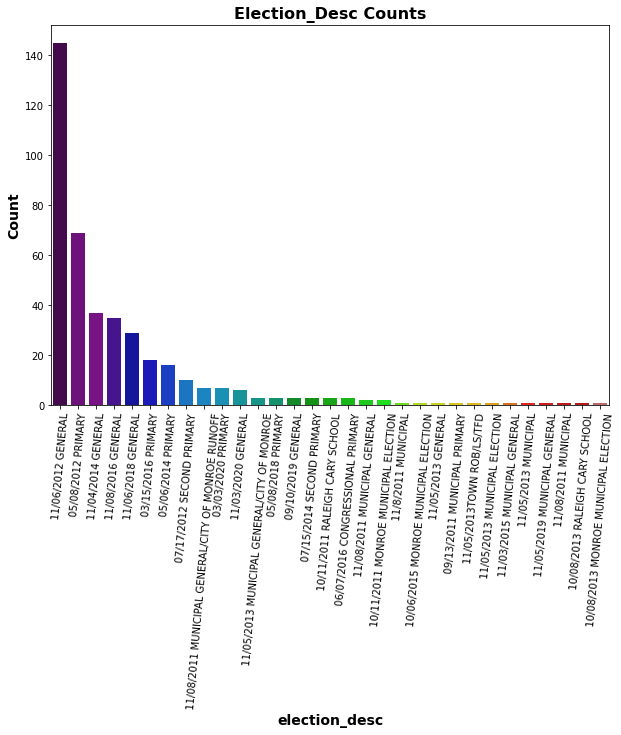

In [14]:
plot_count('election_desc', exact_dup_vhis, rotation=85);

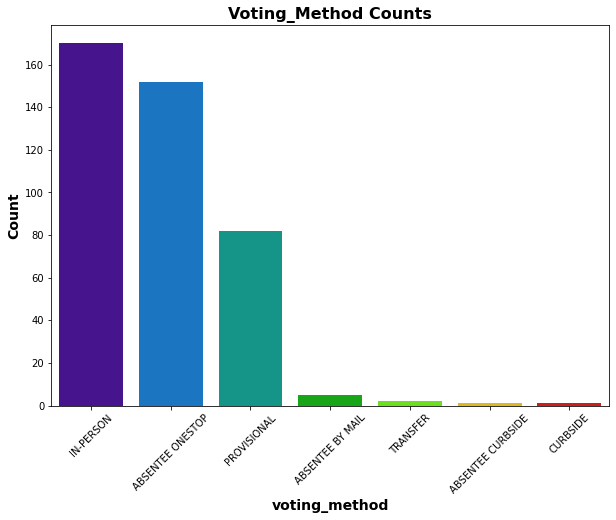

In [15]:
plot_count('voting_method', exact_dup_vhis, rotation=45);

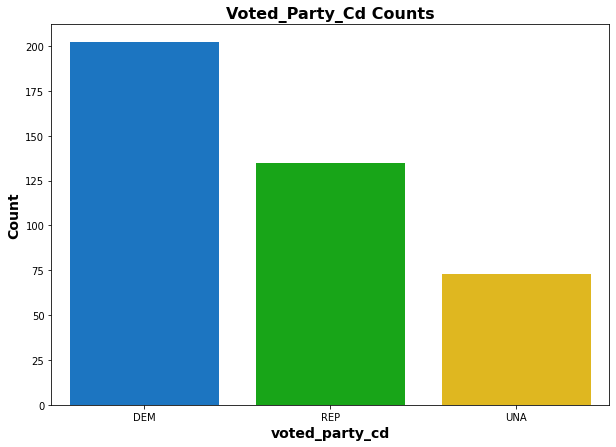

In [16]:
plot_count('voted_party_cd', exact_dup_vhis);

In [17]:
## Remove duplicate entries from records of voter history
nc_vhis.drop_duplicates(inplace=True)

In [18]:
# nc_vhis.to_csv('Data/ncvhis_Statewide_drop_dup.gz', compression='gzip', index=False)

In [18]:
## There are 498 instances where an ncid shows up as casting a vote
  ## more than once in the same election where the records aren't exact copies
nc_vhis.duplicated(subset=['ncid','election_desc']).sum()

498

In [19]:
## A total of 358 individuals show up more than once for a single election
dup_ncid_elecs = nc_vhis.loc[nc_vhis.duplicated(subset=['ncid', 'election_desc'], keep=False)]
display(dup_ncid_elecs.head())
dup_ncid_elecs['ncid'].nunique()

,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
200251,2332350,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,02,AA16823,1,02
200252,2332350,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,02,AA16823,1,02
200256,2332350,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,LI,AA16823,68,LI
200257,2332350,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,LI,AA16823,68,LI
217549,10191737,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,064,AA174391,1,064


358

In [20]:
## Examine the complete recent voting history of the 358 ncid's that show up 
  ## multiple times for a single election to investigate how the records differ
for ncid in dup_ncid_elecs['ncid'].unique():
    display(nc_vhis.loc[nc_vhis['ncid']==ncid].sort_values(['election_desc']))

,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
200246,2332350,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,02,AA16823,1,02
200252,2332350,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,02,AA16823,1,02
200257,2332350,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,LI,AA16823,68,LI
200250,2332350,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,02,AA16823,1,02
200255,2332350,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,02,AA16823,1,02
200258,2332350,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,LI,AA16823,68,LI
200248,2332350,07/15/2014,07/15/2014 SECOND PRIMARY,IN-PERSON,REP,02,AA16823,1,02
200247,2332350,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,02,AA16823,1,02
200249,2332350,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,02,AA16823,1,02
200254,2332350,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,02,AA16823,1,02


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
217552,10191737,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,H25,AA174391,41,H25
217558,10191737,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,146,AA174391,60,146
217557,10191737,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,146,AA174391,60,146
217551,10191737,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,H25,AA174391,41,H25
217554,10191737,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,146,AA174391,60,146
217550,10191737,11/05/2019,11/05/2019 MUNICIPAL,IN-PERSON,DEM,H25,AA174391,41,H25
217549,10191737,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,064,AA174391,1,064
217556,10191737,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,146,AA174391,60,146
217553,10191737,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,H25,AA174391,41,H25
217555,10191737,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,146,AA174391,60,146


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
284502,166237613,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,06S,AA210194,1,06S
284503,166237613,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,CC13,AA210194,26,CC13


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
497235,32922,03/19/2013,03/19/2013 COUNTY WIDE ABC ELECTION,PROVISIONAL,REP,B2,AB14598,2,B2
497239,32922,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,LILE,AB14598,4,LILE
497234,32922,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,B2,AB14598,2,B2
497236,32922,07/15/2014,07/15/2014 SECOND PRIMARY,IN-PERSON,DEM,LILE,AB14598,4,LILE
497237,32922,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,LILE,AB14598,4,LILE
497233,32922,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,B2,AB14598,2,B2
497240,32922,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,LILE,AB14598,4,LILE
497238,32922,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,LILE,AB14598,4,LILE


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
515142,25981,03/19/2013,03/19/2013 COUNTY WIDE ABC ELECTION,ABSENTEE ONESTOP,REP,B1,AB22129,2,B1
515141,25981,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,B1,AB22129,2,B1
515143,25981,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,B1,AB22129,2,B1
515138,25981,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,B1,AB22129,2,B1
515144,25981,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,26,AB22129,18,26
515139,25981,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,B1,AB22129,2,B1
515140,25981,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,B1,AB22129,2,B1


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
619025,13451,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,06,AC13298,3,06
619024,13451,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,06,AC13298,3,06
619023,13451,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,06,AC13298,3,06
619027,13451,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,01-23,AC13298,92,01-23
619026,13451,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,06A,AC13298,3,06
619022,13451,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,06A,AC13298,3,06


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
687917,36708,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,0007,AD24600,84,0007
687915,36708,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,BURN,AD24600,4,BURN
687914,36708,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,BURN,AD24600,4,BURN
687916,36708,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,BURN,AD24600,4,BURN


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
700156,31054,03/03/2020,03/03/2020 PRIMARY,PROVISIONAL,DEM,WADES,AD28554,4,W1
700152,31054,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,W1,AD28554,4,W1
700151,31054,09/10/2019,09/10/2019 GENERAL,IN-PERSON,REP,W1,AD28554,4,W1
700155,31054,09/10/2019,09/10/2019 GENERAL,IN-PERSON,DEM,W1,AD28554,4,W1
700153,31054,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,WADES,AD28554,4,W1
700150,31054,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,W1,AD28554,4,W1
700149,31054,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,W1,AD28554,4,W1
700154,31054,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,W1,AD28554,4,W1
700157,31054,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,W1,AD28554,4,W1
700158,31054,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,W1,AD28554,4,W1


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
765849,39380,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,09,AE20677,5,09
765848,39380,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,09,AE20677,5,09
765843,39380,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,09,AE20677,5,09
765842,39380,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,09,AE20677,5,09
765847,39380,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,09,AE20677,5,09
765851,39380,11/03/2015,11/03/2015 MUNICIPAL,IN-PERSON,UNA,09,AE20677,5,09
765860,39380,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,09,AE20677,5,20
765846,39380,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,09,AE20677,5,09
765857,39380,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,09,AE20677,5,09
765841,39380,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,09,AE20677,5,09


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
840259,23708,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,07,AF14599,6,07
840252,23708,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,17,AF14599,6,17
840251,23708,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,17,AF14599,6,17
840257,23708,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,17,AF14599,6,17
840248,23708,05/08/2018,05/08/2018 PRIMARY,PROVISIONAL,REP,07,AF14599,6,07
840261,23708,06/23/2020,06/23/2020 SECOND PRIMARY,IN-PERSON,REP,07,AF14599,6,07
840250,23708,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,17,AF14599,6,17
840260,23708,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,07,AF14599,6,07
840255,23708,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,17,AF14599,6,17
840256,23708,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,17,AF14599,6,17


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
872491,30019169,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,07,AF26449,6,07
872490,30019169,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,REP,07,AF26449,6,07
872492,30019169,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,MARS H,AF26449,57,MARS-H
872493,30019169,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,MARS H,AF26449,57,MARS-H
872489,30019169,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,07,AF26449,6,07


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
1095920,9244,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,CHOCO,AG9878,7,CHOCO
1095917,9244,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,WASH4,AG9878,7,WASH4
1095918,9244,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,CHOCO,AG9878,7,CHOCO
1095923,9244,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,WASH4,AG9878,7,WASH4
1095919,9244,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,CHOCO,AG9878,7,CHOCO
1095922,9244,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,WASH4,AG9878,7,WASH4
1095916,9244,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,CHOCO,AG9878,7,CHOCO
1095921,9244,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,CHOCO,AG9878,7,CHOCO


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
1117034,15156,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,MH,AH17190,8,MH
1117031,15156,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,MH,AH17190,8,MH
1117033,15156,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,MH,AH17190,8,MH
1117036,15156,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,MH,AH17190,8,MH
1117035,15156,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,W1,AH17190,8,W1
1117032,15156,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,MH,AH17190,8,MH
1117037,15156,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,MH,AH17190,8,MH
1117038,15156,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,01-46,AH17190,92,01-46


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
1138285,23342,03/03/2020,03/03/2020 PRIMARY,CURBSIDE,DEM,RX,AH24528,8,RX
1138291,23342,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,RX,AH24528,8,RX
1138292,23342,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,RX,AH24528,8,RX
1138288,23342,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,RX,AH24528,8,RX
1138290,23342,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,RX,AH24528,8,RX
1138286,23342,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,RX,AH24528,8,RX
1138287,23342,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,RX,AH24528,8,RX
1138289,23342,11/08/2016,11/08/2016 GENERAL,CURBSIDE,DEM,RX,AH24528,8,RX


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
1271288,62998,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,P19A,AJ43003,64,0037
1271291,62998,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,0037,AJ43003,64,0037
1271287,62998,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,0037,AJ43003,64,0037
1271290,62998,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,0037,AJ43003,64,0037
1271286,62998,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,P202,AJ43003,9,P202
1271289,62998,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,P19A,AJ43003,64,0037


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
1343385,600027098,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,07,AK112621,10,07
1343383,600027098,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,07,AK112621,10,07
1343384,600027098,11/03/2015,11/03/2015 MUNICIPAL,IN-PERSON,UNA,07,AK112621,10,07
1343380,600027098,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,03,AK112621,10,03
1343387,600027098,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,07,AK112621,10,07
1343379,600027098,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,W31,AK112621,65,W31
1343381,600027098,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,07,AK112621,10,07
1343386,600027098,11/08/2011,11/08/2011 MUNICIPAL,IN-PERSON,UNA,07,AK112621,10,07
1343382,600027098,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,07,AK112621,10,07


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
1715592,1470954,05/06/2014,05/06/2014 PRIMARY,ABSENTEE ONESTOP,REP,04C1,AK89408,10,04
1715597,1470954,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,04C,AK89408,10,04
1715598,1470954,11/03/2015,11/03/2015 MUNICIPAL,IN-PERSON,REP,04C1,AK89408,10,04
1715594,1470954,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,12,AK89408,10,12
1715593,1470954,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,04C1,AK89408,10,04
1715595,1470954,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,04C,AK89408,10,04
1715599,1470954,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,REP,05,AK89408,30,05
1715596,1470954,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,12,AK89408,10,12


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
2263035,7688117,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,33,AL244926,36,33
2263032,7688117,05/08/2012,05/08/2012 PRIMARY,ABSENTEE BY MAIL,DEM,28.1,AL244926,11,28.1
2263036,7688117,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,36,AL244926,36,36
2263038,7688117,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,36,AL244926,36,36
2263039,7688117,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,33,AL244926,36,33
2263033,7688117,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,20,AL244926,18,20
2263034,7688117,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,33,AL244926,36,33
2263037,7688117,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,36,AL244926,36,36
2263040,7688117,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,36,AL244926,36,36


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
2351836,372852,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,01.1,AL266672,11,01.1
2351832,372852,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,01.1,AL266672,11,01.1
2351835,372852,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,01.1,AL266672,11,01.1
2351833,372852,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,01.1,AL266672,11,01.1
2351838,372852,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,01.1,AL266672,11,01.1
2351830,372852,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,01.1,AL266672,11,01.1
2351841,372852,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,01.1,AL266672,11,01.1
2351834,372852,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,01.1,AL266672,11,01.1
2351837,372852,11/07/2017,11/07/2017 MUNICIPAL GENERAL,IN-PERSON,DEM,01.1,AL266672,11,01.1
2351831,372852,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,01.1,AL266672,11,01.1


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
2698837,130793,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,01.1,AL57870,11,01.1
2698841,130793,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,42.1,AL57870,11,105.1
2698839,130793,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,42.1,AL57870,11,105.1
2698844,130793,06/23/2020,06/23/2020 SECOND PRIMARY,ABSENTEE ONESTOP,REP,01.1,AL57870,11,01.1
2698842,130793,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,01.1,AL57870,11,01.1
2698836,130793,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,42.1,AL57870,11,105.1
2698846,130793,11/04/2014,11/04/2014 GENERAL,ABSENTEE BY MAIL,REP,13-01,AL57870,92,13-01
2698838,130793,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,42.1,AL57870,11,105.1
2698845,130793,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,13-01,AL57870,92,13-01
2698843,130793,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,45.1,AL57870,11,45.1


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
2855323,9570,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,0022,AM11597,12,0022
2855320,9570,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,0001,AM11597,12,0001
2855319,9570,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,0022,AM11597,12,0022
2855318,9570,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,0001,AM11597,12,0001
2855324,9570,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,35,AM11597,18,35
2855321,9570,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,0022,AM11597,12,0022
2855322,9570,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,0022,AM11597,12,0022


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
3208376,30033550,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,04-09,AN125465,13,04-09
3208375,30033550,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,04-09,AN125465,13,04-09
3208379,30033550,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,043,AN125465,60,043
3208374,30033550,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,04-09,AN125465,13,04-09
3208377,30033550,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,04-09,AN125465,13,04-09
3208378,30033550,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,04-09,AN125465,13,04-09


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
3432365,446126,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,H04,AN197368,65,H04
3432366,446126,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,REP,01-04,AN197368,13,01-04


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
3453147,320365773,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,01-04,AN207398,13,01-04
3453149,320365773,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,CUL,AN207398,50,CUL
3453148,320365773,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,CUL,AN207398,50,CUL


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
3469655,1000648693,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,01-04,AN217205,13,01-04
3469656,1000648693,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,105,AN217205,60,105


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
3619693,67357,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,P26B,AN63014,24,P26
3619692,67357,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,P26A,AN63014,24,P26
3619691,67357,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,P26B,AN63014,24,P26
3619689,67357,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,P26B,AN63014,24,P26
3619687,67357,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,P26B,AN63014,24,P26
3619690,67357,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,P26A,AN63014,24,P26
3619695,67357,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,905,AN63014,34,905
3619694,67357,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,P26B,AN63014,24,P26
3619688,67357,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,P26B,AN63014,24,P26


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
3839997,14501015,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,PR29,AP48595,14,PR29
3840000,14501015,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,PR29,AP48595,14,PR29
3839995,14501015,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,PR06,AP48595,14,PR06
3840001,14501015,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,PR29,AP48595,14,PR29
3839996,14501015,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,PR29,AP48595,14,PR29
3839998,14501015,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,PR29,AP48595,14,PR29
3839999,14501015,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,PR29,AP48595,14,PR29


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
3942967,14514646,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,PR34,AP84737,14,PR15
3942968,14514646,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,12,AP84737,18,12


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4018278,600067713,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,WILD,AS12896,16,WILD
4018277,600067713,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,WILD,AS12896,16,WILD
4018279,600067713,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,11,AS12896,1,11
4018281,600067713,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,15,AS12896,10,15
4018280,600067713,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,15,AS12896,10,15


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4048020,21687,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,MCRK,AS21627,16,MCRK
4048010,21687,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,STEL,AS21627,16,STEL
4048024,21687,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,08,AS21627,25,08
4048018,21687,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,UNA,STEL,AS21627,16,STEL
4048014,21687,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,MCRK,AS21627,16,MCRK
4048016,21687,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,UNA,STEL,AS21627,16,STEL
4048019,21687,07/09/2019,07/09/2019 SECOND PRIMARY,IN-PERSON,REP,MCRK,AS21627,16,MCRK
4048013,21687,09/10/2019,09/10/2019 GENERAL,IN-PERSON,UNA,MCRK,AS21627,16,MCRK
4048012,21687,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,MCRK,AS21627,16,MCRK
4048015,21687,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,STEL,AS21627,16,STEL


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4103095,46448,03/15/2016,03/15/2016 PRIMARY,TRANSFER,REP,OTBE,AS39491,16,OTST
4103099,46448,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,OTBE,AS39491,16,OTST
4103098,46448,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,OTBEG,AS39491,16,OTST
4103097,46448,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,HAIS,AS39491,16,HAIS
4103100,46448,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,D2,AS39491,53,D
4103096,46448,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,OTBE,AS39491,16,OTST
4103101,46448,11/08/2011,11/08/2011 MUNICIPAL,IN-PERSON,DEM,D2,AS39491,53,D
4103094,46448,11/08/2016,11/08/2016 GENERAL,TRANSFER,UNA,OTBE,AS39491,16,OTST


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4148044,100688,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,BOGU,AS54256,16,BOGU
4148045,100688,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,UNA,BOGU,AS54256,16,BOGU


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4209366,110002,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,EMIS,AS70397,16,EMIS
4209365,110002,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,EMIS,AS70397,16,EMIS
4209363,110002,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,REP,EMIS,AS70397,16,EMIS
4209364,110002,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,REP,PELE,AS70397,16,PELE


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4368180,9074727,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,34,AW100366,18,34
4368178,9074727,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,34,AW100366,18,34
4368183,9074727,07/15/2014,07/15/2014 SECOND PRIMARY,ABSENTEE ONESTOP,REP,34,AW100366,18,34
4368182,9074727,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,34,AW100366,18,34
4368177,9074727,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,OB21,AW100366,55,OB21
4368179,9074727,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,34,AW100366,18,34
4368176,9074727,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,OB21,AW100366,55,OB21
4368181,9074727,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,34,AW100366,18,34


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4457377,7698053,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,0022,AW136661,84,0022
4457379,7698053,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,16,AW136661,36,16
4457375,7698053,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,0022,AW136661,84,0022
4457374,7698053,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,0022,AW136661,84,0022
4457376,7698053,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,REP,0022,AW136661,84,0022
4457378,7698053,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,REP,26,AW136661,36,26


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4460791,30015562,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,03,AW137877,18,03
4460796,30015562,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,HG17,AW137877,55,HG17
4460790,30015562,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,29,AW137877,18,29
4460792,30015562,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,03,AW137877,18,03
4460797,30015562,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,ST36,AW137877,55,HG17
4460793,30015562,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,03,AW137877,18,03
4460795,30015562,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,HG17,AW137877,55,HG17
4460794,30015562,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,33,AW137877,18,33


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4565211,100649534,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,30-1,AW170910,32,30-1
4565212,100649534,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,LIB,12-01,AW170910,92,12-01


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4587514,1000542866,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,41,AW178391,18,41
4587516,1000542866,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,223.1,AW178391,60,223.1
4587517,1000542866,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,223.1,AW178391,60,223.1
4587515,1000542866,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,223.1,AW178391,60,223.1


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4612147,30102414,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,34,AW187312,18,34
4612146,30102414,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,34,AW187312,18,34
4612144,30102414,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,W24,AW187312,65,W24
4612149,30102414,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,23,AW187312,18,23
4612148,30102414,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,34,AW187312,18,34
4612145,30102414,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,34,AW187312,18,34


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4718693,9000742,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,AS25,AW30807,55,AS25
4718691,9000742,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,32,AW30807,18,32
4718696,9000742,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,OB21,AW30807,55,OB21
4718690,9000742,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,08,AW30807,18,08
4718694,9000742,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,AS25,AW30807,55,AS25
4718688,9000742,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,32,AW30807,18,32
4718695,9000742,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,OB21,AW30807,55,OB21
4718689,9000742,11/06/2018,11/06/2018 GENERAL,ABSENTEE BY MAIL,DEM,08,AW30807,18,08
4718692,9000742,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,DEM,32,AW30807,18,32


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
4974656,51262,03/15/2016,03/15/2016 PRIMARY,PROVISIONAL,REP,75,AX32206,19,75
4974657,51262,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,75,AX32206,19,75
4974659,51262,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,75,AX32206,19,75
4974655,51262,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,75,AX32206,19,75
4974660,51262,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,75,AX32206,19,75
4974658,51262,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,75,AX32206,19,75
4974654,51262,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,75,AX32206,19,75
4974653,51262,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,75,AX32206,19,75


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
5108201,129257,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,9,AX63977,19,9
5108203,129257,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,9,AX63977,19,9
5108200,129257,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,9,AX63977,19,9
5108197,129257,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,9,AX63977,19,9
5108196,129257,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,DEM,9,AX63977,19,9
5108202,129257,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,45,AX63977,19,45
5108198,129257,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,9,AX63977,19,9
5108199,129257,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,9,AX63977,19,9


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
5436626,34933,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,KM S,BB20134,23,KM3
5436631,34933,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,S C,BB20134,23,S1
5436623,34933,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,KM S,BB20134,23,KM3
5436624,34933,11/03/2015,11/03/2015 MUNICIPAL GENERAL,IN-PERSON,DEM,KM S,BB20134,23,KM3
5436628,34933,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,KM S,BB20134,23,KM3
5436622,34933,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,KM S,BB20134,23,KM3
5436632,34933,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,S 6,BB20134,23,S6
5436629,34933,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,KM S,BB20134,23,KM3
5436630,34933,11/07/2017,11/07/2017 MUNICIPAL GENERAL,ABSENTEE ONESTOP,DEM,KM S,BB20134,23,KM3
5436627,34933,11/08/2011,11/08/2011 MUNICIPAL GENERAL,IN-PERSON,DEM,KM S,BB20134,23,KM3


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
5616724,1008817,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,S 2,BB72260,23,S2
5616722,1008817,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,RIPPY,BB72260,23,RIPPY
5616723,1008817,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,S 2,BB72260,23,S2
5616725,1008817,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,010,BB72260,60,010
5616721,1008817,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,RIPPY,BB72260,23,RIPPY


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
5731687,22105,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,P24,BC18809,24,P24
5731689,22105,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,P24,BC18809,24,P24
5731691,22105,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,P24,BC18809,24,P24
5731690,22105,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,P24,BC18809,24,P24
5731692,22105,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,P24,BC18809,24,P24
5731688,22105,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,P24,BC18809,24,P24
5731693,22105,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,P24,BC18809,24,P24


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
5743440,296,03/15/2016,03/15/2016 PRIMARY,ABSENTEE BY MAIL,DEM,P02B,BC2273,24,P02
5743442,296,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,P02A,BC2273,24,P02
5743443,296,05/08/2018,05/08/2018 PRIMARY,ABSENTEE BY MAIL,DEM,P02B,BC2273,24,P02
5743444,296,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,P02B,BC2273,24,P02
5743445,296,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,P02A,BC2273,24,P02
5743446,296,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,03,BC2273,10,03
5743441,296,11/06/2018,11/06/2018 GENERAL,ABSENTEE BY MAIL,DEM,P02B,BC2273,24,P02
5743439,296,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,P02B,BC2273,24,P02


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
5772957,87749,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,P26B,BC35575,24,P26
5772956,87749,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,UNA,P26B,BC35575,24,P26
5772958,87749,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,P26B,BC35575,24,P26


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
5800400,411452,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,H05,BC46669,65,H05
5800396,411452,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,P23,BC46669,24,P23
5800399,411452,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,H05,BC46669,65,H05
5800397,411452,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,P23,BC46669,24,P23
5800395,411452,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,P23,BC46669,24,P23
5800398,411452,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,UNA,H05,BC46669,65,H05
5800401,411452,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,W16,BC46669,65,W16
5800402,411452,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,H05,BC46669,65,H05


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
5844156,72048,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,P19,BC61881,24,P19
5844158,72048,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,P20,BC61881,24,P20
5844159,72048,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,P19,BC61881,24,P19
5844157,72048,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,P19,BC61881,24,P19


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
5847526,76403,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,P16B,BC63373,24,P16
5847528,76403,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,UNA,22,BC63373,78,22
5847527,76403,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,P16B,BC63373,24,P16


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
5945781,82113,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,P25B,BD125500,24,P25
5945782,82113,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,P25B,BD125500,24,P25
5945784,82113,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,18,BD125500,10,18
5945780,82113,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,02,BD125500,25,18
5945783,82113,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,18,BD125500,10,18


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6101707,48750,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,02,BD50768,25,18
6101705,48750,09/10/2019,09/10/2019 GENERAL,ABSENTEE ONESTOP,REP,02,BD50768,25,18
6101703,48750,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,02,BD50768,25,18
6101706,48750,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,02,BD50768,25,22
6101704,48750,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,22,BD50768,25,22
6101709,48750,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,18,BD50768,25,18
6101710,48750,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,02,BD50768,25,18
6101708,48750,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,02,BD50768,25,22
6101711,48750,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,02,BD50768,25,18


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6302015,126708,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,CL57-2,BE121628,26,CL57
6302013,126708,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,CC01,BE121628,26,CC01
6302017,126708,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,CC01,BE121628,26,CC01
6302010,126708,10/11/2011,10/11/2011 MUNICIPAL PRIMARY,IN-PERSON,DEM,CC01,BE121628,26,CC01
6302008,126708,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,SH77,BE121628,26,SH77
6302009,126708,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,G9B-2,BE121628,26,G9
6302012,126708,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,CC01,BE121628,26,CC01
6302011,126708,11/05/2013,11/05/2013 MUNICIPAL GENERAL,IN-PERSON,DEM,CC01,BE121628,26,CC01
6302006,126708,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,G9B-2,BE121628,26,G9
6302016,126708,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,CC01,BE121628,26,CC01


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6445922,16438,03/03/2020,03/03/2020 PRIMARY,TRANSFER,DEM,CU02,BE18394,26,CU02
6445919,16438,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,CU02,BE18394,26,CU02
6445921,16438,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,CC31,BE18394,26,CC31
6445923,16438,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,025,BE18394,60,025
6445920,16438,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,G8C,BE18394,26,G8
6445924,16438,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,025,BE18394,60,025


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6449494,30036856,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,MAGN,BE185586,31,MAGN
6449493,30036856,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,MB62,BE185586,26,MB62
6449495,30036856,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,WALL,BE185586,31,WALL
6449492,30036856,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,G1A,BE185586,26,G1
6449491,30036856,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,DEM,G1A,BE185586,26,G1


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6491914,66001481,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,CC08,BE203818,26,CC08
6491916,66001481,10/10/2017,10/10/2017 MUNICIPAL PRIMARY,IN-PERSON,REP,CC08,BE203818,26,CC08
6491913,66001481,11/03/2015,11/03/2015 MUNICIPAL GENERAL,IN-PERSON,REP,CC08,BE203818,26,CC08
6491917,66001481,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,CC08,BE203818,26,CC08
6491912,66001481,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,CC18,BE203818,26,CC18
6491915,66001481,11/05/2013,11/05/2013 MUNICIPAL GENERAL,IN-PERSON,REP,CC18,BE203818,26,CC18
6491911,66001481,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,CC18,BE203818,26,CC18
6491918,66001481,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,01-06,BE203818,92,01-06
6491910,66001481,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,CC08,BE203818,26,CC08
6491909,66001481,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,CC08,BE203818,26,CC08


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6492767,33067876,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,PR14,BE20407,51,PR14
6492762,33067876,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,PR33,BE20407,51,PR33
6492755,33067876,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,PR10B,BE20407,51,PR10
6492758,33067876,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,PR33,BE20407,51,PR33
6492761,33067876,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,PR14,BE20407,51,PR14
6492766,33067876,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,PR14,BE20407,51,PR14
6492757,33067876,11/04/2014,11/04/2014 GENERAL,ABSENTEE BY MAIL,DEM,PR10B,BE20407,51,PR10
6492765,33067876,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,PR33,BE20407,51,PR33
6492759,33067876,11/05/2013,11/05/2013 MUNICIPAL,IN-PERSON,REP,PR33,BE20407,51,PR33
6492756,33067876,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,PR10B,BE20407,51,PR10


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6512846,30391551,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,PRWN,BE212076,98,PRWN
6512849,30391551,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,PRTA,BE212076,98,PRTA
6512843,30391551,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,05,BE212076,32,05
6512844,30391551,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,PRWN,BE212076,98,PRWN
6512847,30391551,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,PRWN,BE212076,98,PRWN
6512848,30391551,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,PRTA,BE212076,98,PRTA
6512845,30391551,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,PRWN,BE212076,98,PRWN


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6689817,33167599,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,PR25,BE278682,51,PR25
6689816,33167599,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,G2C-1,BE278682,26,G2
6689814,33167599,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,FC,BE278682,54,FC
6689815,33167599,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,CC14,BE278682,26,CC14


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6769582,29251,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,G5B-1,BE31154,26,G5
6769578,29251,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,G3A-2,BE31154,26,G3
6769580,29251,11/04/2014,11/04/2014 GENERAL,ABSENTEE CURBSIDE,DEM,G5B-1,BE31154,26,G5
6769583,29251,11/05/2013,11/05/2013 MUNICIPAL GENERAL,ABSENTEE ONESTOP,DEM,G5B-1,BE31154,26,G5
6769581,29251,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,G5B-1,BE31154,26,G5
6769584,29251,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,G2E-1,BE31154,26,G2
6769579,29251,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,CC31,BE31154,26,CC31


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6809569,166054090,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,G4C,BE329126,26,G4
6809571,166054090,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,011,BE329126,60,011
6809570,166054090,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,G10B,BE329126,26,G10


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6882236,166087459,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,CC32,BE357855,26,CC32
6882233,166087459,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,G2B,BE357855,26,G2
6882241,166087459,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,CC21,BE357855,26,CC21
6882235,166087459,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,CC32,BE357855,26,CC32
6882237,166087459,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,G2B,BE357855,26,G2
6882231,166087459,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,G2A,BE357855,26,G2
6882239,166087459,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,CC21,BE357855,26,CC21
6882234,166087459,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,G2B,BE357855,26,G2
6882238,166087459,11/07/2017,11/07/2017 MUNICIPAL GENERAL,IN-PERSON,UNA,CC21,BE357855,26,CC21
6882232,166087459,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,G2B,BE357855,26,G2


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
6947302,10322553,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,G9B-2,BE389872,26,G9
6947300,10322553,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,G9B-2,BE389872,26,G9
6947304,10322553,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,G04,BE389872,41,G04
6947303,10322553,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,G9B-2,BE389872,26,G9
6947301,10322553,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,G9B-2,BE389872,26,G9


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
7001096,10324003,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,G1B,BE424024,26,G1
7001094,10324003,09/10/2019,09/10/2019 GENERAL,ABSENTEE ONESTOP,DEM,G1B,BE424024,26,G1
7001098,10324003,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,G48,BE424024,41,G48
7001095,10324003,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,G1B,BE424024,26,G1
7001097,10324003,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,G1B,BE424024,26,G1


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
7026612,166204776,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,P15,BE445447,9,P15
7026613,166204776,11/03/2020,11/03/2020 GENERAL,PROVISIONAL,REP,G9B-1,BE445447,26,G9
7026611,166204776,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,P15,BE445447,9,P15


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
7064133,47814,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,G2D,BE49627,26,G2
7064143,47814,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,CC26,BE49627,26,CC26
7064126,47814,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,CC26,BE49627,26,CC26
7064140,47814,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,CC26,BE49627,26,CC26
7064145,47814,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,1512B,BE49627,74,1512B
7064134,47814,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,CC26,BE49627,26,CC26
7064131,47814,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,ABSENTEE ONESTOP,DEM,CC26,BE49627,26,CC26
7064136,47814,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,DEM,CC26,BE49627,26,CC26
7064141,47814,10/08/2013,10/08/2013 MUNICIPAL PRIMARY,IN-PERSON,DEM,CC26,BE49627,26,CC26
7064129,47814,10/10/2017,10/10/2017 MUNICIPAL PRIMARY,ABSENTEE ONESTOP,DEM,CC26,BE49627,26,CC26


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
7075167,50719,03/03/2020,03/03/2020 PRIMARY,TRANSFER,DEM,CC05,BE52521,26,CC05
7075163,50719,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,CC17,BE52521,26,CC17
7075172,50719,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,CC26,BE52521,26,CC26
7075176,50719,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,CC26,BE52521,26,CC26
7075177,50719,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,CC26,BE52521,26,CC26
7075169,50719,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,CC10,BE52521,26,CC10
7075175,50719,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,CC26,BE52521,26,CC26
7075168,50719,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,CC17,BE52521,26,CC17
7075170,50719,11/05/2013,11/05/2013 MUNICIPAL GENERAL,IN-PERSON,DEM,CC26,BE52521,26,CC26
7075178,50719,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,CC26,BE52521,26,CC26


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
7377025,72738,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,SOSH,BG25475,28,SOSH
7377027,72738,05/06/2014,05/06/2014 PRIMARY,ABSENTEE ONESTOP,DEM,RR 9,BG25475,42,RR-9
7377026,72738,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,SOSH,BG25475,28,SOSH
7377023,72738,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,SOSH,BG25475,28,SOSH
7377022,72738,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,SOSH,BG25475,28,SOSH
7377028,72738,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,RR 9,BG25475,42,RR-9
7377024,72738,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,DEM,WAN,BG25475,28,WAN


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
7405152,739976,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,MATO,BG33488,28,MATO
7405155,739976,11/03/2020,11/03/2020 GENERAL,ABSENTEE CURBSIDE,REP,MATO,BG33488,28,MATO
7405151,739976,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,MATO,BG33488,28,MATO
7405150,739976,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,MATO,BG33488,28,MATO
7405156,739976,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,CS,BG33488,49,CS
7405153,739976,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,MATO,BG33488,28,MATO
7405154,739976,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,MATO,BG33488,28,MATO


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
7434690,99983597,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,12-01,BG4213,92,12-01
7434694,99983597,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,12-01,BG4213,92,12-01
7434685,99983597,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,16-07,BG4213,92,16-07
7434682,99983597,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,16-07,BG4213,92,16-07
7434684,99983597,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,12-01,BG4213,92,12-01
7434686,99983597,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,12-01,BG4213,92,12-01
7434687,99983597,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,16-07,BG4213,92,16-07
7434689,99983597,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,12-09,BG4213,92,12-09
7434691,99983597,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,16-07,BG4213,92,16-07
7434692,99983597,11/05/2013,11/05/2013 MUNICIPAL,IN-PERSON,REP,16-07,BG4213,92,16-07


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
7512935,216361,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,80A,BH105950,29,80
7512937,216361,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,011,BH105950,34,011
7512934,216361,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,80A,BH105950,29,80
7512936,216361,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,80A,BH105950,29,80
7512938,216361,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,904,BH105950,34,904


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
7837796,63254,03/03/2020,03/03/2020 PRIMARY,ABSENTEE BY MAIL,REP,42,BH43826,29,42
7837793,63254,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,42,BH43826,29,42
7837797,63254,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,42,BH43826,29,42
7837798,63254,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,REP,42,BH43826,29,42
7837805,63254,05/08/2018,05/08/2018 PRIMARY,ABSENTEE BY MAIL,REP,42,BH43826,29,42
7837801,63254,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,ABSENTEE ONESTOP,REP,42,BH43826,29,42
7837795,63254,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,42,BH43826,29,42
7837792,63254,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,42,BH43826,29,42
7837803,63254,11/04/2014,11/04/2014 GENERAL,ABSENTEE BY MAIL,REP,42,BH43826,29,42
7837791,63254,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,42,BH43826,29,42


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
8097896,351733,05/06/2014,05/06/2014 PRIMARY,ABSENTEE ONESTOP,REP,13,BJ37385,30,13
8097892,351733,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,13,BJ37385,30,13
8097897,351733,11/03/2015,11/03/2015 MUNICIPAL GENERAL,IN-PERSON,REP,13,BJ37385,30,13
8097898,351733,11/03/2020,11/03/2020 GENERAL,PROVISIONAL,REP,13,BJ37385,30,13
8097902,351733,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,NFAL,BJ37385,99,NFAL
8097894,351733,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,13,BJ37385,30,13
8097891,351733,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,REP,13,BJ37385,30,13
8097899,351733,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,13,BJ37385,30,13
8097895,351733,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,13,BJ37385,30,13
8097893,351733,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,REP,13,BJ37385,30,13


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
8265565,30027628,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,HALL,BK50735,31,HALL
8265562,30027628,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,NM13,BK50735,67,NM13
8265563,30027628,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,GB12,BK50735,67,GB12
8265564,30027628,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,HALL,BK50735,31,HALL


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
8339414,592697,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,31,BL122293,32,31
8339418,592697,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,31,BL122293,32,31
8339408,592697,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,31,BL122293,32,31
8339421,592697,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,31,BL122293,32,31
8339419,592697,10/06/2015,10/06/2015 MUNICIPAL PRIMARY,IN-PERSON,DEM,31,BL122293,32,31
8339409,592697,10/08/2013,10/08/2013 MUNICIPAL PRIMARY,IN-PERSON,UNA,31,BL122293,32,31
8339405,592697,10/08/2019,10/08/2019 MUNICIPAL PRIMARY,IN-PERSON,DEM,31,BL122293,32,31
8339410,592697,10/10/2017,10/10/2017 MUNICIPAL PRIMARY,IN-PERSON,DEM,31,BL122293,32,31
8339420,592697,10/11/2011,10/11/2011 MUNICIPAL PRIMARY,IN-PERSON,UNA,31,BL122293,32,31
8339406,592697,11/03/2015,11/03/2015 MUNICIPAL ELECTION,IN-PERSON,DEM,31,BL122293,32,31


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
8382972,613904,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,22,BL143435,32,22
8382974,613904,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,22,BL143435,32,22
8382970,613904,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,GASTON,BL143435,66,GASTON
8382971,613904,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,22,BL143435,32,22
8382973,613904,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,22,BL143435,32,22


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
8429488,30397815,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,34-2,BL165793,32,34
8429490,30397815,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,41,BL165793,32,41
8429489,30397815,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,41,BL165793,32,41
8429487,30397815,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,41,BL165793,32,41


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
8773090,948461,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,13,BL294198,77,13
8773096,948461,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,14,BL294198,32,14
8773100,948461,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,UNA,14,BL294198,32,14
8773092,948461,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,13,BL294198,77,13
8773097,948461,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,14,BL294198,32,14
8773102,948461,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,DEM,14,BL294198,32,14
8773088,948461,09/10/2019,09/10/2019 GENERAL,ABSENTEE ONESTOP,UNA,13,BL294198,77,13
8773095,948461,10/06/2015,10/06/2015 MUNICIPAL PRIMARY,ABSENTEE ONESTOP,UNA,14,BL294198,32,14
8773101,948461,10/08/2013,10/08/2013 MUNICIPAL PRIMARY,IN-PERSON,UNA,14,BL294198,32,14
8773098,948461,11/03/2015,11/03/2015 MUNICIPAL ELECTION,ABSENTEE ONESTOP,UNA,14,BL294198,32,14


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
8830309,30074395,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,55-11,BL311672,32,55
8830312,30074395,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,55-11,BL311672,32,55
8830313,30074395,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,20-13,BL311672,92,20-02
8830311,30074395,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,55-11,BL311672,32,55
8830310,30074395,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,55-11,BL311672,32,55


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
8886776,311319,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,GB,BL327821,68,GB
8886775,311319,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,GB,BL327821,68,GB
8886779,311319,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,UNA,50,BL327821,32,50
8886780,311319,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,50,BL327821,32,50
8886778,311319,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,GB,BL327821,68,GB
8886777,311319,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,GB,BL327821,68,GB


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9013574,30140902,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,23,BL367725,32,23
9013571,30140902,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,30-2,BL367725,32,30-2
9013569,30140902,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,30-2,BL367725,32,30-2
9013573,30140902,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,30-1,BL367725,32,30-1
9013575,30140902,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,30-2,BL367725,32,30-2
9013568,30140902,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,30-2,BL367725,32,30-2
9013576,30140902,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,H20B,BL367725,41,H20B
9013572,30140902,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,24,BL367725,32,24
9013570,30140902,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,22,BL367725,32,22


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9028356,30378727,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,CC,BL373780,68,CC
9028359,30378727,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,44,BL373780,32,44
9028355,30378727,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,CC,BL373780,68,CC
9028357,30378727,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,UNA,CC,BL373780,68,CC
9028358,30378727,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,UNA,44,BL373780,32,44


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9035707,1000086123,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,212,BL376827,60,212
9035706,1000086123,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,50,BL376827,32,50
9035708,1000086123,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,DEM,017,BL376827,60,017
9035710,1000086123,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,212,BL376827,60,212
9035709,1000086123,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,212,BL376827,60,212


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9071722,100647482,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,11-01,BL387574,92,11-01
9071717,100647482,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,51,BL387574,32,51
9071721,100647482,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,11-01,BL387574,92,11-01
9071719,100647482,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,51,BL387574,32,51
9071718,100647482,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,51,BL387574,32,51
9071720,100647482,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,11-01,BL387574,92,11-01
9071716,100647482,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,51,BL387574,32,51


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9082639,1000651029,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,141,BL390378,60,141
9082636,1000651029,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,23,BL390378,32,23
9082640,1000651029,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,212,BL390378,60,212
9082637,1000651029,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,141,BL390378,60,141
9082638,1000651029,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,141,BL390378,60,141


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9287349,30270794,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,33,BL458621,32,33
9287350,30270794,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,10S1,BL458621,1,10S
9287348,30270794,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,45,BL458621,32,45


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9516762,30304742,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,UNA,28,BL94079,32,28
9516761,30304742,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,28,BL94079,32,28
9516765,30304742,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,28,BL94079,32,28
9516763,30304742,11/08/2011,11/08/2011 MUNICIPAL ELECTION,IN-PERSON,UNA,28,BL94079,32,28
9516760,30304742,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,UNA,28,BL94079,32,28
9516764,30304742,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,28,BL94079,32,28


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9596786,55570,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,0701,BM35719,33,0701
9596789,55570,11/03/2020,11/03/2020 GENERAL,ABSENTEE CURBSIDE,UNA,1401,BM35719,33,1401
9596788,55570,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,0701,BM35719,33,0701
9596787,55570,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,0701,BM35719,33,0701
9596790,55570,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,G48,BM35719,41,G48
9596785,55570,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,0701,BM35719,33,0701


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9688479,143129,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,P23A,BM68865,64,0034
9688477,143129,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,0104,BM68865,33,0104
9688478,143129,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,1001,BM68865,33,1001


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9691099,100812303,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,01-03,BM70336,92,01-03
9691098,100812303,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,WW,BM70336,68,WW
9691096,100812303,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,0104,BM70336,33,0104
9691097,100812303,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,WW,BM70336,68,WW


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9730574,437050,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,M03,BN106366,65,M03
9730576,437050,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,M02,BN106366,65,M02
9730577,437050,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,M03,BN106366,65,M03
9730571,437050,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,M02,BN106366,65,M02
9730572,437050,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,M02,BN106366,65,M02
9730573,437050,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,CF01,BN106366,65,CF01


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9812146,10074738,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,905,BN138099,34,905
9812152,10074738,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,112,BN138099,34,112
9812138,10074738,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,905,BN138099,34,905
9812150,10074738,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,067,BN138099,34,067
9812147,10074738,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,905,BN138099,34,905
9812149,10074738,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,905,BN138099,34,905
9812145,10074738,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,905,BN138099,34,905
9812148,10074738,09/10/2013,09/10/2013 WINSTON-SALEM PRIMARY,IN-PERSON,DEM,905,BN138099,34,905
9812143,10074738,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,905,BN138099,34,905
9812144,10074738,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,905,BN138099,34,905


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9969780,30184453,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,074,BN206766,34,074
9969779,30184453,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,014,BN206766,34,014
9969778,30184453,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,013,BN206766,34,013
9969781,30184453,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,14,BN206766,85,14


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
9998579,30281870,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,G53,BN219742,41,G53
9998578,30281870,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,201,BN219742,34,201
9998580,30281870,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,201,BN219742,34,201


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10022488,206517,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,BC,BN231249,76,13
10022487,206517,11/03/2020,11/03/2020 GENERAL,ABSENTEE CURBSIDE,REP,BC,BN231249,76,13
10022489,206517,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,BC,BN231249,76,13
10022490,206517,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,REP,013,BN231249,34,013
10022491,206517,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,013,BN231249,34,013


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10118197,30007008,05/08/2012,05/08/2012 PRIMARY,PROVISIONAL,UNA,063,BN273329,34,063
10118200,30007008,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,UNA,063,BN273329,34,063
10118199,30007008,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,064,BN273329,34,064
10118195,30007008,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,064,BN273329,34,064
10118198,30007008,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,064,BN273329,34,064
10118196,30007008,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,064,BN273329,34,064


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10121096,230908,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,UNA,042,BN274508,34,042
10121097,230908,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,042,BN274508,34,042


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10187428,100392651,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,19-15,BN299092,92,19-06
10187434,100392651,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,19-15,BN299092,92,19-06
10187420,100392651,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,061,BN299092,34,061
10187425,100392651,10/06/2015,10/06/2015 MUNICIPAL RALEIGH CARY,IN-PERSON,UNA,19-15,BN299092,92,19-06
10187430,100392651,10/08/2019,10/08/2019 MUNICIPAL,IN-PERSON,UNA,19-15,BN299092,92,NaN
10187426,100392651,10/10/2017,10/10/2017 MUNICIPAL,IN-PERSON,UNA,19-15,BN299092,92,NaN
10187427,100392651,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,19-15,BN299092,92,19-06
10187432,100392651,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,19-15,BN299092,92,19-06
10187422,100392651,11/05/2013,11/05/2013 MUNICIPAL GENERAL,IN-PERSON,UNA,061,BN299092,34,061
10187421,100392651,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,061,BN299092,34,061


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10197333,100095,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,EMIS,BN302521,16,EMIS
10197328,100095,04/30/2019,04/30/2019 PRIMARY,IN-PERSON,REP,EMIS,BN302521,16,EMIS
10197323,100095,09/10/2019,09/10/2019 GENERAL,IN-PERSON,REP,EMIS,BN302521,16,EMIS
10197324,100095,11/03/2015,11/03/2015 MUNICIPAL,IN-PERSON,REP,EMIS,BN302521,16,EMIS
10197327,100095,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,EMIS,BN302521,16,EMIS
10197325,100095,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,EMIS,BN302521,16,EMIS
10197326,100095,11/05/2013,11/05/2013 MUNICIPAL,IN-PERSON,REP,EMIS,BN302521,16,EMIS
10197331,100095,11/05/2019,11/05/2019 MUNICIPAL,IN-PERSON,REP,EMIS,BN302521,16,EMIS
10197330,100095,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,EMIS,BN302521,16,EMIS
10197335,100095,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,606,BN302521,34,606


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10369335,30088657,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,132,BN354978,34,132
10369328,30088657,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,132,BN354978,34,132
10369337,30088657,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,101,BN354978,34,101
10369330,30088657,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,101,BN354978,34,101
10369334,30088657,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,132,BN354978,34,132
10369336,30088657,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,132,BN354978,34,132
10369332,30088657,11/05/2013,11/05/2013 MUNICIPAL GENERAL,IN-PERSON,REP,101,BN354978,34,101
10369331,30088657,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,101,BN354978,34,101
10369329,30088657,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,132,BN354978,34,132
10369327,30088657,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,16,BN354978,25,16


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10400024,194167,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,44,BN364106,29,44
10400023,194167,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,44,BN364106,29,44
10400021,194167,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,44,BN364106,29,44
10400025,194167,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,DEM,42,BN364106,29,42
10400026,194167,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,015,BN364106,34,015
10400022,194167,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,44,BN364106,29,44
10400020,194167,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,44,BN364106,29,44


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10423935,30281945,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,091,BN371791,34,NaN
10423937,30281945,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,13,BN371791,85,13
10423934,30281945,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,091,BN371791,34,091
10423936,30281945,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,UNA,091,BN371791,34,091
10423938,30281945,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,091,BN371791,34,091


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10443065,30281761,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,063,BN377976,34,063
10443066,30281761,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,063,BN377976,34,063


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10444913,30354321,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,032,BN378608,34,032
10444917,30354321,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,G41A,BN378608,41,G41
10444908,30354321,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,605,BN378608,34,605
10444915,30354321,09/10/2013,09/10/2013 WINSTON-SALEM PRIMARY,IN-PERSON,DEM,032,BN378608,34,032
10444916,30354321,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,31,BN378608,32,31
10444909,30354321,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,032,BN378608,34,032
10444911,30354321,11/05/2013,11/05/2013 MUNICIPAL GENERAL,IN-PERSON,DEM,032,BN378608,34,032
10444910,30354321,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,032,BN378608,34,032
10444914,30354321,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,032,BN378608,34,032
10444912,30354321,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,605,BN378608,34,605


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10509649,30286570,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,067,BN402964,34,067
10509652,30286570,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,32,BN402964,32,32
10509650,30286570,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,067,BN402964,34,067
10509653,30286570,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,20-13,BN402964,92,20-02
10509651,30286570,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,31,BN402964,32,31


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10527579,30281464,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,013,BN409907,34,013
10527578,30281464,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,01-26,BN409907,92,01-26
10527577,30281464,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,011,BN409907,34,011
10527580,30281464,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,011,BN409907,34,011


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10557682,1000154560,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,059,BN420400,60,059
10557679,1000154560,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,505,BN420400,34,505
10557680,1000154560,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,059,BN420400,60,059
10557683,1000154560,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,059,BN420400,60,059
10557681,1000154560,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,059,BN420400,60,059


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10596648,30281080,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,014,BN433491,34,014
10596645,30281080,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,014,BN433491,34,014
10596646,30281080,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,014,BN433491,34,014
10596651,30281080,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,061,BN433491,34,061
10596652,30281080,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,01-23,BN433491,92,01-23
10596649,30281080,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,014,BN433491,34,014
10596647,30281080,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,REP,014,BN433491,34,014
10596650,30281080,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,014,BN433491,34,014


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10776635,30313461,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,G47,BN519656,41,G47
10776637,30313461,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,131,BN519656,34,131
10776638,30313461,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,905,BN519656,34,905
10776636,30313461,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,055,BN519656,34,055


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10959068,30293812,03/15/2016,03/15/2016 PRIMARY,ABSENTEE BY MAIL,DEM,01-16,BP17017,92,01-16
10959069,30293812,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,ABSENTEE BY MAIL,DEM,01-16,BP17017,92,01-16
10959066,30293812,11/04/2014,11/04/2014 GENERAL,ABSENTEE BY MAIL,DEM,01-16,BP17017,92,01-16
10959067,30293812,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,DEM,01-16,BP17017,92,01-16
10959070,30293812,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,DEM,22,BP17017,32,22


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
10991892,95910,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,11,BP28806,35,06
10991896,95910,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,11,BP28806,35,11
10991888,95910,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,UNA,06,BP28806,35,06
10991895,95910,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,11,BP28806,35,11
10991891,95910,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,06,BP28806,35,06
10991890,95910,11/05/2019,11/05/2019 MUNICIPAL,IN-PERSON,UNA,06,BP28806,35,06
10991893,95910,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,06,BP28806,35,06
10991889,95910,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,06,BP28806,35,06
10991894,95910,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,06,BP28806,35,06


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11030757,44743,03/15/2016,03/15/2016 PRIMARY,PROVISIONAL,DEM,03,BP40066,35,03
11030767,44743,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,17-03,BP40066,92,17-03
11030756,44743,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,03,BP40066,35,03
11030761,44743,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,03,BP40066,35,03
11030769,44743,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,17-03,BP40066,92,17-03
11030760,44743,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,18,BP40066,35,18
11030763,44743,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,18,BP40066,35,18
11030762,44743,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,03,BP40066,35,03
11030765,44743,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,17-03,BP40066,92,17-03
11030764,44743,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,03,BP40066,35,03


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11030884,44770,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,03,BP40093,35,03
11030882,44770,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,17,BP40093,35,17
11030896,44770,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,15-02,BP40093,92,15-02
11030892,44770,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,15-02,BP40093,92,15-02
11030889,44770,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,15-02,BP40093,92,15-02
11030893,44770,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,15-02,BP40093,92,15-02
11030890,44770,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,15-02,BP40093,92,15-02
11030891,44770,10/08/2013,10/08/2013 RALEIGH CARY SCHOOL,IN-PERSON,REP,15-02,BP40093,92,15-02
11030887,44770,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,03,BP40093,35,03
11030886,44770,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,17,BP40093,35,17


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11032038,83078,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,13,BP40371,35,13
11032039,83078,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,P02A,BP40371,64,0005


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11067396,89614,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,15,BP50309,35,15
11067393,89614,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,15,BP50309,35,15
11067394,89614,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,15,BP50309,35,15
11067395,89614,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,15,BP50309,35,15


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11079165,62350,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,17,BP54045,35,17
11079169,62350,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,01,BP54045,35,01
11079168,62350,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,17,BP54045,35,17
11079167,62350,11/04/2014,11/04/2014 GENERAL,PROVISIONAL,NaN,17,BP54045,35,17
11079172,62350,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,03,BP54045,35,03
11079166,62350,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,01,BP54045,35,01
11079173,62350,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,15,BP54045,35,15
11079170,62350,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,17,BP54045,35,17
11079171,62350,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,17,BP54045,35,17


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11148143,7751641,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,16,BR10454,36,16
11148139,7751641,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,30,BR10454,36,30
11148146,7751641,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,211,BR10454,60,211
11148142,7751641,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,16,BR10454,36,16
11148144,7751641,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,211,BR10454,60,211
11148140,7751641,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,30,BR10454,36,30
11148145,7751641,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,211,BR10454,60,211
11148147,7751641,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,122,BR10454,60,122
11148141,7751641,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,45,BR10454,36,45


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11165676,7599998,03/15/2016,03/15/2016 PRIMARY,PROVISIONAL,DEM,18,BR110678,36,18
11165683,7599998,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,18,BR110678,36,18
11165678,7599998,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,12,BR110678,36,12
11165679,7599998,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,18,BR110678,36,18
11165681,7599998,11/05/2019,11/05/2019 MUNICIPAL GENERAL,IN-PERSON,DEM,02,BR110678,36,02
11165684,7599998,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,18,BR110678,36,18
11165677,7599998,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,02,BR110678,36,02
11165680,7599998,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,02,BR110678,36,02


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11197994,1000382235,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,28,BR121454,36,28
11197996,1000382235,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,201,BR121454,60,201
11197992,1000382235,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,24,BR121454,36,24
11197995,1000382235,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,097,BR121454,60,097
11197997,1000382235,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,201,BR121454,60,201
11197993,1000382235,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,28,BR121454,36,28


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11242524,1000647839,05/06/2014,05/06/2014 PRIMARY,ABSENTEE ONESTOP,DEM,31,BR133671,36,31
11242521,1000647839,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,08,BR133671,36,08
11242520,1000647839,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,31,BR133671,36,31
11242526,1000647839,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,027,BR133671,60,027
11242522,1000647839,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,31,BR133671,36,31
11242518,1000647839,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,08,BR133671,36,08
11242519,1000647839,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,31,BR133671,36,31
11242525,1000647839,11/08/2011,11/08/2011 MUNICIPAL GENERAL,IN-PERSON,DEM,08,BR133671,36,08
11242523,1000647839,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,31,BR133671,36,31


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11542461,1000404507,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,093,BR32101,60,093
11542455,1000404507,03/15/2016,03/15/2016 PRIMARY,CURBSIDE,REP,43,BR32101,36,43
11542448,1000404507,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,011,BR32101,60,011
11542454,1000404507,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,43,BR32101,36,43
11542449,1000404507,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,011,BR32101,60,011
11542456,1000404507,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,44,BR32101,36,44
11542462,1000404507,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,093,BR32101,60,093
11542463,1000404507,05/14/2019,05/14/2019 PRIMARY,IN-PERSON,REP,093,BR32101,60,093
11542451,1000404507,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,44,BR32101,36,44
11542459,1000404507,09/10/2019,09/10/2019 PRIMARY,IN-PERSON,REP,093,BR32101,60,093


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11595084,7519134,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,12,BR43807,36,12
11595085,7519134,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,12,BR43807,36,12
11595083,7519134,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,REP,12,BR43807,36,12
11595079,7519134,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,12,BR43807,36,12
11595081,7519134,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,12,BR43807,36,12
11595086,7519134,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,02-09,BR43807,13,02-09
11595082,7519134,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,12,BR43807,36,12
11595080,7519134,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,12,BR43807,36,12


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11667129,7547719,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,41,BR63326,36,41
11667134,7547719,03/15/2016,03/15/2016 PRIMARY,PROVISIONAL,REP,40,BR63326,36,40
11667127,7547719,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,15,BR63326,36,15
11667136,7547719,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,34,BR63326,36,34
11667128,7547719,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,41,BR63326,36,41
11667131,7547719,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,41,BR63326,36,41
11667125,7547719,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,41,BR63326,36,41
11667132,7547719,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,16,BR63326,36,16
11667135,7547719,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,34,BR63326,36,34
11667130,7547719,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,41,BR63326,36,41


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11737379,7576274,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,04,BR88170,36,04
11737392,7576274,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,04,BR88170,36,04
11737391,7576274,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,04,BR88170,36,04
11737377,7576274,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,150,BR88170,60,150
11737381,7576274,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,04,BR88170,36,04
11737389,7576274,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,04,BR88170,36,04
11737382,7576274,11/03/2015,11/03/2015 MUNICIPAL GENERAL,IN-PERSON,REP,04,BR88170,36,04
11737386,7576274,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,04,BR88170,36,04
11737378,7576274,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,150,BR88170,60,150
11737387,7576274,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,04,BR88170,36,04


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11949853,129753,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,ANTI,BW45621,39,ANTI
11949854,129753,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,CRDL,BW45621,39,CRDL
11949856,129753,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,ANTI,BW45621,39,ANTI
11949857,129753,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,CC,BW45621,91,DABN
11949852,129753,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,TYHO,BW45621,39,TYHO
11949855,129753,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,TYHO,BW45621,39,TYHO


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
11987385,129513,05/08/2018,05/08/2018 PRIMARY,PROVISIONAL,DEM,OKHL,BW57044,39,OKHL
11987387,129513,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,NH,BW57044,91,WMSB
11987388,129513,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,NH,BW57044,91,WMSB
11987386,129513,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,NH,BW57044,91,WMSB


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
12216506,151005,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,JAM1,BY137146,41,JAM1
12216513,151005,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,JAM1,BY137146,41,JAM1
12216507,151005,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,JAM1,BY137146,41,JAM1
12216509,151005,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,JAM1,BY137146,41,JAM1
12216515,151005,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,03S,BY137146,1,03S
12216514,151005,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,JAM1,BY137146,41,JAM1
12216505,151005,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,JAM1,BY137146,41,JAM1
12216511,151005,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,JAM1,BY137146,41,JAM1
12216508,151005,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,RC2,BY137146,41,RC2
12216510,151005,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,JAM1,BY137146,41,JAM1


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
12541213,10201085,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,H20A,BY234152,41,H20A
12541212,10201085,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,H20A,BY234152,41,H20A
12541210,10201085,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,H20A,BY234152,41,H20A
12541214,10201085,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,H20A,BY234152,41,H20A
12541211,10201085,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,TR,BY234152,76,28
12541215,10201085,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,REP,H20A,BY234152,41,H20A


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
12638020,236905,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,72,BY268754,29,72
12638021,236905,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,011,BY268754,34,011
12638022,236905,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,UNA,011,BY268754,34,011


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
12704999,30682,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,G18,BY29418,41,G18
12705001,30682,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,G18,BY29418,41,G18
12704996,30682,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,G18,BY29418,41,G18
12705002,30682,11/04/2014,11/04/2014 GENERAL,PROVISIONAL,NaN,G18,BY29418,41,G18
12704998,30682,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,G18,BY29418,41,G18
12705000,30682,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,G18,BY29418,41,G18
12704997,30682,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,G18,BY29418,41,G18


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
12766153,10313130,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,G23,BY316431,41,G23
12766155,10313130,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,G47,BY316431,41,G47
12766156,10313130,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,NaN,03S,BY316431,1,03S
12766157,10313130,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,DEM,03S,BY316431,1,03S
12766154,10313130,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,G47,BY316431,41,G47


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
12851553,450699,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,G22,BY344535,41,G22
12851550,450699,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,G22,BY344535,41,G22
12851548,450699,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,CG3B,BY344535,41,CG3B
12851546,450699,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,G22,BY344535,41,G22
12851545,450699,11/04/2014,11/04/2014 GENERAL,ABSENTEE BY MAIL,REP,CG3A,BY344535,41,CG3A
12851555,450699,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,G22,BY344535,41,G22
12851554,450699,11/05/2013,11/05/2013 MUNICIPAL GENERAL,IN-PERSON,REP,G22,BY344535,41,G22
12851547,450699,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,CG3B,BY344535,41,CG3B
12851549,450699,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,G22,BY344535,41,G22
12851551,450699,11/08/2011,11/08/2011 MUNICIPAL GENERAL,IN-PERSON,REP,CG3B,BY344535,41,CG3B


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
12932010,1000328332,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,138,BY372388,60,138
12932002,1000328332,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,05-05,BY372388,92,05-05
12931995,1000328332,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,G55,BY372388,41,G55
12932004,1000328332,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,07-12,BY372388,92,07-12
12932009,1000328332,07/15/2014,07/15/2014 SECOND PRIMARY,IN-PERSON,REP,07-12,BY372388,92,07-12
12931996,1000328332,10/08/2013,10/08/2013 MUNICIPAL PRIMARY,IN-PERSON,DEM,G55,BY372388,41,G55
12932007,1000328332,10/08/2019,10/08/2019 MUNICIPAL,IN-PERSON,REP,05-05,BY372388,92,NaN
12931997,1000328332,10/11/2011,10/11/2011 MUNICIPAL PRIMARY,IN-PERSON,DEM,G55,BY372388,41,G55
12932008,1000328332,10/11/2011,10/11/2011 RALEIGH CARY SCHOOL,IN-PERSON,DEM,07-12,BY372388,92,07-12
12932011,1000328332,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,243,BY372388,60,243


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
13007484,163990,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,012,BY394718,34,012
13007480,163990,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,36,BY394718,29,36
13007479,163990,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,52,BY394718,29,52
13007482,163990,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,52,BY394718,29,52
13007483,163990,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,012,BY394718,34,012
13007478,163990,11/08/2011,11/08/2011 MUNICIPAL,IN-PERSON,DEM,36,BY394718,29,36
13007481,163990,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,52,BY394718,29,52


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
13638776,10074368,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,06,BY595854,95,06
13638780,10074368,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,G59,BY595854,41,G59
13638781,10074368,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,G59,BY595854,41,G59
13638779,10074368,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,G59,BY595854,41,G59
13638778,10074368,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,05,BY595854,95,05
13638777,10074368,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,15,BY595854,95,15
13638782,10074368,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,G59,BY595854,41,G59


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
13710302,30306107,03/03/2020,03/03/2020 PRIMARY,PROVISIONAL,DEM,33,BY621260,32,33
13710300,30306107,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,H25,BY621260,41,H25
13710304,30306107,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,55-49,BY621260,32,55
13710301,30306107,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,33,BY621260,32,33
13710305,30306107,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,33,BY621260,32,33
13710303,30306107,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,55-49,BY621260,32,55


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
13899659,10246558,11/06/2018,11/06/2018 GENERAL,IN-PERSON,LIB,905,BY712088,34,905
13899660,10246558,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,UNA,G53,BY712088,41,G53
13899658,10246558,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,LIB,905,BY712088,34,905


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
13994784,199426339,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,UWH,BY87332,62,UWH
13994788,199426339,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,UWH,BY87332,62,UWH
13994787,199426339,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,UWH,BY87332,62,UWH
13994785,199426339,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,UWH,BY87332,62,UWH
13994782,199426339,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,JAM3,BY87332,41,JAM3
13994783,199426339,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,JAM3,BY87332,41,JAM3
13994789,199426339,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,UWH,BY87332,62,UWH
13994786,199426339,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,UWH,BY87332,62,UWH


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
14256130,925824,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,PR01,CA111510,43,PR01
14256132,925824,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,G45,CA111510,41,G45
14256134,925824,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,CUL,CA111510,50,CUL
14256131,925824,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,G45,CA111510,41,G45
14256133,925824,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,CUL,CA111510,50,CUL


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
14458654,831477,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,PR25,CA72707,43,PR25
14458651,831477,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,PR25,CA72707,43,PR25
14458652,831477,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,PR25,CA72707,43,PR25
14458653,831477,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,PR25,CA72707,43,PR25
14458655,831477,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,PR34,CA72707,51,PR34
14458650,831477,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,PR25,CA72707,43,PR25
14458649,831477,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,PR25,CA72707,43,PR25


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
14487208,931520,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,PR07,CA82238,43,PR07
14487209,931520,11/03/2020,11/03/2020 GENERAL,ABSENTEE CURBSIDE,DEM,SL78-3,CA82238,26,G11
14487206,931520,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,PR01,CA82238,43,PR01
14487207,931520,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,PR01,CA82238,43,PR01


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
14689811,426405,03/03/2020,03/03/2020 PRIMARY,TRANSFER,DEM,42.1,CB7105,11,105.1
14689802,426405,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,HA,CB7105,44,HA
14689803,426405,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,HA,CB7105,44,HA
14689815,426405,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,44.1,CB7105,11,44.1
14689810,426405,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,29.2,CB7105,11,102.1
14689812,426405,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,42.1,CB7105,11,105.1
14689806,426405,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,HA,CB7105,44,HA
14689807,426405,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,JC,CB7105,44,JC
14689804,426405,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,HA,CB7105,44,HA
14689814,426405,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,44.1,CB7105,11,44.1


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
14821031,184133,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,HC,CC121142,45,HC
14821026,184133,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,HC,CC121142,45,HC
14821028,184133,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,HC,CC121142,45,HC
14821023,184133,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,HC,CC121142,45,HC
14821034,184133,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,HC,CC121142,45,HC
14821024,184133,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,HC,CC121142,45,HC
14821032,184133,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,HC,CC121142,45,HC
14821027,184133,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,HC,CC121142,45,HC
14821029,184133,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,DEM,HC,CC121142,45,HC
14821030,184133,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,38.2,CC121142,11,38.2


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
14829669,154141,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,HC,CC123417,45,HC
14829666,154141,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,HC,CC123417,45,HC
14829671,154141,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,HC,CC123417,45,HC
14829663,154141,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,HC,CC123417,45,HC
14829672,154141,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,HC,CC123417,45,HC
14829673,154141,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,HC,CC123417,45,HC
14829668,154141,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,HC,CC123417,45,HC
14829670,154141,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,HC,CC123417,45,HC
14829664,154141,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,UNA,HC,CC123417,45,HC
14829674,154141,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,38.2,CC123417,11,38.2


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
15199602,33707,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,A3,CD25647,46,A3
15199605,33707,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,WN,CD25647,46,WN
15199603,33707,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,A2,CD25647,46,A2
15199601,33707,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,A2,CD25647,46,A2
15199606,33707,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,NEWTOW,CD25647,66,NEWTOW
15199604,33707,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,WN,CD25647,46,WN


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
15248510,12751,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,15,CE14451,47,06
15248508,12751,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,64,CE14451,47,64
15248507,12751,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,64,CE14451,47,64
15248509,12751,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,64,CE14451,47,64
15248511,12751,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,15,CE14451,47,06
15248506,12751,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,DEM,64,CE14451,47,64
15248505,12751,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,15,CE14451,47,06
15248501,12751,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,64,CE14451,47,64
15248502,12751,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,64,CE14451,47,64
15248512,12751,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,63,CE14451,47,63


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
15255202,166106415,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,14,CE18051,47,06
15255203,166106415,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,14,CE18051,47,06
15255205,166106415,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,06A,CE18051,47,06
15255204,166106415,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,06B,CE18051,47,06


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
15314926,45595,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,62,CE44663,47,62
15314924,45595,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,62,CE44663,47,62
15314927,45595,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,06,CE44663,32,06
15314925,45595,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,62,CE44663,47,62


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
15319937,166208631,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,G3A-2,CE46553,26,G3
15319934,166208631,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,02,CE46553,47,02
15319936,166208631,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,11,CE46553,78,11
15319933,166208631,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,02,CE46553,47,02
15319935,166208631,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,11,CE46553,78,11
15319932,166208631,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,02,CE46553,47,02


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
15344305,4678,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,62,CE6478,47,62
15344317,4678,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,62,CE6478,47,62
15344314,4678,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,64,CE6478,47,64
15344313,4678,05/06/2014,05/06/2014 PRIMARY,ABSENTEE ONESTOP,DEM,64,CE6478,47,64
15344308,4678,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,64,CE6478,47,64
15344304,4678,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,64,CE6478,47,64
15344318,4678,11/03/2015,11/03/2015 MUNICIPAL,ABSENTEE ONESTOP,DEM,62,CE6478,47,62
15344312,4678,11/03/2015,11/03/2015 MUNICIPAL,ABSENTEE ONESTOP,DEM,64,CE6478,47,64
15344311,4678,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,62,CE6478,47,62
15344303,4678,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,64,CE6478,47,64


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
15472957,9905892,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,EM,CG129719,49,EM
15472954,9905892,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,CC3,CG129719,49,CC3
15472956,9905892,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,CC4,CG129719,49,CC4
15472955,9905892,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,RIPPY,CG129719,23,RIPPY


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
15539685,7721900,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,03,CG151736,36,03
15539687,7721900,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,03,CG151736,36,03
15539686,7721900,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,03,CG151736,36,03
15539684,7721900,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,KM N,CG151736,23,KM2
15539688,7721900,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,18,CG151736,36,18


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
15616121,535602,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,CC1,CG187382,49,CC1
15616122,535602,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,22,CG187382,78,22


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16049257,320347698,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,CUL,CH54480,50,CUL
16049259,320347698,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,OR2,CH54480,41,OR2
16049258,320347698,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,CUL,CH54480,50,CUL


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16051762,100647870,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,CUL,CH55377,50,CUL
16051766,100647870,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,04-11,CH55377,92,04-11
16051765,100647870,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,12-09,CH55377,92,12-09
16051763,100647870,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,CUL,CH55377,50,CUL
16051764,100647870,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,CUL,CH55377,50,CUL


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16095825,33054888,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,PR28,CJ105311,51,PR28
16095827,33054888,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,PR28,CJ105311,51,PR28
16095823,33054888,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,1513A,CJ105311,74,1402A
16095824,33054888,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,PR27A,CJ105311,51,PR27
16095828,33054888,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,PR28,CJ105311,51,PR28
16095826,33054888,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,PR28,CJ105311,51,PR28


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16107799,33202169,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,PR29A,CJ108682,51,PR29A
16107797,33202169,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,PR09,CJ108682,51,PR09
16107796,33202169,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,PR31A,CJ108682,51,PR31A
16107800,33202169,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,UNA,10-04,CJ108682,92,10-04
16107798,33202169,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,PR31A,CJ108682,51,PR31A


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16109184,1047435,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,PR10B,CJ10907,51,PR10
16109180,1047435,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,PR10B,CJ10907,51,PR10
16109179,1047435,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,PR10B,CJ10907,51,PR10
16109182,1047435,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,PR10B,CJ10907,51,PR10
16109176,1047435,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,PR10B,CJ10907,51,PR10
16109175,1047435,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,PR10A,CJ10907,51,PR10
16109178,1047435,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,PR10B,CJ10907,51,PR10
16109183,1047435,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,PR10B,CJ10907,51,PR10
16109185,1047435,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,PR10B,CJ10907,51,PR10
16109186,1047435,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,01-06,CJ10907,92,01-06


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16116925,100652262,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,PR26,CJ111548,43,PR26
16116928,100652262,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,12-04,CJ111548,92,12-04
16116924,100652262,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,PR26,CJ111548,43,PR26
16116926,100652262,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,01-21,CJ111548,92,01-21
16116927,100652262,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,PR33,CJ111548,51,PR33


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16118071,71479,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,PR12A,CJ111888,51,PR12
16118070,71479,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,PR12A,CJ111888,51,PR12
16118074,71479,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,PR12A,CJ111888,51,PR12
16118067,71479,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,WASH1,CJ111888,7,WASH1
16118073,71479,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,PR12A,CJ111888,51,PR12
16118069,71479,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,PR12A,CJ111888,51,PR12
16118066,71479,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,WASH1,CJ111888,7,WASH1
16118072,71479,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,PR12A,CJ111888,51,PR12
16118068,71479,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,PR12A,CJ111888,51,PR12


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16182896,1328010,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,PR38,CJ13080,51,PR17
16182898,1328010,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,PR38,CJ13080,51,PR17
16182901,1328010,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,PR17,CJ13080,51,PR17
16182908,1328010,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,09-03,CJ13080,92,09-03
16182904,1328010,10/08/2013,10/08/2013 RALEIGH CARY SCHOOL,IN-PERSON,DEM,09-03,CJ13080,92,09-03
16182902,1328010,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,PR38,CJ13080,51,PR17
16182903,1328010,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,PR38,CJ13080,51,PR17
16182905,1328010,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,09-03,CJ13080,92,09-03
16182897,1328010,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,PR38,CJ13080,51,PR17
16182907,1328010,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,09-03,CJ13080,92,09-03


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16215376,30052139,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,PR03,CJ141782,51,PR03
16215375,30052139,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,PR35,CJ141782,51,PR03
16215379,30052139,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,E1,CJ141782,53,E
16215377,30052139,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,PR35,CJ141782,51,PR03
16215378,30052139,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,PR35,CJ141782,51,PR03


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16314068,2039330,05/08/2012,05/08/2012 PRIMARY,PROVISIONAL,REP,PR05,CJ18012,51,PR05
16314069,2039330,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,PR21,CJ18012,51,PR21


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16467775,100318016,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,15-02,CJ55134,92,15-02
16467773,100318016,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,PR30,CJ55134,51,PR30
16467776,100318016,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,15-02,CJ55134,92,15-02
16467774,100318016,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,15-02,CJ55134,92,15-02
16467777,100318016,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,15-02,CJ55134,92,15-02


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16776983,30028486,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,C1,CL54384,53,C
16776979,30028486,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,DHR,CL54384,63,DHR
16776980,30028486,11/04/2014,11/04/2014 GENERAL,ABSENTEE BY MAIL,UNA,C2,CL54384,53,C
16776981,30028486,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,UNA,C2,CL54384,53,C
16776982,30028486,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,UNA,C2,CL54384,53,C


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16795291,1112705,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,PR07,CL62496,43,PR07
16795292,1112705,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,PLVW,CL62496,82,PLVW


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16854071,21203,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,SH,CM18528,54,SH
16854076,21203,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,SH,CM18528,54,SH
16854074,21203,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,SH,CM18528,54,SH
16854077,21203,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,SH,CM18528,54,SH
16854068,21203,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,SH,CM18528,54,SH
16854072,21203,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,SH,CM18528,54,SH
16854070,21203,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,SH,CM18528,54,SH
16854069,21203,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,SH,CM18528,54,SH
16854067,21203,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,SH,CM18528,54,SH
16854073,21203,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,SH,CM18528,54,SH


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16952121,455793,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,K2,CM48663,54,K2
16952123,455793,11/06/2012,11/06/2012 GENERAL,TRANSFER,DEM,K3,CM48663,54,K3
16952122,455793,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,K3,CM48663,54,K3


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
16990949,30087659,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,FC,CM59668,54,FC
16990952,30087659,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,07,CM59668,96,07
16990950,30087659,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,FC,CM59668,54,FC
16990951,30087659,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,REP,07,CM59668,96,07
16990948,30087659,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,FC,CM59668,54,FC


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17020552,30087660,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,07,CM70533,96,07
17020551,30087660,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,FC,CM70533,54,FC
17020553,30087660,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,REP,07,CM70533,96,07
17020550,30087660,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,FC,CM70533,54,FC


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17090981,29887,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,IS23,CN24854,55,IS23
17090982,29887,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,IS23,CN24854,55,IS23
17090985,29887,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,IS23,CN24854,55,IS23
17090986,29887,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,01-21,CN24854,92,01-21
17090984,29887,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,IS23,CN24854,55,IS23
17090983,29887,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,IS23,CN24854,55,IS23


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17155082,9818418,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,LN11,CN49470,55,LN11
17155087,9818418,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,DV2-B,CN49470,49,DV2-B
17155086,9818418,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,DV2-B,CN49470,49,DV2-B
17155089,9818418,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,DV2-A,CN49470,49,DV2-A
17155084,9818418,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,DV2-B,CN49470,49,DV2-B
17155085,9818418,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,DV2-B,CN49470,49,DV2-B
17155088,9818418,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,DV2-B,CN49470,49,DV2-B
17155083,9818418,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,DV2-B,CN49470,49,DV2-B


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17446581,30000917,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,71.1,CR17091,11,71.1
17446587,30000917,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,71.1,CR17091,11,71.1
17446579,30000917,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,71.1,CR17091,11,71.1
17446585,30000917,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,71.1,CR17091,11,71.1
17446580,30000917,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,71.1,CR17091,11,71.1
17446589,30000917,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,MARS H,CR17091,57,MARS-H
17446583,30000917,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,71.1,CR17091,11,71.1
17446584,30000917,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,71.1,CR17091,11,71.1
17446588,30000917,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,MARS H,CR17091,57,MARS-H
17446578,30000917,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,71.1,CR17091,11,71.1


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17467661,30359846,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,08-06,CR23778,92,08-06
17467658,30359846,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,13,CR23778,95,13
17467663,30359846,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,805,CR23778,34,805
17467662,30359846,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,805,CR23778,34,805
17467657,30359846,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,13,CR23778,95,13
17467660,30359846,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,04-03,CR23778,92,04-03
17467659,30359846,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,13,CR23778,95,13


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17555489,77228,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,W1,CS27705,58,W1
17555493,77228,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,WASHP,CS27705,7,WASHP
17555491,77228,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,W1,CS27705,58,W1
17555490,77228,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,W1,CS27705,58,W1
17555492,77228,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,W1,CS27705,58,W1
17555488,77228,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,W1,CS27705,58,W1


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17569109,30172014,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,1201,CS32188,74,1201
17569106,30172014,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,W2,CS32188,58,W2
17569107,30172014,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,1201,CS32188,74,1201
17569108,30172014,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,1201,CS32188,74,1201
17569105,30172014,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,W2,CS32188,58,W2


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17728238,13404,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,NEBO,CT9852,59,NEBO
17728241,13404,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,NEBO,CT9852,59,NEBO
17728237,13404,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,NEBO,CT9852,59,NEBO
17728236,13404,06/23/2020,06/23/2020 SECOND PRIMARY,ABSENTEE ONESTOP,REP,NEBO,CT9852,59,NEBO
17728235,13404,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,NEBO,CT9852,59,NEBO
17728239,13404,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,NEBO,CT9852,59,NEBO
17728234,13404,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,NEBO,CT9852,59,NEBO
17728243,13404,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,DEM,NEBO,CT9852,59,NEBO
17728242,13404,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,NEBO,CT9852,59,NEBO
17728240,13404,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,NEBO,CT9852,59,NEBO


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17735215,1000146353,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,127,CW1001842,60,127
17735214,1000146353,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,210,CW1001842,60,210
17735217,1000146353,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,DEM,03N,CW1001842,1,03N
17735216,1000146353,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,DEM,206,CW1001842,60,206


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17765609,338735,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,020B,CW1012090,90,020B
17765612,338735,09/10/2019,09/10/2019 GENERAL,IN-PERSON,REP,020B,CW1012090,90,020B
17765617,338735,11/03/2015,11/03/2015 GENERAL,IN-PERSON,REP,058,CW1012090,60,058
17765611,338735,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,020B,CW1012090,90,020B
17765616,338735,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,148,CW1012090,60,148
17765613,338735,11/05/2019,11/05/2019 MUNICIPAL,IN-PERSON,REP,020B,CW1012090,90,020B
17765610,338735,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,REP,020B,CW1012090,90,020B
17765614,338735,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,058,CW1012090,60,058
17765615,338735,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,058,CW1012090,60,058


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17770743,1000444298,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,204.1,CW1013996,60,204.1
17770739,1000444298,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,107.1,CW1013996,60,107.1
17770741,1000444298,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,151,CW1013996,60,151
17770737,1000444298,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,107.1,CW1013996,60,107.1
17770742,1000444298,11/05/2019,11/05/2019 GENERAL,ABSENTEE ONESTOP,DEM,204.1,CW1013996,60,204.1
17770740,1000444298,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,204.1,CW1013996,60,204.1
17770738,1000444298,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,107.1,CW1013996,60,107.1
17770744,1000444298,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,12-04,CW1013996,13,12-04


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17807388,30127136,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,12-12,CW1027350,13,12-12
17807384,30127136,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,03-00,CW1027350,13,03-00
17807394,30127136,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,132,CW1027350,60,132
17807390,30127136,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,132,CW1027350,60,132
17807397,30127136,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,132,CW1027350,60,132
17807392,30127136,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,132,CW1027350,60,132
17807391,30127136,11/03/2015,11/03/2015 GENERAL,IN-PERSON,REP,132,CW1027350,60,132
17807386,30127136,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,REP,12-12,CW1027350,13,12-12
17807395,30127136,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,132,CW1027350,60,132
17807398,30127136,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,142,CW1027350,60,142


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17909214,1000222877,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,145,CW1063356,60,145
17909213,1000222877,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,117,CW1063356,60,117
17909210,1000222877,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,06,CW1063356,95,06
17909212,1000222877,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,117,CW1063356,60,117
17909211,1000222877,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,117,CW1063356,60,117


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17925917,1000543016,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,004,CW1070318,60,004
17925918,1000543016,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,103,CW1070318,60,103
17925915,1000543016,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,028A,CW1070318,90,028
17925914,1000543016,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,028A,CW1070318,90,028
17925912,1000543016,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,028A,CW1070318,90,028
17925913,1000543016,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,028A,CW1070318,90,028
17925916,1000543016,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,004,CW1070318,60,004


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
17994557,9858585,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,DV1-A,CW1094264,49,DV1-A
17994556,9858585,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,135,CW1094264,60,135
17994558,9858585,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,DV1-A,CW1094264,49,DV1-A


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18121962,1000330735,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,02-02,CW1142191,13,02-02
18121961,1000330735,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,02-02,CW1142191,13,02-02
18121958,1000330735,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,02-02,CW1142191,13,02-02
18121957,1000330735,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,02-02,CW1142191,13,02-02
18121964,1000330735,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,037,CW1142191,60,037
18121960,1000330735,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,02-02,CW1142191,13,02-02
18121959,1000330735,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,02-02,CW1142191,13,02-02
18121963,1000330735,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,063,CW1142191,60,063


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18181018,1000366055,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,211,CW1166038,60,211
18181022,1000366055,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,WP32,CW1166038,55,WP32
18181019,1000366055,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,211,CW1166038,60,211
18181020,1000366055,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,212,CW1166038,60,212
18181021,1000366055,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,143,CW1166038,60,143


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18203127,30313289,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,405,CW1176020,34,405
18203126,30313289,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,025,CW1176020,60,025
18203128,30313289,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,405,CW1176020,34,405


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18221297,469687,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,220,CW118635,60,220
18221301,469687,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,220,CW118635,60,220
18221300,469687,09/10/2019,09/10/2019 PRIMARY,IN-PERSON,DEM,220,CW118635,60,220
18221302,469687,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,220,CW118635,60,220
18221298,469687,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,220,CW118635,60,220
18221303,469687,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,55-49,CW118635,32,55
18221299,469687,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,220,CW118635,60,220


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18226109,100800023,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,230,CW1188889,60,230
18226110,100800023,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,01-49,CW1188889,92,01-49
18226108,100800023,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,230,CW1188889,60,230


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18230261,30078819,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,214,CW1190868,60,214
18230263,30078819,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,IS23,CW1190868,55,IS23
18230262,30078819,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,207,CW1190868,60,207


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18250834,1000414386,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,055,CW1201026,60,055
18250837,1000414386,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,080,CW1201026,60,080
18250833,1000414386,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,043,CW1201026,60,043
18250836,1000414386,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,043,CW1201026,60,043
18250835,1000414386,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,055,CW1201026,60,055
18250838,1000414386,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,055,CW1201026,60,055


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18377730,30022996,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,240,CW1269511,60,240
18377731,30022996,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,MARS H,CW1269511,57,MARS-H


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18707325,626684,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,024,CW182501,60,024
18707328,626684,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,061,CW182501,60,061
18707320,626684,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,024,CW182501,60,024
18707324,626684,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,024,CW182501,60,024
18707327,626684,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,061,CW182501,60,061
18707329,626684,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,024,CW182501,60,024
18707322,626684,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,024,CW182501,60,024
18707321,626684,11/07/2017,11/07/2017 GENERAL,IN-PERSON,DEM,024,CW182501,60,024
18707323,626684,11/08/2011,11/08/2011 GENERAL,IN-PERSON,DEM,061,CW182501,60,061
18707326,626684,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,024,CW182501,60,024


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18715354,1000491014,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,048,CW184500,60,048
18715350,1000491014,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,017B,CW184500,90,017B
18715345,1000491014,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,017B,CW184500,90,017B
18715353,1000491014,09/10/2019,09/10/2019 PRIMARY,ABSENTEE ONESTOP,DEM,048,CW184500,60,048
18715355,1000491014,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,048,CW184500,60,048
18715352,1000491014,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,017B,CW184500,90,017B
18715356,1000491014,11/05/2019,11/05/2019 GENERAL,IN-PERSON,DEM,048,CW184500,60,048
18715344,1000491014,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,DEM,017B,CW184500,90,017B
18715348,1000491014,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,DEM,017B,CW184500,90,017B
18715347,1000491014,11/06/2018,11/06/2018 GENERAL,ABSENTEE BY MAIL,DEM,017B,CW184500,90,017B


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
18794451,682181,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,044,CW205229,60,044
18794453,682181,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,044,CW205229,60,044
18794452,682181,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,044,CW205229,60,044
18794454,682181,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,UNA,044,CW205229,60,044
18794450,682181,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,044,CW205229,60,044


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
19012745,1000440565,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,090,CW272521,60,090
19012748,1000440565,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,090,CW272521,60,090
19012758,1000440565,05/06/2014,05/06/2014 PRIMARY,ABSENTEE ONESTOP,DEM,090,CW272521,60,090
19012763,1000440565,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,090,CW272521,60,090
19012752,1000440565,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,090,CW272521,60,090
19012757,1000440565,09/10/2013,09/10/2013 MUNICIPAL PRIMARY,IN-PERSON,DEM,090,CW272521,60,090
19012747,1000440565,09/10/2019,09/10/2019 PRIMARY,ABSENTEE ONESTOP,DEM,090,CW272521,60,090
19012756,1000440565,09/12/2017,09/12/2017 MUNCIPAL PRIMARY,ABSENTEE ONESTOP,DEM,090,CW272521,60,090
19012762,1000440565,09/15/2015,09/15/2015 MUNCIPAL PRIMARY,ABSENTEE ONESTOP,DEM,090,CW272521,60,090
19012755,1000440565,10/06/2015,10/06/2015 SECOND PRIMARY,ABSENTEE ONESTOP,DEM,090,CW272521,60,090


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
19080915,916977,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,038,CW292934,60,038
19080918,916977,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,038,CW292934,60,038
19080916,916977,09/10/2019,09/10/2019 PRIMARY,IN-PERSON,DEM,038,CW292934,60,038
19080917,916977,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,038,CW292934,60,038
19080920,916977,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,002,CW292934,60,002
19080921,916977,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,CC1,CW292934,49,CC1
19080919,916977,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,038,CW292934,60,038
19080914,916977,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,038,CW292934,60,038


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
19131993,934640,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,145,CW307223,60,145
19131997,934640,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,145,CW307223,60,145
19132003,934640,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,12,CW307223,95,12
19131995,934640,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,145,CW307223,60,145
19132002,934640,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,121,CW307223,60,121
19131991,934640,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,ABSENTEE ONESTOP,REP,145,CW307223,60,145
19131990,934640,11/03/2015,11/03/2015 GENERAL,ABSENTEE ONESTOP,REP,145,CW307223,60,145
19132001,934640,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,145,CW307223,60,145
19131999,934640,11/05/2013,11/05/2013 GENERAL,IN-PERSON,REP,145,CW307223,60,145
19131994,934640,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,145,CW307223,60,145


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
19301013,998507,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,42,CW360169,36,42
19301006,998507,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,091,CW360169,60,091
19301016,998507,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,UNA,42,CW360169,36,42
19301009,998507,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,091,CW360169,60,091
19301011,998507,11/03/2015,11/03/2015 MUNICIPAL GENERAL,IN-PERSON,UNA,42,CW360169,36,42
19301010,998507,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,200,CW360169,60,200
19301008,998507,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,091,CW360169,60,091
19301014,998507,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,42,CW360169,36,42
19301005,998507,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,091,CW360169,60,091
19301017,998507,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,42,CW360169,36,42


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
19404337,1035867,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,243,CW392582,60,243
19404336,1035867,11/05/2013,11/05/2013 GENERAL,IN-PERSON,DEM,210,CW392582,60,210
19404338,1035867,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,210,CW392582,60,210
19404340,1035867,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,051,CW392582,34,051
19404339,1035867,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,210,CW392582,60,210


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
19514437,1072637,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,228,CW426869,60,228
19514439,1072637,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,228,CW426869,60,228
19514440,1072637,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,02-06,CW426869,13,02-06
19514443,1072637,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,02-06,CW426869,13,02-06
19514442,1072637,11/05/2013,11/05/2013 MUNICIPAL,IN-PERSON,DEM,02-06,CW426869,13,02-06
19514444,1072637,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,02-06,CW426869,13,02-06
19514441,1072637,11/08/2011,11/08/2011 MUNICIPAL,IN-PERSON,DEM,02-06,CW426869,13,02-06
19514438,1072637,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,228,CW426869,60,228


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
19590846,1000232589,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,233,CW448877,60,233
19590845,1000232589,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,229,CW448877,60,229
19590843,1000232589,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,233,CW448877,60,233
19590842,1000232589,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,W21,CW448877,65,W21
19590844,1000232589,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,REP,229,CW448877,60,229


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
19685956,174660,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,219,CW47541,60,219
19685957,174660,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,208,CW47541,60,208
19685963,174660,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,208,CW47541,60,208
19685966,174660,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,208,CW47541,60,208
19685964,174660,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,208,CW47541,60,208
19685967,174660,09/10/2019,09/10/2019 PRIMARY,ABSENTEE ONESTOP,UNA,219,CW47541,60,219
19685958,174660,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,219,CW47541,60,219
19685962,174660,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,208,CW47541,60,208
19685959,174660,11/05/2019,11/05/2019 GENERAL,ABSENTEE ONESTOP,UNA,219,CW47541,60,219
19685968,174660,11/05/2019,11/05/2019 GENERAL,IN-PERSON,UNA,219,CW47541,60,219


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
19880062,1178699,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,013,CW528677,60,013
19880057,1178699,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,114,CW528677,60,114
19880056,1178699,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,114,CW528677,60,114
19880063,1178699,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,013,CW528677,60,013
19880059,1178699,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,114,CW528677,60,114
19880055,1178699,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,114,CW528677,60,114
19880058,1178699,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,013,CW528677,60,013
19880061,1178699,11/07/2017,11/07/2017 GENERAL,IN-PERSON,REP,114,CW528677,60,114
19880060,1178699,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,114,CW528677,60,114
19880064,1178699,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,01-14,CW528677,92,01-14


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
20011229,1226569,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,305,CW564742,34,305
20011226,1226569,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,145,CW564742,60,145
20011230,1226569,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,305,CW564742,34,305
20011228,1226569,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,135,CW564742,60,135
20011231,1226569,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,305,CW564742,34,305
20011227,1226569,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,145,CW564742,60,145
20011225,1226569,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,145,CW564742,60,145
20011232,1226569,11/08/2016,11/08/2016 GENERAL,ABSENTEE CURBSIDE,DEM,305,CW564742,34,305


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
20167467,1266783,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,239,CW604037,60,239
20167474,1266783,05/08/2012,05/08/2012 PRIMARY,PROVISIONAL,DEM,18,CW604037,80,18
20167469,1266783,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,117,CW604037,60,117
20167470,1266783,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,239,CW604037,60,239
20167472,1266783,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,239,CW604037,60,239
20167475,1266783,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,18,CW604037,80,18
20167468,1266783,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,239,CW604037,60,239
20167473,1266783,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,18,CW604037,80,18
20167471,1266783,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,239,CW604037,60,239


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
20229821,1283671,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,125,CW620048,60,125
20229820,1283671,11/04/2014,11/04/2014 GENERAL,PROVISIONAL,NaN,139.1,CW620048,60,139.1
20229824,1283671,11/05/2013,11/05/2013 MUNICIPAL GENERAL/CITY OF MONROE,IN-PERSON,REP,018,CW620048,90,018
20229822,1283671,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,080,CW620048,60,080
20229823,1283671,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,REP,018,CW620048,90,018
20229818,1283671,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,125,CW620048,60,125
20229819,1283671,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,125,CW620048,60,125


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
20245808,1000488716,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,007,CW623715,60,007
20245805,1000488716,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,015,CW623715,60,015
20245807,1000488716,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,REP,017B,CW623715,90,017B
20245804,1000488716,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,015,CW623715,60,015
20245806,1000488716,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,REP,017B,CW623715,90,017B


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
20409103,1330152,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,049,CW664957,60,049
20409104,1330152,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,124,CW664957,60,124
20409105,1330152,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,124,CW664957,60,124


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
20489234,35897,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,BURN,CW686684,4,BURN
20489235,35897,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,REP,017A,CW686684,90,017A
20489236,35897,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,203,CW686684,60,203
20489233,35897,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,BURN,CW686684,4,BURN
20489232,35897,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,BURN,CW686684,4,BURN


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
20850517,999876781,03/15/2016,03/15/2016 PRIMARY,ABSENTEE BY MAIL,REP,CC,CW775912,68,CC
20850520,999876781,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,148,CW775912,60,148
20850514,999876781,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,MF,CW775912,68,MF
20850526,999876781,11/03/2015,11/03/2015 GENERAL,ABSENTEE ONESTOP,UNA,148,CW775912,60,148
20850525,999876781,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,148,CW775912,60,148
20850515,999876781,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,CC,CW775912,68,CC
20850527,999876781,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,148,CW775912,60,148
20850513,999876781,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,CC,CW775912,68,CC
20850524,999876781,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,148,CW775912,60,148
20850518,999876781,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,CB,CW775912,68,CB


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
20982524,7743252,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,026,CW812824,60,026
20982525,7743252,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,040,CW812824,60,040
20982526,7743252,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,41,CW812824,36,41


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21001985,999926236,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,013,CW818978,60,013
21001986,999926236,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,028,CW818978,60,028
21001984,999926236,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,028,CW818978,60,028
21001987,999926236,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,028,CW818978,60,028


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21061496,30144506,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,01-10,CW836671,13,01-10
21061499,30144506,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,01-10,CW836671,13,01-10
21061498,30144506,11/05/2019,11/05/2019 MUNICIPAL,IN-PERSON,REP,01-10,CW836671,13,01-10
21061494,30144506,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,REP,029A,CW836671,90,029A
21061495,30144506,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,WP32,CW836671,55,WP32
21061497,30144506,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,01-10,CW836671,13,01-10
21061500,30144506,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,01-10,CW836671,13,01-10


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21169944,441371,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,009,CW870416,60,009
21169949,441371,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,009,CW870416,60,009
21169937,441371,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,009,CW870416,60,009
21169940,441371,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,009,CW870416,60,009
21169935,441371,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,009,CW870416,60,009
21169941,441371,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,009,CW870416,60,009
21169948,441371,09/10/2013,09/10/2013 MUNICIPAL PRIMARY,IN-PERSON,DEM,009,CW870416,60,009
21169947,441371,09/10/2019,09/10/2019 PRIMARY,ABSENTEE ONESTOP,DEM,009,CW870416,60,009
21169953,441371,10/06/2015,10/06/2015 SECOND PRIMARY,IN-PERSON,DEM,009,CW870416,60,009
21169934,441371,11/03/2015,11/03/2015 GENERAL,IN-PERSON,UNA,009,CW870416,60,009


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21307198,9827263,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,CC1,CW906978,49,CC1
21307196,9827263,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,099,CW906978,60,099
21307199,9827263,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,UNA,CC1,CW906978,49,CC1
21307197,9827263,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,CC1,CW906978,49,CC1


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21385429,999945620,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,204.1,CW927709,60,204.1
21385423,999945620,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,204.1,CW927709,60,204.1
21385420,999945620,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,204.1,CW927709,60,204.1
21385430,999945620,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,204.1,CW927709,60,204.1
21385421,999945620,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,204.1,CW927709,60,204.1
21385427,999945620,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,150,CW927709,60,150
21385428,999945620,11/05/2013,11/05/2013 GENERAL,IN-PERSON,UNA,204.1,CW927709,60,204.1
21385422,999945620,11/05/2019,11/05/2019 GENERAL,ABSENTEE ONESTOP,UNA,204.1,CW927709,60,204.1
21385418,999945620,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,A2,CW927709,53,A
21385419,999945620,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,204.1,CW927709,60,204.1


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21441270,30300719,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,222,CW943353,60,222
21441271,30300719,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,222,CW943353,60,222
21441272,30300719,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,08,CW943353,32,08


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21449493,1000076493,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,047,CW945789,60,047
21449503,1000076493,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,G38,CW945789,41,G38
21449502,1000076493,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,G24,CW945789,41,G24
21449495,1000076493,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,047,CW945789,60,047
21449499,1000076493,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,G24,CW945789,41,G24
21449498,1000076493,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,011,CW945789,60,011
21449497,1000076493,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,047,CW945789,60,047
21449500,1000076493,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,G38,CW945789,41,G38
21449494,1000076493,11/07/2017,11/07/2017 GENERAL,IN-PERSON,DEM,047,CW945789,60,047
21449496,1000076493,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,047,CW945789,60,047


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21482291,1000370882,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,211,CW954293,60,211
21482290,1000370882,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,211,CW954293,60,211
21482287,1000370882,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,42,CW954293,80,42
21482288,1000370882,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,210,CW954293,60,210
21482289,1000370882,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,211,CW954293,60,211


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21550029,1000588766,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,081,CW974796,60,081
21550028,1000588766,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,006,CW974796,60,006
21550030,1000588766,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,G70,CW974796,41,G70
21550031,1000588766,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,12-11,CW974796,13,12-11


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21553072,1000113205,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,006,CW975692,60,006
21553071,1000113205,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,016,CW975692,90,016
21553073,1000113205,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,006,CW975692,60,006


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21604240,7777989,11/03/2020,11/03/2020 GENERAL,ABSENTEE CURBSIDE,DEM,211,CW991243,60,211
21604241,7777989,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,03,CW991243,36,03
21604238,7777989,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,025,CW991243,60,025
21604237,7777989,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,027,CW991243,60,027
21604239,7777989,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,043,CW991243,60,043


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
21764877,199433031,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,ROC,CY4317,62,ROC
21764876,199433031,05/06/2014,05/06/2014 PRIMARY,ABSENTEE ONESTOP,DEM,ROC,CY4317,62,ROC
21764887,199433031,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,T1,CY4317,62,T1
21764875,199433031,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,ROC,CY4317,62,ROC
21764883,199433031,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,T1,CY4317,62,T1
21764874,199433031,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,ROC,CY4317,62,ROC
21764888,199433031,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,ROC,CY4317,62,ROC
21764880,199433031,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,ROC,CY4317,62,ROC
21764886,199433031,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,T1,CY4317,62,T1
21764882,199433031,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,ROC,CY4317,62,ROC


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
22637084,364740,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,W16,DB153036,65,W16
22637088,364740,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,0070,DB153036,12,0070
22637086,364740,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,W25,DB153036,65,W25
22637087,364740,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,020A,DB153036,90,020A
22637081,364740,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,W16,DB153036,65,W16
22637083,364740,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,W25,DB153036,65,W25
22637089,364740,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,0070,DB153036,12,0070
22637085,364740,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,CF02,DB153036,65,CF02
22637082,364740,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,W16,DB153036,65,W16
22637090,364740,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,0070,DB153036,12,0070


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
22678193,215942,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,H08,DB165296,65,H08
22678191,215942,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,H04,DB165296,65,H04
22678194,215942,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,H08,DB165296,65,H08
22678190,215942,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,H04,DB165296,65,H04
22678192,215942,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,H08,DB165296,65,H08
22678189,215942,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,H04,DB165296,65,H04
22678195,215942,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,H08,DB165296,65,H08


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
22725946,229474,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,W31,DB178828,65,W31
22725944,229474,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,CF02,DB178828,65,CF02
22725947,229474,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,013,DB178828,34,013
22725945,229474,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,W31,DB178828,65,W31
22725943,229474,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,W31,DB178828,65,W31


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
22728154,230234,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,H11,DB179588,65,H07
22728157,230234,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,02,DB179588,10,02
22728155,230234,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,W27,DB179588,65,W27
22728156,230234,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,02,DB179588,10,02
22728153,230234,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,H11,DB179588,65,H07
22728158,230234,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,02,DB179588,10,02


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
22806859,257556,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,H10,DB203486,65,H07
22806854,257556,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,H10,DB203486,65,H07
22806862,257556,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,PRTA,DB203486,98,PRTA
22806858,257556,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,H10,DB203486,65,H07
22806856,257556,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,H10,DB203486,65,H07
22806852,257556,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,H10,DB203486,65,H07
22806860,257556,11/05/2019,11/05/2019 MUNICIPAL,PROVISIONAL,REP,FP08,DB203486,65,FP02
22806857,257556,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,H10,DB203486,65,H07
22806855,257556,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,H10,DB203486,65,H07
22806853,257556,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,H10,DB203486,65,H07


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
23310361,138752,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,54,DC17156,32,54
23310359,138752,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,P11A,DC17156,64,0026
23310363,138752,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,54,DC17156,32,54
23310358,138752,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,LAKE G,DC17156,66,LAKE-G
23310362,138752,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,REP,54,DC17156,32,54
23310360,138752,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,P11A,DC17156,64,0026
23310364,138752,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,REP,703,DC17156,34,703


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
23311350,18164,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,SEABOA,DC17534,66,SEABOA
23311346,18164,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,SEABOA,DC17534,66,SEABOA
23311347,18164,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,SEABOA,DC17534,66,SEABOA
23311349,18164,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,SEABOA,DC17534,66,SEABOA
23311352,18164,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,1509,DC17534,74,1509
23311351,18164,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,SEABOA,DC17534,66,SEABOA
23311348,18164,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,SEABOA,DC17534,66,SEABOA


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
23446723,386854,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,WN04,DD133773,67,WN04
23446726,386854,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,H10,DD133773,65,H07
23446725,386854,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,HR17,DD133773,67,HR17
23446720,386854,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,WN04,DD133773,67,WN04
23446721,386854,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,WN04,DD133773,67,WN04
23446727,386854,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,H10,DD133773,65,H07
23446724,386854,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,HR17,DD133773,67,HR17
23446722,386854,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,HR17,DD133773,67,HR17


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
23453081,391026,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,WN04,DD137415,67,WN04
23453082,391026,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,WN04,DD137415,67,WN04
23453083,391026,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,NE22B,DD137415,67,NE22
23453084,391026,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,NR02,DD137415,67,NR02


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
23593130,453770,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,CR07,DD22166,67,CR07
23593129,453770,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,CR07,DD22166,67,CR07
23593133,453770,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,YANC,DD22166,17,YAN4
23593127,453770,11/05/2013,11/05/2013 MUNICIPAL,IN-PERSON,DEM,CR07,DD22166,67,CR07
23593131,453770,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,CR07,DD22166,67,CR07
23593132,453770,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,DEM,YANC,DD22166,17,YAN4
23593128,453770,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,CR07,DD22166,67,CR07


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
23710632,5000,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,RL09,DD6999,67,RL09
23710638,5000,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,GB12,DD6999,67,GB12
23710634,5000,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,GB12,DD6999,67,GB12
23710631,5000,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,RL09,DD6999,67,RL09
23710637,5000,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,GB12,DD6999,67,GB12
23710633,5000,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,GB12,DD6999,67,GB12
23710636,5000,11/06/2018,11/06/2018 GENERAL,ABSENTEE CURBSIDE,DEM,RL09,DD6999,67,RL09
23710635,5000,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,NE22A,DD6999,67,NE22
23710639,5000,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,RL09,DD6999,67,RL09


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
23753067,338865,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,HM05,DD88604,67,HM05
23753065,338865,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,RL09,DD88604,67,RL09
23753063,338865,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,HM05,DD88604,67,HM05
23753061,338865,11/05/2013,11/05/2013 MUNICIPAL,IN-PERSON,REP,RL09,DD88604,67,RL09
23753060,338865,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,DEM,BE-1,DD88604,44,BE-1
23753066,338865,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,RL09,DD88604,67,RL09
23753064,338865,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,HM05,DD88604,67,HM05
23753062,338865,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,HM05,DD88604,67,HM05


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24117472,145059,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,REP,KM,DE239752,68,KM
24117471,145059,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,KM,DE239752,68,KM
24117473,145059,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,UNA,NWM117,DE239752,19,NWM117


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24317289,337201,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,EA,DE300304,68,EA
24317291,337201,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,DV08,DE300304,55,DV08
24317290,337201,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,CO,DE300304,68,CO
24317288,337201,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,GR,DE300304,68,GR


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24318400,337927,03/15/2016,03/15/2016 PRIMARY,ABSENTEE BY MAIL,DEM,NS,DE300623,68,NS
24318401,337927,03/15/2016,03/15/2016 PRIMARY,ABSENTEE BY MAIL,DEM,27,DE300623,32,27
24318399,337927,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,NS,DE300623,68,NS


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24326935,343653,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,WH,DE303834,68,WH
24326934,343653,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,WH,DE303834,68,WH
24326933,343653,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,DA,DE303834,68,DA
24326936,343653,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,122,DE303834,60,122


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24347012,30312798,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,30-1,DE313227,32,30-1
24347013,30312798,11/05/2019,11/05/2019 MUNICIPAL ELECTION,ABSENTEE ONESTOP,DEM,30-1,DE313227,32,30-1
24347014,30312798,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,05,DE313227,32,05
24347015,30312798,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,074,DE313227,60,074


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24356610,30365284,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,UNC,DE317654,68,LI
24356611,30365284,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,072,DE317654,34,072
24356609,30365284,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,LI,DE317654,68,LI
24356612,30365284,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,072,DE317654,34,072
24356613,30365284,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,051,DE317654,34,051


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24376512,10324941,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,HF,DE328393,68,HF
24376513,10324941,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,G45,DE328393,41,G45


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24507010,6454788,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,2OT,DF18509,69,2OT
24507011,6454788,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,3BY,DF18509,69,3BY
24507012,6454788,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,2OT,DF18509,69,2OT
24507015,6454788,09/10/2019,09/10/2019 GENERAL,IN-PERSON,UNA,2OT,DF18509,69,2OT
24507009,6454788,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,2OT,DF18509,69,2OT
24507013,6454788,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,3BY,DF18509,69,3BY
24507016,6454788,11/05/2019,11/05/2019 MUNICIPAL GENERAL,IN-PERSON,UNA,2OT,DF18509,69,2OT
24507007,6454788,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,UNA,35.1,DF18509,11,35.1
24507017,6454788,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,3BY,DF18509,69,3BY
24507008,6454788,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,2OT,DF18509,69,2OT


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24801393,117283,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,MH07,DH56338,71,MH07
24801390,117283,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,MH07,DH56338,71,MH07
24801389,117283,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,MH07,DH56338,71,MH07
24801387,117283,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,W17,DH56338,65,W17
24801392,117283,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,NB02,DH56338,71,MH07
24801394,117283,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,MH07,DH56338,71,MH07
24801388,117283,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,W17,DH56338,65,W17
24801396,117283,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,MH07,DH56338,71,MH07
24801391,117283,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,UNA,NB01,DH56338,71,MH07
24801395,117283,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,MH07,DH56338,71,MH07


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24859476,2826908,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,BELVID,DJ16414,72,BELVID
24859478,2826908,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,NIX,DJ16414,70,NIX
24859477,2826908,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,BELVID,DJ16414,72,BELVID


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24863489,18582,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,LIB,WEST H,DJ18374,72,WEST-H
24863491,18582,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,WEST H,DJ18374,72,WEST-H
24863490,18582,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,LIB,WEST H,DJ18374,72,WEST-H


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24890838,58032,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,ROX2,DK10666,73,ROX2
24890847,58032,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,RCTL,DK10666,73,ROX2
24890841,58032,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,ROX2,DK10666,73,ROX2
24890845,58032,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,PNTH,DK10666,73,ROX2
24890840,58032,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,ROX2,DK10666,73,ROX2
24890844,58032,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,RCTL,DK10666,73,ROX2
24890839,58032,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,ROX2,DK10666,73,ROX2
24890846,58032,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,RCTL,DK10666,73,ROX2
24890837,58032,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,PNTH,DK10666,73,ROX2
24890842,58032,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,PNTH,DK10666,73,ROX2


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24960298,35360,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,PNTH,DK33112,73,ROX2
24960302,35360,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,ROX2,DK33112,73,ROX2
24960305,35360,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,CRDM,DK33112,39,CRDM
24960301,35360,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,FLRI,DK33112,73,FLRI
24960304,35360,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,ROX2,DK33112,73,ROX2
24960300,35360,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,ROX2,DK33112,73,ROX2
24960306,35360,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,CRDM,DK33112,39,CRDM
24960299,35360,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,FLRI,DK33112,73,FLRI
24960303,35360,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,PNTH,DK33112,73,ROX2
24960307,35360,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,MTEN,DK33112,39,MTEN


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24962150,36043,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,FLRI,DK33638,73,FLRI
24962152,36043,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,FLRI,DK33638,73,FLRI
24962145,36043,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,FLRI,DK33638,73,FLRI
24962148,36043,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,FLRI,DK33638,73,FLRI
24962146,36043,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,FLRI,DK33638,73,FLRI
24962144,36043,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,FLRI,DK33638,73,FLRI
24962147,36043,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,FLRI,DK33638,73,FLRI
24962153,36043,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,FLRI,DK33638,73,FLRI


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
24964031,36826,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,FLRI,DK34237,73,FLRI
24964032,36826,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,FLRI,DK34237,73,FLRI
24964028,36826,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,FLRI,DK34237,73,FLRI
24964027,36826,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,FLRI,DK34237,73,FLRI
24964037,36826,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,12,DK34237,95,12
24964035,36826,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,FLRI,DK34237,73,FLRI
24964034,36826,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,FLRI,DK34237,73,FLRI
24964029,36826,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,FLRI,DK34237,73,FLRI
24964033,36826,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,FLRI,DK34237,73,FLRI
24964030,36826,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,FLRI,DK34237,73,FLRI


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
25152602,7945,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,ENG,DL157715,48,ENG
25152603,7945,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,DEM,1507,DL157715,74,1507


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
25166620,30167356,03/15/2016,03/15/2016 PRIMARY,ABSENTEE BY MAIL,REP,0601,DL162100,74,0601
25166619,30167356,11/03/2020,11/03/2020 GENERAL,IN-PERSON,LIB,0101,DL162100,74,0101
25166618,30167356,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,12,DL162100,47,12
25166621,30167356,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,REP,0601,DL162100,74,0601
25166622,30167356,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,PR11A,DL162100,51,PR11A


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
25348295,1000568601,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,058,DL221983,60,058
25348292,1000568601,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,UNA,1507B,DL221983,74,1507B
25348290,1000568601,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,1507B,DL221983,74,1507B
25348296,1000568601,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,076,DL221983,60,076
25348291,1000568601,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,1507B,DL221983,74,1507B
25348294,1000568601,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,53-2,DL221983,32,53-2
25348289,1000568601,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,1507B,DL221983,74,1507B
25348293,1000568601,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,53-2,DL221983,32,53-2


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
25372845,26954,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,GASTON,DL231485,66,GASTON
25372847,26954,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,GASTON,DL231485,66,GASTON
25372844,26954,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,GASTON,DL231485,66,GASTON
25372849,26954,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,1509,DL231485,74,1509
25372846,26954,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,GASTON,DL231485,66,GASTON
25372848,26954,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,GASTON,DL231485,66,GASTON


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
25821377,30281362,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,065,DN136114,34,065
25821373,30281362,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,LIB,28,DN136114,76,28
25821376,30281362,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,REP,068,DN136114,34,068
25821374,30281362,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,LIB,TR,DN136114,76,28
25821375,30281362,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,REP,061,DN136114,34,061


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26223309,324786,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,02,DP37336,77,02
26223313,324786,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,02,DP37336,77,02
26223311,324786,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,02,DP37336,77,02
26223308,324786,09/10/2019,09/10/2019 GENERAL,ABSENTEE ONESTOP,DEM,02,DP37336,77,02
26223305,324786,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,02,DP37336,77,02
26223317,324786,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,05-10,DP37336,83,10
26223312,324786,11/05/2013,11/05/2013 MUNICIPAL,IN-PERSON,DEM,02,DP37336,77,02
26223307,324786,11/05/2019,11/05/2019 MUNICIPAL,ABSENTEE ONESTOP,DEM,02,DP37336,77,02
26223306,324786,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,02,DP37336,77,02
26223310,324786,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,02,DP37336,77,02


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26223713,953242,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,02,DP37452,77,02
26223719,953242,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,09,DP37452,77,09
26223712,953242,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,09,DP37452,77,09
26223721,953242,09/10/2019,09/10/2019 GENERAL,IN-PERSON,DEM,02,DP37452,77,02
26223714,953242,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,02,DP37452,77,02
26223717,953242,11/03/2020,11/03/2020 GENERAL,PROVISIONAL,UNA,02,DP37452,77,02
26223715,953242,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,09,DP37452,77,09
26223720,953242,11/05/2019,11/05/2019 MUNICIPAL,IN-PERSON,DEM,02,DP37452,77,02
26223716,953242,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,02,DP37452,77,02
26223718,953242,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,09,DP37452,77,09


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26265613,324782,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,02,DP54016,77,02
26265615,324782,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,02,DP54016,77,02
26265616,324782,09/10/2019,09/10/2019 GENERAL,ABSENTEE ONESTOP,UNA,02,DP54016,77,02
26265617,324782,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,02,DP54016,77,02
26265620,324782,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,05-10,DP54016,83,10
26265618,324782,11/05/2019,11/05/2019 MUNICIPAL,IN-PERSON,UNA,02,DP54016,77,02
26265614,324782,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,02,DP54016,77,02
26265619,324782,11/07/2017,11/07/2017 MUNICIPAL,IN-PERSON,UNA,02,DP54016,77,02


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26283792,7922,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,02,DP8941,77,02
26283797,7922,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,02,DP8941,77,02
26283789,7922,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,02,DP8941,77,02
26283795,7922,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,02,DP8941,77,02
26283791,7922,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,02,DP8941,77,02
26283798,7922,09/10/2019,09/10/2019 GENERAL,IN-PERSON,DEM,02,DP8941,77,02
26283799,7922,09/10/2019,09/10/2019 GENERAL,ABSENTEE ONESTOP,DEM,02,DP8941,77,02
26283793,7922,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,02,DP8941,77,02
26283788,7922,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,02,DP8941,77,02
26283794,7922,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,02,DP8941,77,02


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26308391,507032,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,25,DR107037,78,25
26308389,507032,11/03/2020,11/03/2020 GENERAL,PROVISIONAL,UNA,04,DR107037,78,04
26308390,507032,11/03/2020,11/03/2020 GENERAL,PROVISIONAL,NaN,04,DR107037,78,04
26308388,507032,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,04,DR107037,78,04


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26331889,490753,05/08/2012,05/08/2012 PRIMARY,PROVISIONAL,DEM,12,DR116378,78,12
26331891,490753,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,13,DR116378,78,13
26331890,490753,11/05/2013,11/05/2013 MUNICIPAL GENERAL,ABSENTEE ONESTOP,DEM,12,DR116378,78,12
26331888,490753,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,12,DR116378,78,12


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26346867,1000231657,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,094,DR121971,60,094
26346869,1000231657,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,094,DR121971,60,094
26346866,1000231657,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,22,DR121971,78,22
26346870,1000231657,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,094,DR121971,60,094
26346868,1000231657,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,094,DR121971,60,094


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26357156,503507,11/03/2020,11/03/2020 GENERAL,PROVISIONAL,NaN,21,DR126997,78,21
26357157,503507,11/03/2020,11/03/2020 GENERAL,PROVISIONAL,REP,21,DR126997,78,21


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26367930,510426,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,23,DR132233,78,23
26367932,510426,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,UNA,24,DR132233,78,24
26367931,510426,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,01,DR132233,78,01
26367933,510426,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,24,DR132233,78,24


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26397186,150758,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,18A,DR17477,78,18A
26397187,150758,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,18A,DR17477,78,18A
26397188,150758,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,18A,DR17477,78,18A


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26416356,532844,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,19,DR23287,78,19
26416358,532844,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,19,DR23287,78,19
26416363,532844,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,19,DR23287,78,19
26416360,532844,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,19,DR23287,78,19
26416364,532844,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,19,DR23287,78,19
26416365,532844,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,19,DR23287,78,19
26416361,532844,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,19,DR23287,78,19
26416362,532844,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,19,DR23287,78,19
26416357,532844,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,19,DR23287,78,19
26416359,532844,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,19,DR23287,78,19


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26422655,210441,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,21,DR25033,78,21
26422652,210441,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,21,DR25033,78,21
26422662,210441,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,21,DR25033,78,21
26422660,210441,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,21,DR25033,78,21
26422657,210441,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,21,DR25033,78,21
26422651,210441,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,21,DR25033,78,21
26422659,210441,09/10/2019,09/10/2019 GENERAL,IN-PERSON,UNA,21,DR25033,78,21
26422658,210441,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,21,DR25033,78,21
26422654,210441,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,21,DR25033,78,21
26422656,210441,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,21,DR25033,78,21


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26453323,270752,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,16,DR32874,78,16
26453321,270752,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,26A,DR32874,78,26
26453327,270752,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,26A,DR32874,78,26
26453319,270752,09/10/2019,09/10/2019 GENERAL,IN-PERSON,DEM,16,DR32874,78,16
26453318,270752,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,16,DR32874,78,16
26453320,270752,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,26A,DR32874,78,26
26453325,270752,11/05/2013,11/05/2013 MUNICIPAL GENERAL,IN-PERSON,DEM,26A,DR32874,78,26
26453324,270752,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,26,DR32874,78,26
26453330,270752,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,16,DR32874,78,16
26453322,270752,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,16,DR32874,78,16


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26503057,416387,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,04,DR46170,78,04
26503053,416387,03/15/2016,03/15/2016 PRIMARY,PROVISIONAL,DEM,04,DR46170,78,04
26503052,416387,11/03/2020,11/03/2020 GENERAL,PROVISIONAL,DEM,04,DR46170,78,04
26503055,416387,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,13,DR46170,78,13
26503054,416387,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,04,DR46170,78,04
26503056,416387,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,04,DR46170,78,04


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26550168,72833,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,MON2B,DR64612,41,MON2
26550161,72833,05/06/2014,05/06/2014 PRIMARY,ABSENTEE ONESTOP,DEM,15,DR64612,78,15
26550165,72833,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,15,DR64612,78,15
26550166,72833,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,14,DR64612,47,06
26550163,72833,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,15,DR64612,78,15
26550169,72833,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,MON2B,DR64612,41,MON2
26550164,72833,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,15,DR64612,78,15
26550167,72833,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,MON2B,DR64612,41,MON2
26550162,72833,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,09,DR64612,78,09
26550160,72833,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,09,DR64612,78,09


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26583593,448991,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,26A,DR77682,78,26
26583594,448991,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,26A,DR77682,78,26
26583602,448991,03/15/2016,03/15/2016 PRIMARY,ABSENTEE CURBSIDE,DEM,26A,DR77682,78,26
26583601,448991,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,26A,DR77682,78,26
26583604,448991,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,26,DR77682,78,26
26583596,448991,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,26A,DR77682,78,26
26583598,448991,09/10/2019,09/10/2019 GENERAL,IN-PERSON,DEM,26A,DR77682,78,26
26583597,448991,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,26A,DR77682,78,26
26583600,448991,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,26A,DR77682,78,26
26583603,448991,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,26,DR77682,78,26


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26594146,453172,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,41,DR81863,78,41
26594147,453172,11/03/2020,11/03/2020 GENERAL,PROVISIONAL,UNA,25,DR81863,78,25
26594145,453172,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,41,DR81863,78,41


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26597923,535982,11/03/2020,11/03/2020 GENERAL,PROVISIONAL,DEM,40,DR83240,78,40
26597924,535982,11/03/2020,11/03/2020 GENERAL,PROVISIONAL,NaN,40,DR83240,78,40


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26626543,536623,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,18A,DR93076,78,18A
26626531,536623,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,17,DR93076,78,17
26626544,536623,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,18A,DR93076,78,18A
26626536,536623,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,18A,DR93076,78,18A
26626535,536623,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,18A,DR93076,78,18A
26626540,536623,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,18A,DR93076,78,18A
26626546,536623,09/10/2019,09/10/2019 GENERAL,IN-PERSON,DEM,18A,DR93076,78,18A
26626542,536623,11/03/2015,11/03/2015 MUNICIPAL GENERAL,IN-PERSON,DEM,18A,DR93076,78,18A
26626541,536623,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,18A,DR93076,78,18A
26626539,536623,11/05/2019,11/05/2019 MUNICIPAL GENERAL,IN-PERSON,DEM,18A,DR93076,78,18A


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26633522,512894,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,G75,DR95383,41,G75
26633520,512894,11/03/2020,11/03/2020 GENERAL,PROVISIONAL,DEM,02,DR95383,78,02
26633521,512894,11/03/2020,11/03/2020 GENERAL,PROVISIONAL,NaN,02,DR95383,78,02
26633523,512894,11/05/2013,11/05/2013 MUNICIPAL GENERAL,IN-PERSON,DEM,G75,DR95383,41,G75
26633524,512894,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,G75,DR95383,41,G75


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26641532,470149,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,39,DR98328,78,39
26641533,470149,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,39,DR98328,78,39
26641530,470149,09/10/2019,09/10/2019 GENERAL,ABSENTEE ONESTOP,REP,39,DR98328,78,39
26641535,470149,09/10/2019,09/10/2019 GENERAL,IN-PERSON,REP,39,DR98328,78,39
26641534,470149,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,39,DR98328,78,39
26641531,470149,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,39,DR98328,78,39
26641536,470149,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,39,DR98328,78,39


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26645117,600116463,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,29,DR99614,78,29
26645121,600116463,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,14,DR99614,10,14
26645120,600116463,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,29,DR99614,78,29
26645118,600116463,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,29,DR99614,78,29
26645119,600116463,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,29,DR99614,78,29


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26805343,58346,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,WS,DS49382,79,MD
26805341,58346,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,WS,DS49382,79,MD
26805347,58346,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,WS,DS49382,79,MD
26805345,58346,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,WS,DS49382,79,MD
26805344,58346,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,WS,DS49382,79,MD
26805348,58346,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,MA,DS49382,79,MA
26805346,58346,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,WS,DS49382,79,MD
26805342,58346,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,WS,DS49382,79,MD


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
26820937,4476,11/06/2012,11/06/2012 GENERAL,CURBSIDE,DEM,MS,DS5603,79,VA
26820938,4476,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,YANC,DS5603,17,YAN2
26820939,4476,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,LOCU,DS5603,17,LOCU


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
27155067,18767,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,14A,DT20561,80,14
27155065,18767,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,14A,DT20561,80,14
27155071,18767,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,14A,DT20561,80,14
27155070,18767,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,REP,14A,DT20561,80,14
27155069,18767,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,14A,DT20561,80,14
27155066,18767,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,14A,DT20561,80,14
27155075,18767,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,14A,DT20561,80,14
27155072,18767,11/05/2013,11/05/2013 MUNICIPAL,IN-PERSON,DEM,14A,DT20561,80,46
27155073,18767,11/07/2017,11/07/2017 MUNICIPAL,IN-PERSON,DEM,14A,DT20561,80,14
27155074,18767,11/07/2017,11/07/2017 MUNICIPAL,ABSENTEE ONESTOP,DEM,14A,DT20561,80,14


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
27622236,19395,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,PLVW,DX15549,82,PLVW
27622238,19395,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,PLVW,DX15549,82,PLVW
27622241,19395,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,PR29,DX15549,43,PR29
27622232,19395,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,TURK,DX15549,82,TURK
27622243,19395,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,PR29,DX15549,43,PR29
27622233,19395,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,PLVW,DX15549,82,PLVW
27622235,19395,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,TURK,DX15549,82,TURK
27622240,19395,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,PR29,DX15549,43,PR29
27622234,19395,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,TURK,DX15549,82,TURK
27622242,19395,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,PR29,DX15549,43,PR29


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
27654185,268660,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,PLVW,DX25062,82,PLVW
27654184,268660,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,CLNE,DX25062,82,CLNE
27654182,268660,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,PLVW,DX25062,82,PLVW
27654186,268660,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,GIDD,DX25062,82,GIDD
27654183,268660,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,CLNE,DX25062,82,CLNE


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
27712653,10321230,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,LAKE,DX43300,82,LAKE
27712654,10321230,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,G72,DX43300,41,G72
27712652,10321230,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,GARL,DX43300,82,GARL
27712650,10321230,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,GARL,DX43300,82,GARL
27712649,10321230,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,LAKE,DX43300,82,LAKE
27712651,10321230,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,LAKE,DX43300,82,LAKE


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
27748621,1088684,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,MING,DX54932,82,MING
27748613,1088684,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,MING,DX54932,82,MING
27748616,1088684,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,MING,DX54932,82,MING
27748620,1088684,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,MING,DX54932,82,MING
27748618,1088684,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,MING,DX54932,82,MING
27748617,1088684,11/04/2014,11/04/2014 GENERAL,CURBSIDE,REP,MING,DX54932,82,MING
27748622,1088684,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,MING,DX54932,82,MING
27748615,1088684,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,MING,DX54932,82,MING
27748614,1088684,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,MING,DX54932,82,MING
27748619,1088684,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,MING,DX54932,82,MING


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
27864450,308916,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,08,DY35394,83,08
27864446,308916,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,08,DY35394,83,08
27864447,308916,09/10/2019,09/10/2019 GENERAL,IN-PERSON,UNA,08,DY35394,83,08
27864448,308916,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,06-89,DY35394,83,08
27864444,308916,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,08,DY35394,83,08
27864449,308916,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,08,DY35394,83,08
27864451,308916,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,08,DY35394,83,08
27864452,308916,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,UNA,09,DY35394,83,09
27864445,308916,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,08,DY35394,83,08


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
27937611,72763,03/15/2016,03/15/2016 PRIMARY,PROVISIONAL,REP,0010,DZ20181,84,0010
27937609,72763,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,0010,DZ20181,84,0010
27937616,72763,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,0010,DZ20181,84,0010
27937608,72763,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,0010,DZ20181,84,0010
27937607,72763,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,0010,DZ20181,84,0010
27937613,72763,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,0010,DZ20181,84,0010
27937612,72763,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,0010,DZ20181,84,0010
27937610,72763,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,0010,DZ20181,84,0010


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
28029860,45860,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,0014,DZ47894,84,0014
28029863,45860,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,0028,DZ47894,84,0028
28029869,45860,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,036,DZ47894,90,036
28029870,45860,09/10/2019,09/10/2019 GENERAL,IN-PERSON,DEM,036,DZ47894,90,036
28029859,45860,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,0027,DZ47894,84,0027
28029866,45860,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,036,DZ47894,90,036
28029861,45860,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,0014,DZ47894,84,0014
28029867,45860,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,036,DZ47894,90,036
28029864,45860,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,0014,DZ47894,84,0014
28029865,45860,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,036,DZ47894,90,036


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
28145908,10192262,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,G66,EA19093,41,G66
28145905,10192262,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,13,EA19093,85,13
28145909,10192262,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,G66,EA19093,41,G66
28145906,10192262,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,13,EA19093,85,13
28145907,10192262,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,G66,EA19093,41,G66


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
28388699,499545,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,47.1,EB4832,11,47.1
28388694,499545,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,01,EB4832,86,01
28388701,499545,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,47.1,EB4832,11,47.1
28388695,499545,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,33.3,EB4832,11,33.3
28388692,499545,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,01,EB4832,86,01
28388697,499545,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,47.1,EB4832,11,47.1
28388691,499545,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,01,EB4832,86,01
28388700,499545,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,47.1,EB4832,11,47.1
28388690,499545,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,01,EB4832,86,01
28388698,499545,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,47.1,EB4832,11,47.1


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
28459419,30042691,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,22,EB70957,86,22
28459415,30042691,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,22,EB70957,86,22
28459416,30042691,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,REP,22,EB70957,86,22
28459420,30042691,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,ABSENTEE ONESTOP,REP,22,EB70957,86,22
28459418,30042691,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,22,EB70957,86,22
28459413,30042691,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,06,EB70957,95,06
28459417,30042691,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,22,EB70957,86,22
28459414,30042691,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,22,EB70957,86,22


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
28711067,1000602883,11/03/2020,11/03/2020 GENERAL,IN-PERSON,UNA,235,EF106677,60,235
28711065,1000602883,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,034,EF106677,90,034
28711066,1000602883,11/06/2012,11/06/2012 GENERAL,TRANSFER,DEM,034,EF106677,90,034


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
28945340,252400,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,028D,EF164225,90,028
28945336,252400,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,028D,EF164225,90,028
28945334,252400,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,028D,EF164225,90,028
28945342,252400,09/10/2019,09/10/2019 GENERAL,IN-PERSON,DEM,028D,EF164225,90,028
28945338,252400,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,028D,EF164225,90,028
28945339,252400,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,028D,EF164225,90,028
28945341,252400,11/05/2019,11/05/2019 MUNICIPAL,IN-PERSON,DEM,028D,EF164225,90,028
28945333,252400,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,028D,EF164225,90,028
28945337,252400,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,028D,EF164225,90,028
28945335,252400,11/07/2017,11/07/2017 MUNICIPAL,IN-PERSON,DEM,028D,EF164225,90,028


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29013555,1000374572,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,029A,EF184218,90,029A
29013558,1000374572,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,217,EF184218,60,217
29013556,1000374572,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,105,EF184218,60,105
29013554,1000374572,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,029A,EF184218,90,029A
29013557,1000374572,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,105,EF184218,60,105


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29021996,307237,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,013,EF186914,90,013
29021993,307237,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,038A,EF186914,90,038A
29021994,307237,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,038A,EF186914,90,038A
29021997,307237,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,CUL,EF186914,50,CUL
29021995,307237,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,039,EF186914,90,039


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29047331,385465,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,W24,EF195254,65,W24
29047330,385465,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,DEM,028D,EF195254,90,028
29047332,385465,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,W24,EF195254,65,W24


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29123598,10324797,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,037A,EF225544,90,037A
29123597,10324797,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,037A,EF225544,90,037A
29123599,10324797,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,G44,EF225544,41,G44


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29312944,144979,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,039,EF69085,90,039
29312945,144979,09/10/2019,09/10/2019 GENERAL,IN-PERSON,REP,039,EF69085,90,039
29312948,144979,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,039,EF69085,90,039
29312946,144979,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,039,EF69085,90,038A
29312949,144979,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,039,EF69085,90,039
29312947,144979,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,039,EF69085,90,039
29312943,144979,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,039,EF69085,90,039


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29348755,341724,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,038A,EF78820,90,038A
29348754,341724,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,029A,EF78820,90,029A
29348756,341724,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,11-01,EF78820,13,11-01


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29406879,272193,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,BURN,EF93894,4,BURN
29406880,272193,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,009,EF93894,90,009


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29514081,103247,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,EH1,EG39236,91,EH1
29514080,103247,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,SCRK,EG39236,91,SCRK
29514083,103247,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,EH1,EG39236,91,EH1
29514082,103247,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,EH1,EG39236,91,EH1


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29673029,9967442,05/06/2014,05/06/2014 PRIMARY,ABSENTEE ONESTOP,DEM,NH1,EH103022,91,NH1
29673028,9967442,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,NH1,EH103022,91,NH1
29673030,9967442,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,NH1,EH103022,91,NH1
29673032,9967442,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,06-07,EH103022,92,06-07
29673031,9967442,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,06-07,EH103022,92,06-07


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29731776,10002471,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,07-11,EH104946,92,07-11
29731779,10002471,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,07-11,EH104946,92,07-11
29731780,10002471,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,07-11,EH104946,92,07-11
29731772,10002471,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,02-02,EH104946,92,02-02
29731774,10002471,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,07-11,EH104946,92,07-11
29731784,10002471,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,07-11,EH104946,92,07-11
29731782,10002471,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,07-11,EH104946,92,07-11
29731781,10002471,10/06/2015,10/06/2015 MUNICIPAL RALEIGH CARY,IN-PERSON,DEM,07-11,EH104946,92,07-11
29731788,10002471,10/08/2013,10/08/2013 RALEIGH CARY SCHOOL,IN-PERSON,DEM,07-11,EH104946,92,07-11
29731786,10002471,10/08/2019,10/08/2019 MUNICIPAL,ABSENTEE BY MAIL,DEM,07-11,EH104946,92,07-11


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29884817,10018091,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,04-07,EH110065,92,04-07
29884813,10018091,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,04-07,EH110065,92,04-07
29884821,10018091,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,REP,04-07,EH110065,92,04-07
29884811,10018091,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,ABSENTEE BY MAIL,REP,04-07,EH110065,92,04-07
29884819,10018091,10/08/2013,10/08/2013 RALEIGH CARY SCHOOL,ABSENTEE ONESTOP,UNA,04-07,EH110065,92,04-07
29884818,10018091,10/11/2011,10/11/2011 RALEIGH CARY SCHOOL,IN-PERSON,UNA,04-07,EH110065,92,04-07
29884814,10018091,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,20-03,EH110065,92,20-03
29884815,10018091,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,04-07,EH110065,92,04-07
29884810,10018091,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,07-06,EH110065,92,07-06
29884812,10018091,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,04-07,EH110065,92,04-07


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29960110,100541164,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,05-06,EH1129280,92,05-06
29960109,100541164,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,05-06,EH1129280,92,05-06
29960111,100541164,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,05-07,EH1129280,92,05-04


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
29961176,100541690,03/15/2016,03/15/2016 PRIMARY,PROVISIONAL,REP,20-17,EH1129604,92,20-02
29961171,100541690,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,REP,20-17,EH1129604,92,20-02
29961174,100541690,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,19-15,EH1129604,92,19-06
29961177,100541690,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,05-08,EH1129604,92,05-04
29961172,100541690,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,20-17,EH1129604,92,NaN
29961173,100541690,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,20-17,EH1129604,92,20-02
29961175,100541690,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,01-31,EH1129604,92,01-31


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
30016725,100577538,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,01-40,EH1156167,92,01-40
30016727,100577538,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,01-40,EH1156167,92,01-40
30016729,100577538,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,01-40,EH1156167,92,01-40
30016726,100577538,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,01-40,EH1156167,92,01-40
30016728,100577538,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,01-40,EH1156167,92,01-40
30016731,100577538,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,01-40,EH1156167,92,01-40


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
30049207,10236766,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,15-01,EH1172154,92,15-01
30049210,10236766,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,15-01,EH1172154,92,15-01
30049212,10236766,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,15-01,EH1172154,92,15-01
30049214,10236766,10/08/2013,10/08/2013 RALEIGH CARY SCHOOL,IN-PERSON,DEM,15-01,EH1172154,92,15-01
30049206,10236766,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,15-01,EH1172154,92,15-01
30049216,10236766,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,G68,EH1172154,41,G68
30049208,10236766,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,15-01,EH1172154,92,15-01
30049211,10236766,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,15-01,EH1172154,92,15-01
30049213,10236766,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,15-01,EH1172154,92,NaN
30049215,10236766,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,G68,EH1172154,41,G68


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
30285040,100820015,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,WILT,EH1317486,39,WILT
30285043,100820015,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,05-05,EH1317486,92,05-05
30285041,100820015,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,WILT,EH1317486,39,WILT
30285039,100820015,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,WILT,EH1317486,39,WILT
30285042,100820015,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,WILT,EH1317486,39,WILT


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
30484366,10154844,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,PR25,EH179328,43,PR25
30484374,10154844,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,01-29,EH179328,92,01-29
30484369,10154844,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,01-29,EH179328,92,01-29
30484367,10154844,10/06/2015,10/06/2015 MUNICIPAL RALEIGH CARY,IN-PERSON,DEM,01-29,EH179328,92,01-29
30484371,10154844,10/08/2013,10/08/2013 RALEIGH CARY SCHOOL,IN-PERSON,DEM,01-29,EH179328,92,01-29
30484377,10154844,10/08/2019,10/08/2019 MUNICIPAL,IN-PERSON,DEM,01-29,EH179328,92,NaN
30484379,10154844,10/10/2017,10/10/2017 MUNICIPAL,IN-PERSON,DEM,01-29,EH179328,92,NaN
30484370,10154844,10/11/2011,10/11/2011 RALEIGH CARY SCHOOL,ABSENTEE ONESTOP,DEM,01-29,EH179328,92,01-29
30484375,10154844,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,01-31,EH179328,92,NaN
30484372,10154844,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,01-29,EH179328,92,01-29


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
30571821,33168000,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,PR31B,EH202170,51,PR31B
30571813,33168000,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,12-09,EH202170,92,12-09
30571815,33168000,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,12-09,EH202170,92,12-09
30571810,33168000,11/03/2015,11/03/2015 MUNICIPAL,ABSENTEE ONESTOP,UNA,12-09,EH202170,92,12-09
30571820,33168000,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,PR31B,EH202170,51,PR31B
30571811,33168000,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,12-09,EH202170,92,12-09
30571814,33168000,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,12-09,EH202170,92,12-09
30571817,33168000,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,08-04,EH202170,92,08-04
30571816,33168000,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,08-04,EH202170,92,NaN
30571819,33168000,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,PR31B,EH202170,51,PR31B


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
30606433,100366660,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,04-02,EH211496,92,04-02
30606434,100366660,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,01-49,EH211496,92,01-49
30606431,100366660,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,PR24,EH211496,43,PR24
30606432,100366660,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,04-02,EH211496,92,04-02


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
30649555,409454,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,19-11,EH222986,92,19-11
30649552,409454,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,17-11,EH222986,92,17-11
30649557,409454,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,19-04,EH222986,92,19-04
30649550,409454,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,FP04,EH222986,65,FP04
30649553,409454,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,17-11,EH222986,92,17-11
30649558,409454,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,19-04,EH222986,92,19-04
30649551,409454,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,17-11,EH222986,92,17-11
30649556,409454,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,19-04,EH222986,92,19-04
30649549,409454,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,FP04,EH222986,65,FP04
30649554,409454,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,17-11,EH222986,92,17-11


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
30796361,10287195,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,01-33,EH261894,92,01-33
30796354,10287195,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,GL,EH261894,68,GL
30796356,10287195,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,08-10,EH261894,92,08-10
30796363,10287195,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,01-33,EH261894,92,01-33
30796358,10287195,10/08/2019,10/08/2019 MUNICIPAL,ABSENTEE ONESTOP,DEM,01-33,EH261894,92,01-33
30796357,10287195,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,01-06,EH261894,92,01-06
30796359,10287195,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,08-10,EH261894,92,08-10
30796353,10287195,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,GL,EH261894,68,GL
30796355,10287195,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,08-10,EH261894,92,08-10
30796362,10287195,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,01-33,EH261894,92,01-33


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
30853712,5242300,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,REP,14-02,EH27745,92,14-02
30853717,5242300,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,14-02,EH27745,92,14-02
30853724,5242300,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,WALL,EH27745,31,WALL
30853719,5242300,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,14-02,EH27745,92,14-02
30853714,5242300,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,14-02,EH27745,92,14-02
30853720,5242300,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,PROVISIONAL,REP,14-02,EH27745,92,14-02
30853723,5242300,10/08/2013,10/08/2013 RALEIGH CARY SCHOOL,IN-PERSON,DEM,14-02,EH27745,92,14-02
30853722,5242300,10/11/2011,10/11/2011 RALEIGH CARY SCHOOL,IN-PERSON,DEM,14-02,EH27745,92,14-02
30853711,5242300,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,14-02,EH27745,92,14-02
30853715,5242300,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,14-02,EH27745,92,14-02


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
31044036,10369137,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,16-02,EH332004,92,16-02
31044041,10369137,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,16-02,EH332004,92,16-02
31044038,10369137,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,16-02,EH332004,92,16-02
31044033,10369137,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,16-02,EH332004,92,16-02
31044035,10369137,11/03/2020,11/03/2020 GENERAL,IN-PERSON,DEM,16-02,EH332004,92,NaN
31044039,10369137,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,16-02,EH332004,92,16-02
31044044,10369137,11/05/2019,11/05/2019 MUNICIPAL,IN-PERSON,DEM,16-02,EH332004,92,NaN
31044037,10369137,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,16-02,EH332004,92,16-02
31044045,10369137,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,PR30,EH332004,51,PR30
31044034,10369137,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,16-02,EH332004,92,NaN


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
31157435,10425419,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,12-09,EH367664,92,12-09
31157439,10425419,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,20,EH367664,86,20
31157436,10425419,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,04-06,EH367664,92,04-06
31157438,10425419,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,20,EH367664,86,20
31157437,10425419,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,12-01,EH367664,92,12-01


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
31251377,33147346,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,16-08,EH395274,92,16-08
31251374,33147346,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,PR12A,EH395274,51,PR12
31251371,33147346,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,16-02,EH395274,92,16-02
31251378,33147346,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,16-08,EH395274,92,16-08
31251372,33147346,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,16-02,EH395274,92,16-02
31251376,33147346,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,16-08,EH395274,92,16-08
31251373,33147346,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,DEM,PR12A,EH395274,51,PR12
31251375,33147346,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,16-08,EH395274,92,16-08


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
31320103,33094897,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,PR29A,EH414402,51,PR29B
31320105,33094897,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,PR37,EH414402,51,PR15
31320102,33094897,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,PR29B,EH414402,51,PR29B
31320104,33094897,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,PR37,EH414402,51,PR15
31320101,33094897,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,PR29B,EH414402,51,PR29B
31320106,33094897,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,PR29B,EH414402,51,PR29B


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
31352602,31065239,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,01-40,EH423163,92,01-40
31352610,31065239,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,405,EH423163,34,405
31352600,31065239,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,01-40,EH423163,92,01-40
31352594,31065239,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,01-40,EH423163,92,01-40
31352606,31065239,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,01-40,EH423163,92,01-40
31352609,31065239,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,01-40,EH423163,92,01-40
31352596,31065239,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,UNA,01-40,EH423163,92,01-40
31352595,31065239,10/06/2015,10/06/2015 MUNICIPAL RALEIGH CARY,IN-PERSON,UNA,01-40,EH423163,92,01-40
31352604,31065239,10/08/2019,10/08/2019 MUNICIPAL,IN-PERSON,UNA,01-40,EH423163,92,NaN
31352607,31065239,10/10/2017,10/10/2017 MUNICIPAL,IN-PERSON,UNA,01-40,EH423163,92,NaN


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
31524798,31110888,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,17-09,EH468804,92,17-09
31524799,31110888,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,01-49,EH468804,92,01-49
31524797,31110888,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,17-09,EH468804,92,17-09
31524800,31110888,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,04-20,EH468804,92,04-20


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
32119199,31257083,11/03/2020,11/03/2020 GENERAL,PROVISIONAL,REP,14-01,EH614515,92,14-01
32119197,31257083,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,0103,EH614515,33,0103
32119196,31257083,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,0103,EH614515,33,0103
32119198,31257083,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,REP,14-01,EH614515,92,14-01


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
32293026,9842513,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,12-01,EH65742,92,12-01
32293037,9842513,03/03/2020,03/03/2020 PRIMARY,PROVISIONAL,DEM,12-06,EH65742,92,12-06
32293031,9842513,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,12-01,EH65742,92,12-01
32293032,9842513,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,12-01,EH65742,92,12-01
32293028,9842513,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,12-01,EH65742,92,12-01
32293033,9842513,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,REP,12-01,EH65742,92,12-01
32293023,9842513,07/17/2012,07/17/2012 SECOND PRIMARY,IN-PERSON,REP,12-01,EH65742,92,12-01
32293024,9842513,10/08/2013,10/08/2013 RALEIGH CARY SCHOOL,IN-PERSON,REP,12-01,EH65742,92,12-01
32293025,9842513,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,REP,12-01,EH65742,92,12-01
32293029,9842513,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,12-01,EH65742,92,12-01


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
32324315,31307721,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,01-19,EH665003,92,01-19
32324316,31307721,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,01-19,EH665003,92,01-19
32324318,31307721,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,01-19,EH665003,92,NaN
32324314,31307721,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,01-19,EH665003,92,NaN
32324317,31307721,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,01-19,EH665003,92,NaN


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
32538846,100557690,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,16-02,EH712159,92,16-02
32538836,100557690,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,75,EH712159,19,75
32538838,100557690,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,DEM,08-06,EH712159,92,08-06
32538840,100557690,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,07-09,EH712159,92,07-09
32538844,100557690,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,DEM,07-13,EH712159,92,07-13
32538834,100557690,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,75,EH712159,19,75
32538841,100557690,10/08/2013,10/08/2013 RALEIGH CARY SCHOOL,IN-PERSON,DEM,08-06,EH712159,92,08-06
32538842,100557690,10/08/2019,10/08/2019 MUNICIPAL,IN-PERSON,DEM,01-35,EH712159,92,NaN
32538848,100557690,10/08/2019,10/08/2019 MUNICIPAL,ABSENTEE ONESTOP,UNA,16-02,EH712159,92,16-02
32538845,100557690,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,16-02,EH712159,92,16-02


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
32586072,100001530,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,REP,20,EH730020,36,20
32586075,100001530,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,16-08,EH730020,92,16-08
32586073,100001530,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,20,EH730020,36,20
32586074,100001530,11/06/2012,11/06/2012 GENERAL,ABSENTEE BY MAIL,DEM,16-08,EH730020,92,16-08


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33191751,1000365669,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,12-02,EH882847,92,12-02
33191752,1000365669,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,01-01,EH882847,92,01-01
33191750,1000365669,11/06/2012,11/06/2012 GENERAL,PROVISIONAL,REP,12-02,EH882847,92,12-02
33191753,1000365669,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,01-23,EH882847,92,01-23
33191754,1000365669,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,015,EH882847,60,015
33191755,1000365669,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,011,EH882847,60,011


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33274963,100225016,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,01-22,EH903586,92,01-22
33274964,100225016,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,01-22,EH903586,92,NaN


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33322508,100618657,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,01-22,EH915968,92,01-22
33322509,100618657,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,01-22,EH915968,92,NaN
33322506,100618657,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,DEM,PR32,EH915968,43,PR27
33322507,100618657,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,01-22,EH915968,92,NaN


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33323296,100240630,03/03/2020,03/03/2020 PRIMARY,PROVISIONAL,DEM,18-01,EH916139,92,18-01
33323295,100240630,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,01-41,EH916139,92,01-41
33323294,100240630,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,10-04,EH916139,92,10-04
33323299,100240630,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,10-04,EH916139,92,10-04
33323297,100240630,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,10-04,EH916139,92,NaN
33323298,100240630,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,10-04,EH916139,92,10-04


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33530515,100317445,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,19-16,EH972535,92,19-16
33530513,100317445,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,19-16,EH972535,92,19-16
33530512,100317445,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,22,EH972535,32,22
33530516,100317445,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,19-16,EH972535,92,19-16
33530514,100317445,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,19-16,EH972535,92,NaN


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33551371,63202,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,WASH4,EH979310,7,WASH4
33551374,63202,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,WASH4,EH979310,7,WASH4
33551368,63202,11/03/2015,11/03/2015 MUNICIPAL,ABSENTEE ONESTOP,UNA,WASH4,EH979310,7,WASH4
33551376,63202,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,WASH4,EH979310,7,WASH4
33551372,63202,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,UNA,WASH4,EH979310,7,WASH4
33551370,63202,11/05/2019,11/05/2019 MUNICIPAL,ABSENTEE ONESTOP,UNA,WASH4,EH979310,7,WASH4
33551375,63202,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,WASH4,EH979310,7,WASH4
33551377,63202,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,17-03,EH979310,92,NaN
33551369,63202,11/07/2017,11/07/2017 MUNICIPAL,ABSENTEE ONESTOP,UNA,WASH4,EH979310,7,WASH4
33551373,63202,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,WASH4,EH979310,7,WASH4


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33571118,30370145,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,13-07,EH985950,92,13-07
33571122,30370145,03/03/2020,03/03/2020 PRIMARY,PROVISIONAL,DEM,33,EH985950,32,33
33571123,30370145,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,33,EH985950,32,33
33571119,30370145,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,19-04,EH985950,92,19-04
33571121,30370145,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,UNA,19-04,EH985950,92,19-04
33571120,30370145,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,19-04,EH985950,92,NaN


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33577010,100338332,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,04,EH987827,80,04
33577013,100338332,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,05-05,EH987827,92,05-05
33577014,100338332,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,DEM,08-08,EH987827,92,08-08
33577011,100338332,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,04,EH987827,80,04
33577012,100338332,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,05-05,EH987827,92,05-05


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33595251,100345259,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,06-09,EH993459,92,06-01
33595253,100345259,03/15/2016,03/15/2016 PRIMARY,PROVISIONAL,DEM,06-09,EH993459,92,06-01
33595255,100345259,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,06-09,EH993459,92,06-01
33595250,100345259,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,06-09,EH993459,92,06-01
33595254,100345259,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,06-09,EH993459,92,NaN
33595252,100345259,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,06-09,EH993459,92,06-01


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33643713,99360,11/03/2020,11/03/2020 GENERAL,PROVISIONAL,DEM,HOL,EJ20940,42,HOL
33643708,99360,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,DEM,010,EJ20940,93,010
33643712,99360,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,HOL,EJ20940,42,HOL
33643710,99360,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,010,EJ20940,93,010
33643711,99360,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,HOL,EJ20940,42,HOL
33643709,99360,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,008,EJ20940,93,008


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33674839,3320,03/03/2020,03/03/2020 PRIMARY,ABSENTEE ONESTOP,DEM,014,EJ5255,93,014
33674836,3320,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,014,EJ5255,93,014
33674853,3320,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,DEM,014,EJ5255,93,014
33674838,3320,05/06/2014,05/06/2014 PRIMARY,ABSENTEE ONESTOP,DEM,014,EJ5255,93,014
33674846,3320,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,014,EJ5255,93,014
33674850,3320,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,DEM,014,EJ5255,93,014
33674849,3320,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,IN-PERSON,DEM,014,EJ5255,93,014
33674854,3320,06/07/2016,06/07/2016 CONGRESSIONAL PRIMARY,ABSENTEE ONESTOP,DEM,014,EJ5255,93,014
33674843,3320,07/17/2012,07/17/2012 SECOND PRIMARY,ABSENTEE ONESTOP,DEM,014,EJ5255,93,014
33674848,3320,11/03/2015,11/03/2015 MUNICIPAL GENERAL,IN-PERSON,DEM,014,EJ5255,93,014


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33682689,6353,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,009,EJ8173,93,009
33682688,6353,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,009,EJ8173,93,009
33682694,6353,05/08/2012,05/08/2012 PRIMARY,PROVISIONAL,REP,009,EJ8173,93,009
33682692,6353,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,009,EJ8173,93,009
33682693,6353,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,009,EJ8173,93,009
33682690,6353,11/06/2018,11/06/2018 GENERAL,IN-PERSON,UNA,009,EJ8173,93,009
33682691,6353,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,009,EJ8173,93,009


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33747067,148787,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,15,EL102798,95,15
33747068,148787,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,REP,202,EL102798,60,202
33747070,148787,11/06/2018,11/06/2018 GENERAL,ABSENTEE BY MAIL,REP,133,EL102798,60,133
33747069,148787,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,133,EL102798,60,133


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33803984,56754,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,15,EL39669,95,15
33803981,56754,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,11,EL39669,95,11
33803987,56754,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,1403A1,EL39669,74,1403A
33803983,56754,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,15,EL39669,95,15
33803980,56754,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,15,EL39669,95,15
33803986,56754,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,15,EL39669,95,15
33803985,56754,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,15,EL39669,95,15
33803982,56754,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,15,EL39669,95,15


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33833102,70122,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,15,EL53033,95,15
33833100,70122,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,15,EL53033,95,15
33833103,70122,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,15,EL53033,95,15
33833105,70122,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,15,EL53033,95,15
33833107,70122,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,13,EL53033,95,13
33833108,70122,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,15,EL53033,95,15
33833104,70122,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,15,EL53033,95,15
33833101,70122,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,15,EL53033,95,15
33833106,70122,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,15,EL53033,95,15
33833109,70122,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,PR18,EL53033,14,PR18


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33854526,1000372725,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,69.1,EL60051,11,69.1
33854527,1000372725,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,402,EL60051,34,402
33854528,1000372725,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,009,EL60051,60,009


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
33992132,30281820,11/04/2014,11/04/2014 GENERAL,ABSENTEE ONESTOP,REP,15,EM111784,96,15
33992131,30281820,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,15,EM111784,96,15
33992130,30281820,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,065,EM111784,34,065
33992129,30281820,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,NaN,065,EM111784,34,065
33992133,30281820,11/08/2016,11/08/2016 GENERAL,PROVISIONAL,REP,065,EM111784,34,065


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34033085,11726,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,14,EM13531,96,14
34033094,11726,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,DHR,EM13531,63,DHR
34033093,11726,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,DHR,EM13531,63,DHR
34033083,11726,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,14,EM13531,96,14
34033084,11726,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,14,EM13531,96,14
34033087,11726,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,14,EM13531,96,14
34033091,11726,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,DHR,EM13531,63,DHR
34033089,11726,11/05/2013,11/05/2013 MUNI AND SANI DISTRICT,IN-PERSON,DEM,14,EM13531,96,14
34033088,11726,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,14,EM13531,96,14
34033095,11726,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,DHR,EM13531,63,DHR


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34179123,30037757,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,05,EM55410,96,05
34179124,30037757,11/03/2020,11/03/2020 GENERAL,ABSENTEE CURBSIDE,REP,EN03,EM55410,67,EN03
34179125,30037757,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,BEUL,EM55410,31,BEUL
34179122,30037757,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,05,EM55410,96,05
34179121,30037757,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,13,EM55410,96,13
34179120,30037757,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,13,EM55410,96,13


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34196053,30004255,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,05,EM61269,96,05
34196055,30004255,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,19-12,EM61269,92,19-12
34196052,30004255,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,18,EM61269,96,18
34196054,30004255,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,19-12,EM61269,92,19-12
34196056,30004255,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,UNA,19-12,EM61269,92,19-12


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34289759,30036476,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,07,EM92240,96,07
34289754,30036476,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,07,EM92240,96,07
34289761,30036476,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,07,EM92240,96,07
34289756,30036476,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,UNA,05,EM92240,96,05
34289762,30036476,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,28,EM92240,96,28
34289760,30036476,07/17/2012,07/17/2012 SECOND PRIMARY,PROVISIONAL,REP,07,EM92240,96,07
34289758,30036476,11/03/2020,11/03/2020 GENERAL,IN-PERSON,REP,07,EM92240,96,07
34289757,30036476,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,07,EM92240,96,07
34289752,30036476,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,07,EM92240,96,07
34289755,30036476,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,07,EM92240,96,07


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34366075,39722,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,114,EN24153,97,114
34366077,39722,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,114,EN24153,97,114
34366072,39722,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,114,EN24153,97,114
34366074,39722,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,114,EN24153,97,114
34366076,39722,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,114,EN24153,97,114
34366073,39722,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,114,EN24153,97,114
34366078,39722,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,07,EN24153,30,07


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34455701,30011084,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,122,EN54804,97,122
34455699,30011084,03/15/2016,03/15/2016 PRIMARY,ABSENTEE ONESTOP,REP,119,EN54804,97,119
34455697,30011084,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,110,EN54804,97,110
34455696,30011084,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,119,EN54804,97,119
34455698,30011084,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,122,EN54804,97,122
34455694,30011084,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,13,EN54804,5,13
34455702,30011084,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,110,EN54804,97,110
34455700,30011084,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,119,EN54804,97,119
34455695,30011084,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,119,EN54804,97,119


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34504698,30368690,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,705,EN70230,34,705
34504696,30368690,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,07,EN70230,95,07
34504697,30368690,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,119,EN70230,97,119


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34511994,30034536,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,128,EN73164,97,128
34511993,30034536,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,128,EN73164,97,128
34511989,30034536,11/06/2012,11/06/2012 GENERAL,IN-PERSON,DEM,102,EN73164,97,102
34511990,30034536,11/06/2018,11/06/2018 GENERAL,PROVISIONAL,DEM,102,EN73164,97,102
34511992,30034536,11/06/2018,11/06/2018 GENERAL,IN-PERSON,REP,128,EN73164,97,128
34511991,30034536,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,DEM,102,EN73164,97,102


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34575594,27375,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,0035,EP21414,64,0035
34575588,27375,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,PRGA,EP21414,98,PRGA
34575592,27375,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,0035,EP21414,64,0035
34575591,27375,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,PRCR,EP21414,98,PRCR
34575593,27375,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,0035,EP21414,64,0035
34575590,27375,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,PRGA,EP21414,98,PRGA
34575589,27375,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,PRGA,EP21414,98,PRGA


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34587932,31940,03/15/2016,03/15/2016 PRIMARY,PROVISIONAL,REP,PROL,EP24867,98,PROL
34587935,31940,03/15/2016,03/15/2016 PRIMARY,PROVISIONAL,REP,PROL,EP24867,98,PRWM
34587934,31940,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,PRWM,EP24867,98,PRWM
34587933,31940,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,PRWM,EP24867,98,PRWM
34587931,31940,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,PRWM,EP24867,98,PRWM


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34650847,757513184,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,16,EP46816,10,16
34650846,757513184,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,PRTA,EP46816,98,PRTA
34650848,757513184,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,16,EP46816,10,16
34650845,757513184,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,PRGA,EP46816,98,PRGA
34650849,757513184,11/06/2012,11/06/2012 GENERAL,IN-PERSON,REP,16,EP46816,10,16
34650850,757513184,11/08/2016,11/08/2016 GENERAL,IN-PERSON,REP,16,EP46816,10,16


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34712585,57484692,03/03/2020,03/03/2020 PRIMARY,PROVISIONAL,DEM,PRWE,EP67692,98,PRWI
34712588,57484692,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,DEM,PRWE,EP67692,98,PRWE
34712586,57484692,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,DEM,PRWE,EP67692,98,PRWE
34712584,57484692,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,PRWM,EP67692,98,PRWM
34712587,57484692,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,PRWM,EP67692,98,PRWM


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34753568,757480595,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,DEM,PRSP,EP80424,98,PRSP
34753569,757480595,11/04/2014,11/04/2014 GENERAL,IN-PERSON,DEM,PRSP,EP80424,98,PRSP
34753564,757480595,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,4-B,EP80424,70,4-B
34753567,757480595,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,PRSP,EP80424,98,PRSP
34753566,757480595,11/06/2018,11/06/2018 GENERAL,IN-PERSON,DEM,PRSP,EP80424,98,PRSP
34753565,757480595,11/08/2016,11/08/2016 GENERAL,IN-PERSON,DEM,PRSP,EP80424,98,PRSP


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34822993,15048,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,SFAL,ER15626,99,SFAL
34822986,15048,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,SFAL,ER15626,99,SFAL
34822988,15048,05/06/2014,05/06/2014 PRIMARY,IN-PERSON,REP,SFAL,ER15626,99,SFAL
34822989,15048,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,SFAL,ER15626,99,SFAL
34822998,15048,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,REP,133,ER15626,34,133
34822992,15048,05/08/2018,05/08/2018 PRIMARY,IN-PERSON,REP,SFAL,ER15626,99,SFAL
34822991,15048,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,SFAL,ER15626,99,SFAL
34822985,15048,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,SFAL,ER15626,99,SFAL
34822997,15048,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,133,ER15626,34,133
34822987,15048,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,REP,SFAL,ER15626,99,SFAL


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
34907969,79756,05/08/2018,05/08/2018 PRIMARY,ABSENTEE ONESTOP,REP,BNVL,ER43863,99,BNVL
34907971,79756,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,BNVL,ER43863,99,BNVL
34907970,79756,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,BNVL,ER43863,99,BNVL
34907972,79756,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,1507,ER43863,74,1507


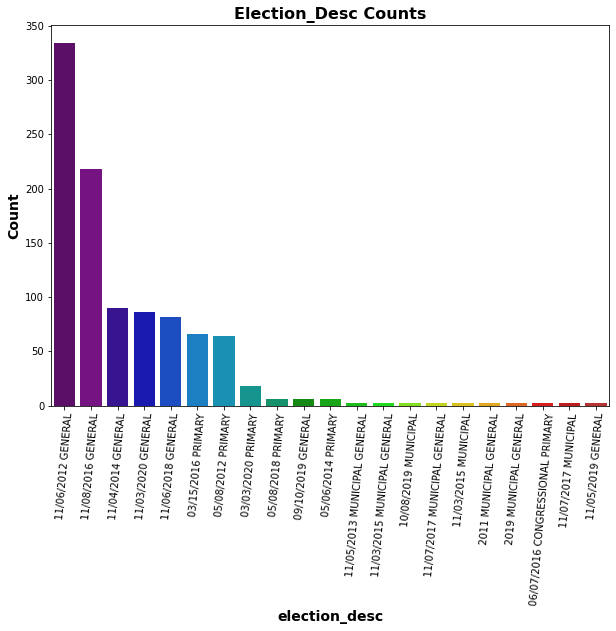

In [21]:
plot_count('election_desc', dup_ncid_elecs, rotation=85);

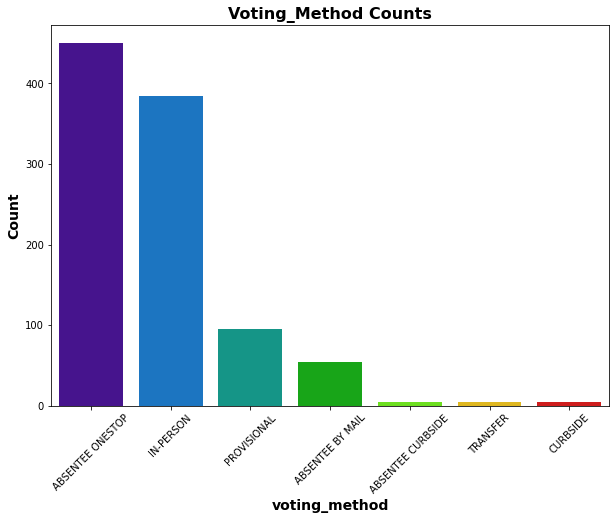

In [22]:
plot_count('voting_method', dup_ncid_elecs, rotation=45);

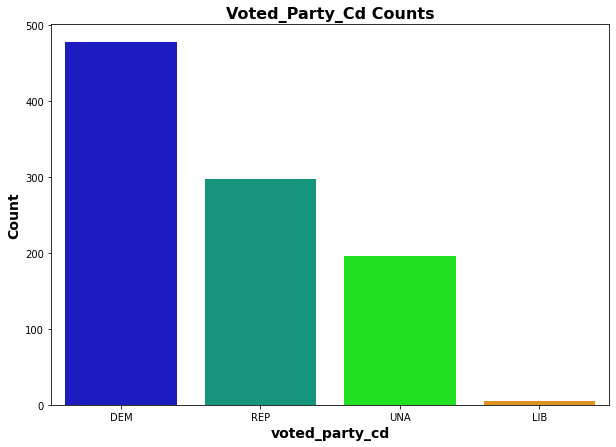

In [23]:
plot_count('voted_party_cd', dup_ncid_elecs);

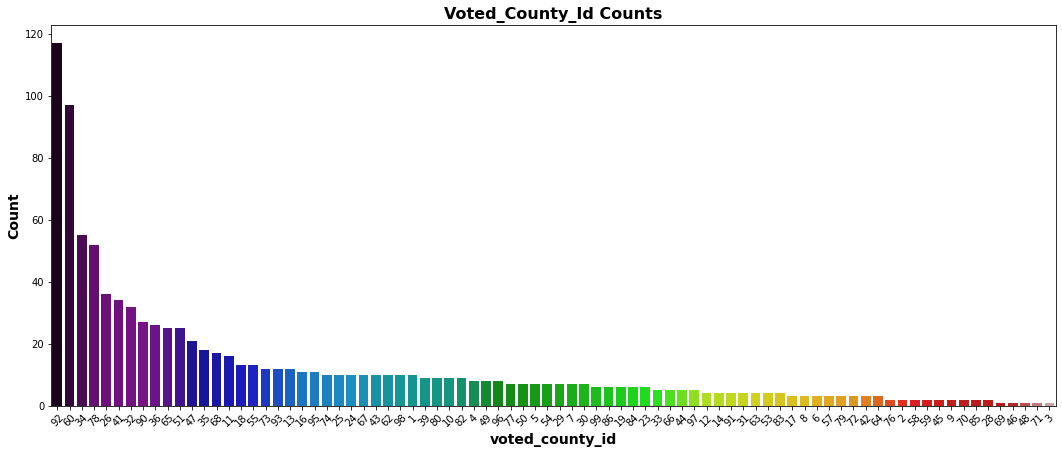

In [24]:
plot_count('voted_county_id', dup_ncid_elecs, figsize=(18,7), rotation=45);

## Explore Voter Registration Records

In [25]:
## Check number of unique individuals represented in voter reg records
nc_vreg['ncid'].nunique()

8311926

In [26]:
## Check voter status information -- Should any categories be removed??
nc_vreg['voter_status_desc'].value_counts()

ACTIVE       6675817
REMOVED       781653
INACTIVE      705643
DENIED        139183
TEMPORARY       9630
Name: voter_status_desc, dtype: int64

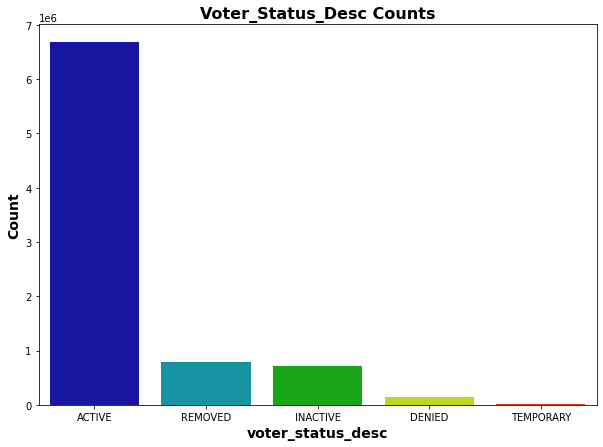

In [27]:
plot_count('voter_status_desc', nc_vreg);

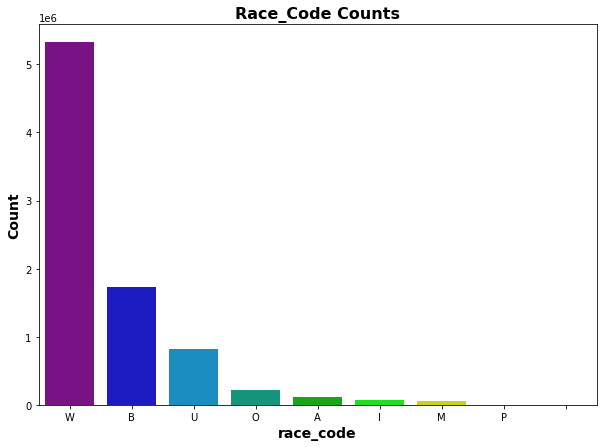

In [28]:
plot_count('race_code', nc_vreg);

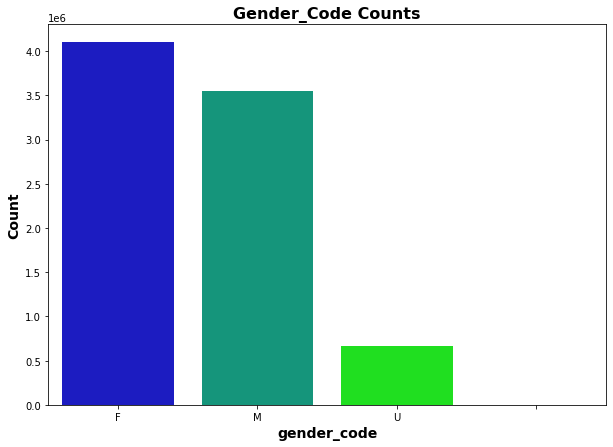

In [29]:
plot_count('gender_code', nc_vreg);

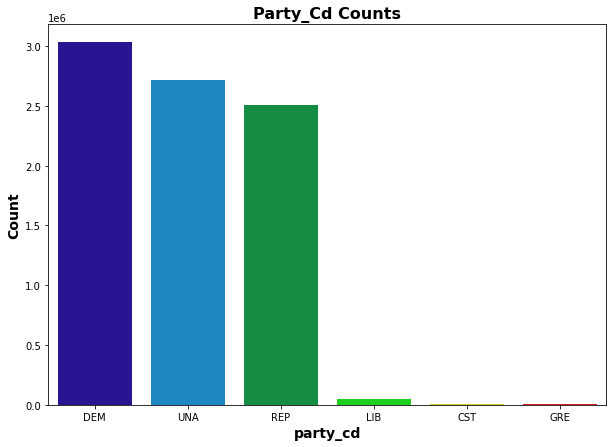

In [30]:
plot_count('party_cd', nc_vreg); # registered party

In [31]:
nc_vreg['birth_year'].min()

1753

In [32]:
nc_vreg['birth_year'].nsmallest(30)

1704356    1753
4247835    1753
6600371    1753
4908905    1765
4898248    1772
1954974    1776
4425490    1779
5684415    1796
5210564    1801
1564520    1853
5560007    1853
6460245    1868
5597346    1870
3130826    1882
2295363    1884
3090492    1884
4440770    1884
6336242    1884
2872127    1885
6473088    1885
3890887    1893
328571     1897
8206367    1897
6327471    1899
6340726    1899
8057680    1899
34137      1900
84736      1900
131100     1900
140922     1900
Name: birth_year, dtype: int64

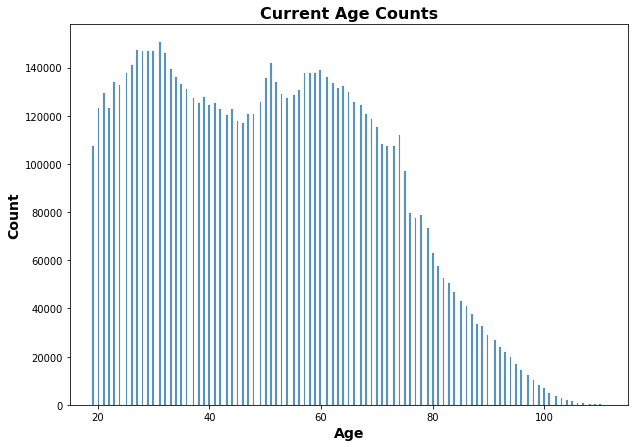

In [33]:
## Plot distribution of current age as of EOY 2020 
plt.figure(figsize=(10,7))
ax = sns.histplot(nc_vreg['birth_age'])
ax.set_title('Current Age Counts', fontsize=16, weight='bold')
ax.set_xlabel('Age', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
# There are voters listed as having been born as early as 1753
  # and that throws off x axis
ax.set_xlim(15,115);

In [1]:
# fig = px.histogram(nc_vreg, x='birth_age', hover_data=nc_vreg.columns)
# fig.show()

In [2]:
# fig = px.histogram(nc_vreg, x='birth_age',
#                    color='voter_status_desc', hover_data=nc_vreg.columns)
# fig.show()

### Active Voters

In [34]:
active_voters = nc_vreg.groupby('voter_status_desc').get_group('ACTIVE')
print(len(active_voters))
active_voters.head()

6675817


,county_id,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,ncid,vtd_abbrv
0,1,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,86,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,AA56273,08N
1,1,ACTIVE,VERIFIED,AARDEN,JONI,AUTUMN,117 W CLAY ST,MEBANE,NC,27302.0,W,UN,UNA,F,43,DC,Y,02/23/2018,10N,13.0,15A,15A,24.0,63.0,NaN,17.0,N,1978,AA201627,10N
2,1,ACTIVE,VERIFIED,AARMSTRONG,TIMOTHY,DUANE,3670 COVINGTON TRL,MEBANE,NC,27302.0,W,UN,REP,M,55,AL,N,10/31/2020,103,13.0,15A,15A,24.0,63.0,NaN,17.0,N,1966,AA216996,103
3,1,ACTIVE,VERIFIED,AARON,CHRISTINA,CASTAGNA,421 WHITT AVE,BURLINGTON,NC,27215.0,W,UN,UNA,F,45,NC,Y,03/26/1996,03S,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1976,AA98377,03S
4,1,ACTIVE,VERIFIED,AARON,CLAUDIA,HAYDEN,1013 EDITH ST,BURLINGTON,NC,27215.0,W,NL,UNA,F,76,VA,Y,08/15/1989,124,13.0,15A,15A,24.0,63.0,NaN,17.0,N,1945,AA69747,124


In [35]:
active_voters['voter_status_reason_desc'].value_counts()

VERIFIED                               6518437
VERIFICATION PENDING                     47469
LEGACY DATA                              44764
UNVERIFIED                               23054
CONFIRMATION PENDING                     21002
UNVERIFIED NEW                           17575
CONFIRMATION NOT RETURNED                 1832
CONFIRMATION RETURNED UNDELIVERABLE       1589
ARMED FORCES                                93
ADMINISTRATIVE                               1
Name: voter_status_reason_desc, dtype: int64

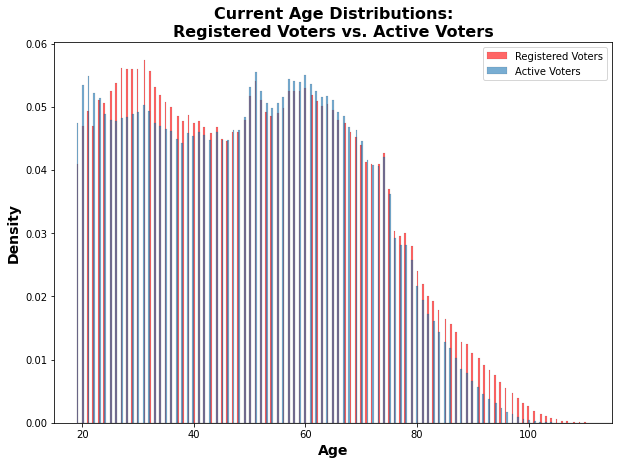

In [36]:
compare_age_distr(nc_vreg, 'Registered Voters', 
                  active_voters, 'Active Voters');

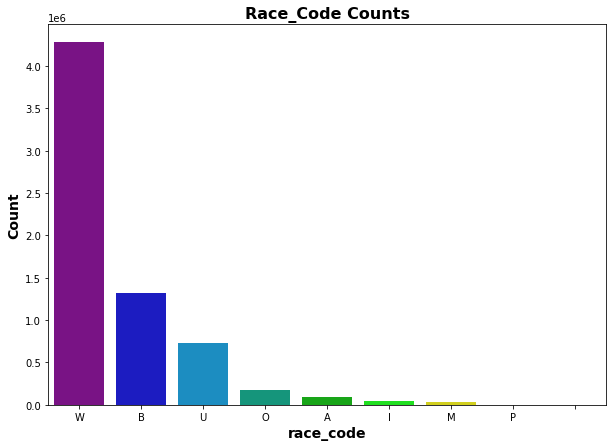

In [37]:
plot_count('race_code', active_voters);

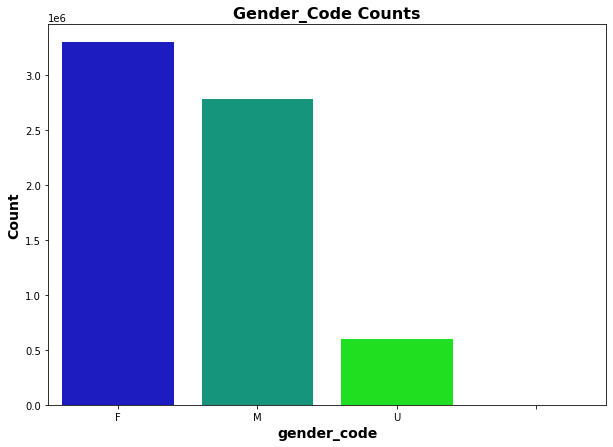

In [38]:
plot_count('gender_code', active_voters);

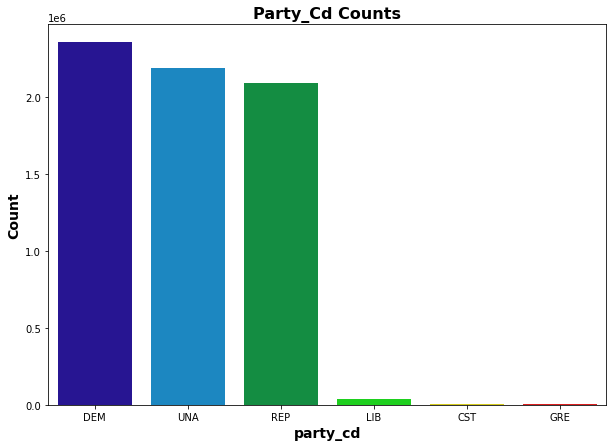

In [39]:
plot_count('party_cd', active_voters);

### Denied Voters

In [40]:
denied_voters = nc_vreg.groupby('voter_status_desc').get_group('DENIED')
print(len(denied_voters))
denied_voters.head()

139183


,county_id,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,ncid,vtd_abbrv
32,1,DENIED,VERIFICATION RETURNED UNDELIVERABLE,ABBOTT,ASHLEY,LAUREN,700 E HAGGARD AVE #J,ELON,NC,27244.0,W,NL,UNA,F,25,NJ,N,09/30/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1996,AA183324,NaN
55,1,DENIED,VERIFICATION RETURNED UNDELIVERABLE,ABBOTT,TERI,LEE,334 ROLLINGWOOD DR,BURLINGTON,NC,27217.0,U,UN,UNA,U,56,NaN,Y,10/08/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1965,AA215561,NaN
192,1,DENIED,VERIFICATION RETURNED UNDELIVERABLE,ACORD,REXANNA,NaN,302 GRAHAM RD,GRAHAM,NC,27253.0,W,NL,REP,F,69,WV,Y,01/18/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1952,AA148645,NaN
358,1,DENIED,UNAVAILABLE ESSENTIAL INFORMATION,ADAMS,PAUL,WENDELL,1426 CLOVERDALE ST,BURLINGTON,NC,27217.0,W,NL,REP,M,63,SC,N,12/13/1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1958,AA105378,NaN
442,1,DENIED,VERIFICATION RETURNED UNDELIVERABLE,ADEYO,ADENIKE,CELINA,1301 E DOGWOOD DR,MEBANE,NC,27302.0,B,NL,DEM,F,40,OC,Y,07/19/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1981,AA196431,NaN


In [41]:
denied_voters['voter_status_reason_desc'].value_counts()

VERIFICATION RETURNED UNDELIVERABLE    133044
UNAVAILABLE ESSENTIAL INFORMATION        6100
MOVED FROM COUNTY                          14
CONFIRMATION NOT RETURNED                  10
FELONY CONVICTION                           8
MOVED FROM STATE                            4
UNVERIFIED                                  1
DUPLICATE                                   1
DECEASED                                    1
Name: voter_status_reason_desc, dtype: int64

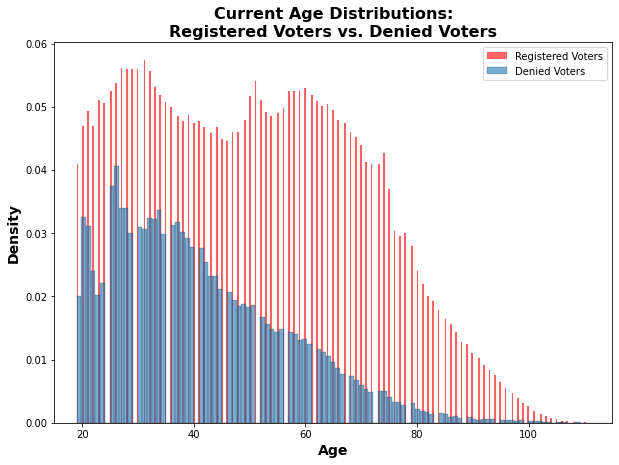

In [42]:
compare_age_distr(nc_vreg, 'Registered Voters', 
                  denied_voters, 'Denied Voters');

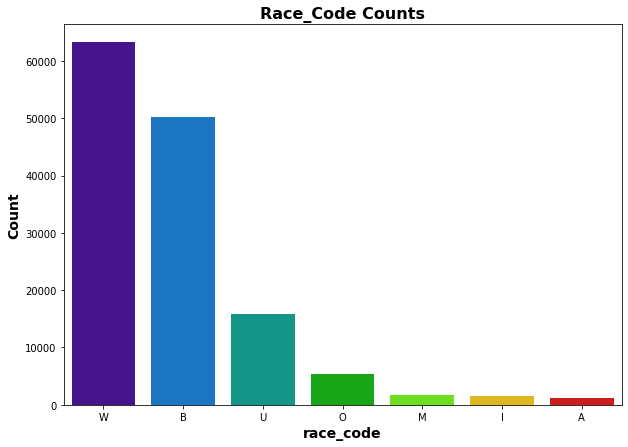

In [43]:
plot_count('race_code', denied_voters);

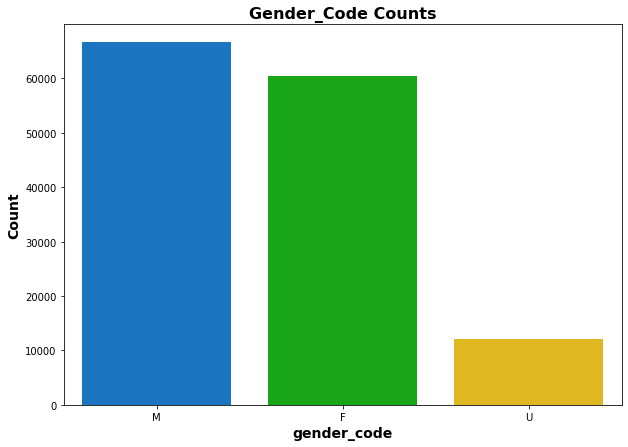

In [44]:
plot_count('gender_code', denied_voters);

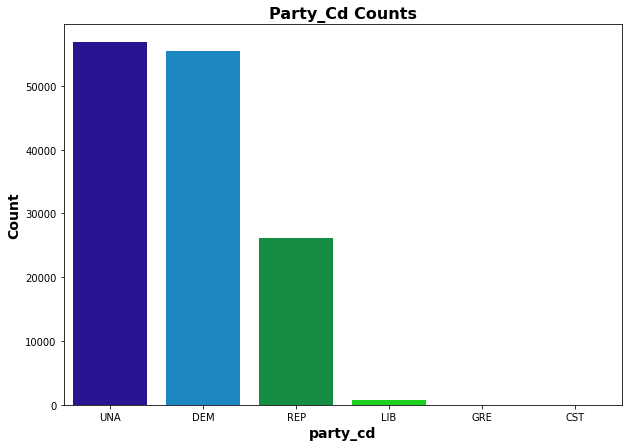

In [45]:
plot_count('party_cd', denied_voters);

### Inactive Voters

In [46]:
inactive_voters = nc_vreg.groupby('voter_status_desc').get_group('INACTIVE')
print(len(inactive_voters))
inactive_voters.head()

705643


,county_id,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,ncid,vtd_abbrv
18,1,INACTIVE,CONFIRMATION NOT RETURNED,ABADILLA,STEVE,ARCEO,105 N SIXTH ST,MEBANE,NC,27302.0,O,NL,UNA,M,32,OC,Y,07/03/2014,10N,13.0,15A,15A,24.0,63.0,NaN,17.0,N,1989,DE236758,10N
47,1,INACTIVE,CONFIRMATION NOT RETURNED,ABBOTT,MARIA,LYNETTE,614 TUCKER ST,BURLINGTON,NC,27215.0,B,NL,DEM,F,36,NC,Y,05/02/2008,128,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1985,BY382231,128
61,1,INACTIVE,CONFIRMATION NOT RETURNED,ABDEL-MAGID,LISA,ANN,1841 DUNBAR PL,BURLINGTON,NC,27215.0,W,NL,UNA,F,61,DC,Y,11/10/2011,03S,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1960,AA169698,03S
79,1,INACTIVE,CONFIRMATION NOT RETURNED,ABELE,KYLIE,JO,336 SLATE DR,GIBSONVILLE,NC,27249.0,W,NL,REP,F,34,WV,N,03/22/2012,03W,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1987,AA171060,03W
101,1,INACTIVE,CONFIRMATION NOT RETURNED,ABERNATHY,JEFFERSON,REID,27 HOLMESWAY,ELON,NC,27244.0,W,UN,REP,M,102,WV,Y,04/06/1969,035,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1919,AA2056,035


In [47]:
inactive_voters['voter_status_reason_desc'].value_counts()

CONFIRMATION NOT RETURNED              411887
CONFIRMATION RETURNED UNDELIVERABLE    293659
ADMINISTRATIVE                             96
UNVERIFIED                                  1
Name: voter_status_reason_desc, dtype: int64

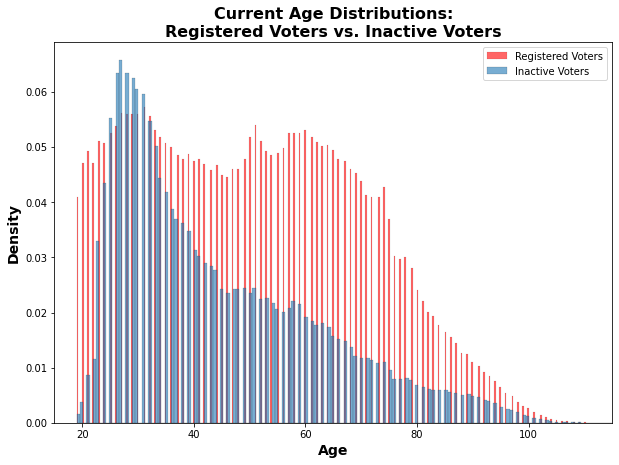

In [48]:
compare_age_distr(nc_vreg, 'Registered Voters', 
                  inactive_voters, 'Inactive Voters');

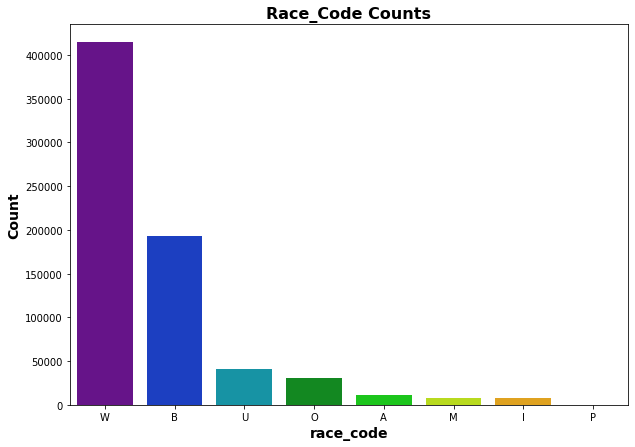

In [49]:
plot_count('race_code', inactive_voters);

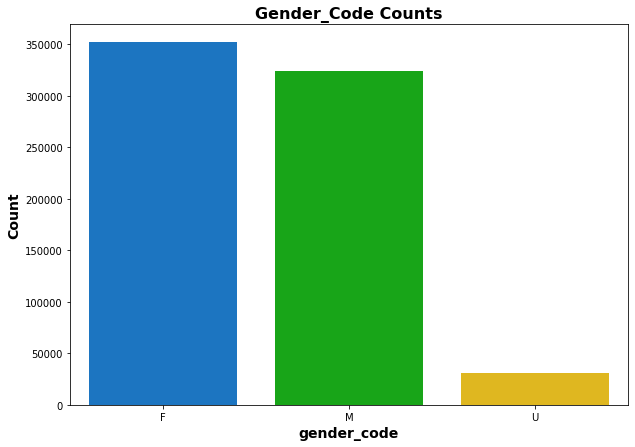

In [50]:
plot_count('gender_code', inactive_voters);

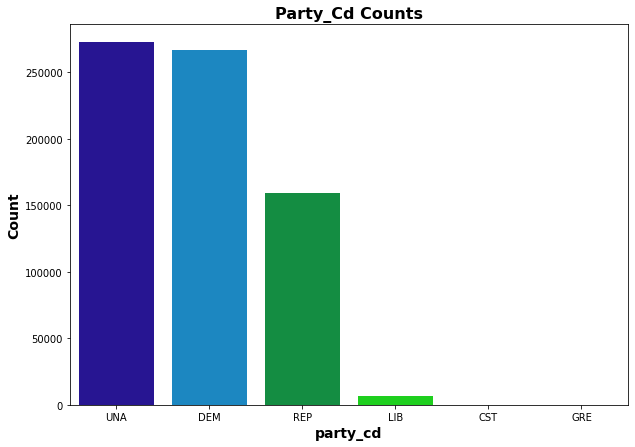

In [51]:
plot_count('party_cd', inactive_voters);

### Removed Voters

In [52]:
removed_voters = nc_vreg.groupby('voter_status_desc').get_group('REMOVED')
print(len(removed_voters))
removed_voters.head()

781653


,county_id,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,ncid,vtd_abbrv
36,1,REMOVED,MOVED FROM COUNTY,ABBOTT,DEREK,ANDREW,REMOVED,NaN,NaN,NaN,W,NL,UNA,M,53,OH,Y,02/20/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1968,BY552572,NaN
40,1,REMOVED,DECEASED,ABBOTT,GLADYS,MARIE MILES,REMOVED,NaN,NaN,NaN,B,NL,DEM,F,69,NC,Y,11/05/2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1952,AA128440,NaN
44,1,REMOVED,MOVED FROM STATE,ABBOTT,JOYCE,HODGES,REMOVED,NaN,NaN,NaN,W,NL,DEM,F,74,VA,Y,09/24/1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1947,AA73791,NaN
78,1,REMOVED,REMOVED AFTER 2 FED GENERAL ELECTIONS IN INACT...,ABELE,KLAY,MATTHEW,REMOVED,NaN,NaN,NaN,W,NL,UNA,M,35,OH,Y,03/26/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1986,AA171094,NaN
89,1,REMOVED,DECEASED,ABERCROMBIE,JACQUELINE,LINVILLE,REMOVED,NaN,NaN,NaN,W,NL,DEM,F,82,NC,Y,05/02/1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1939,AA2049,NaN


In [53]:
removed_voters['voter_status_reason_desc'].value_counts()

DECEASED                                                    393056
MOVED FROM STATE                                            133643
REMOVED AFTER 2 FED GENERAL ELECTIONS IN INACTIVE STATUS    120190
MOVED FROM COUNTY                                            86949
FELONY CONVICTION                                            13621
MOVED WITHIN STATE                                           10646
REQUEST FROM VOTER                                            6931
FELONY SENTENCE COMPLETED                                     5570
TEMPORARY REGISTRANT                                          5256
DUPLICATE                                                     3914
ADMINISTRATIVE                                                1174
REMOVED DUE TO SUSTAINED CHALLENGE                             698
REMOVED UNDER OLD PURGE LAW                                      3
UNVERIFIED                                                       2
Name: voter_status_reason_desc, dtype: int64

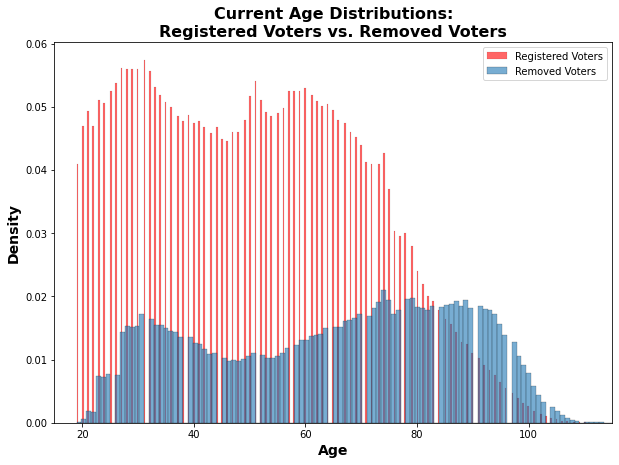

In [54]:
compare_age_distr(nc_vreg, 'Registered Voters', 
                  removed_voters, 'Removed Voters');

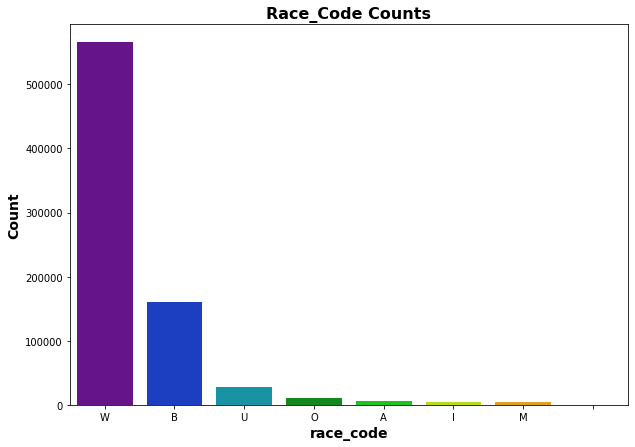

In [55]:
plot_count('race_code', removed_voters);

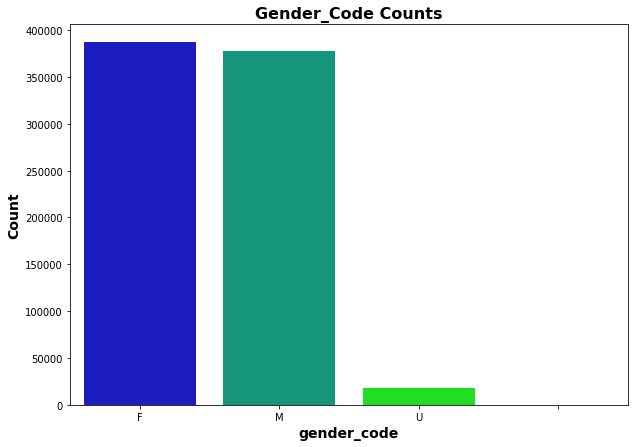

In [56]:
plot_count('gender_code', removed_voters);

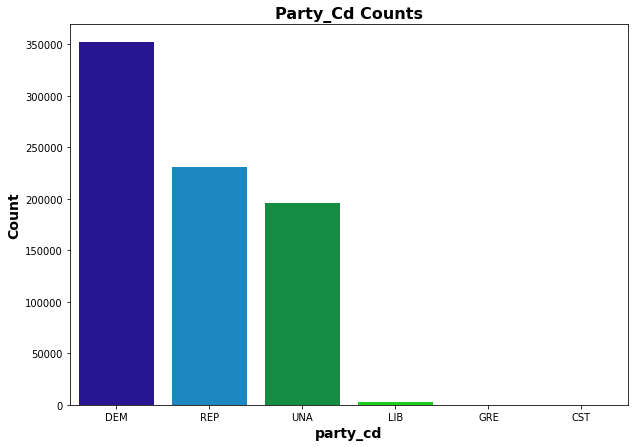

In [57]:
plot_count('party_cd', removed_voters);

## Merge Voter Registration Data with Voter History Data

In [58]:
## Merge voter registration information onto records of voter history based 
  ## on unique ncid
    
## Use right join so we're only including ncid's for which their is
  ## registration and demographic information, including for those 
    ## people who are registered, but have never voted
all_nc_voters = nc_vhis.merge(nc_vreg, how='right', on='ncid')
# inspect new dataframe
display(all_nc_voters.head())
all_nc_voters.tail()

,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label,county_id,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,vtd_abbrv
0,9050398.0,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,07,AA100000,1.0,07,1,ACTIVE,VERIFIED,BOYDSTUN,JAMES,ARCHIE,3318 NESTER'S CT,GRAHAM,NC,27253.0,W,NL,UNA,M,54,OK,N,06/21/1996,07,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1967,07
1,9050398.0,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,07,AA100000,1.0,07,1,ACTIVE,VERIFIED,BOYDSTUN,JAMES,ARCHIE,3318 NESTER'S CT,GRAHAM,NC,27253.0,W,NL,UNA,M,54,OK,N,06/21/1996,07,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1967,07
2,9050398.0,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,07,AA100000,1.0,07,1,ACTIVE,VERIFIED,BOYDSTUN,JAMES,ARCHIE,3318 NESTER'S CT,GRAHAM,NC,27253.0,W,NL,UNA,M,54,OK,N,06/21/1996,07,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1967,07
3,9050405.0,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,09S,AA100006,1.0,09S,1,ACTIVE,VERIFIED,BROOKS,DENISE,WHEELER,3613 DOE LN,HAW RIVER,NC,27258.0,W,NL,REP,F,58,NC,Y,06/14/1996,09S,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1963,09S
4,9050405.0,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,09S,AA100006,1.0,09S,1,ACTIVE,VERIFIED,BROOKS,DENISE,WHEELER,3613 DOE LN,HAW RIVER,NC,27258.0,W,NL,REP,F,58,NC,Y,06/14/1996,09S,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1963,09S


,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label,county_id,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,vtd_abbrv
36033922,NaN,NaN,NaN,NaN,NaN,NaN,ES25219,NaN,NaN,100,ACTIVE,VERIFIED,ZEISS,ANGELA,PAPPAS,270 AYERS MOUNTAIN RD,GREEN MOUNTAIN,NC,28740.0,W,NL,DEM,F,69,FL,Y,11/09/2012,05 GRE,11.0,24,24,47.0,118.0,NaN,35.0,N,1952,05-GRE
36033923,NaN,NaN,NaN,NaN,NaN,NaN,ES24671,NaN,NaN,100,ACTIVE,VERIFIED,ZIDAN,WASEEM,DAMION,328 PENSACOLA RD,BURNSVILLE,NC,28714.0,W,UN,UNA,M,27,NC,Y,11/25/2019,01 BUR,11.0,24,24,47.0,118.0,NaN,35.0,N,1994,01-BUR
36033924,NaN,NaN,NaN,NaN,NaN,NaN,ES27358,NaN,NaN,100,ACTIVE,VERIFIED,ZIRTMAN,BRAD,R,240 WHITE OAK RD,BURNSVILLE,NC,28714.0,U,UN,UNA,U,55,NaN,N,06/20/2017,09 SOU,11.0,24,24,47.0,118.0,NaN,35.0,N,1966,09-SOU
36033925,NaN,NaN,NaN,NaN,NaN,NaN,ES28936,NaN,NaN,100,ACTIVE,VERIFIED,ZURAWSKI,ELAINE,MICHELLE,225 GARLAND LN,GREEN MOUNTAIN,NC,28740.0,U,UN,UNA,U,37,NaN,Y,06/09/2020,05 GRE,11.0,24,24,47.0,118.0,NaN,35.0,N,1984,05-GRE
36033926,NaN,NaN,NaN,NaN,NaN,NaN,ES27200,NaN,NaN,100,INACTIVE,CONFIRMATION NOT RETURNED,ZYNDA,PAULA,MARGARET,115 STONEY FALLS LOOP #D3,BURNSVILLE,NC,28714.0,W,NL,REP,F,57,IN,Y,12/29/2016,11 PRI,11.0,24,24,47.0,118.0,NaN,35.0,N,1964,11-PRI


In [59]:
## Check number of unique individuals represented in all records
print(all_nc_voters['ncid'].nunique())
len(all_nc_voters)

8311926


36033927

## Drop 'Removed' and 'Denied' Voters - Further Exploration

In [60]:
## Drop voters who have been removed or had their registration denied
nc_voters = all_nc_voters.loc[all_nc_voters['voter_status_desc'] != 'REMOVED']
nc_voters = nc_voters.loc[nc_voters['voter_status_desc'] != 'DENIED']
nc_voters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33638687 entries, 0 to 36033926
Data columns (total 38 columns):
voter_reg_num               float64
election_lbl                object
election_desc               object
voting_method               object
voted_party_cd              object
pct_label                   object
ncid                        object
voted_county_id             float64
vtd_label                   object
county_id                   int64
voter_status_desc           object
voter_status_reason_desc    object
last_name                   object
first_name                  object
middle_name                 object
res_street_address          object
res_city_desc               object
state_cd                    object
zip_code                    float64
race_code                   object
ethnic_code                 object
party_cd                    object
gender_code                 object
birth_age                   int64
birth_state                 object
drivers_l

In [61]:
## Check remaining number of unique individuals represented in the data
nc_voters['ncid'].nunique()

7391090

In [62]:
## Check the number of records corresponding to the top 15 elections
elec_counts_df = nc_voters['election_desc'].value_counts().to_frame()
elec_counts_df.iloc[:15]

,election_desc
11/03/2020 GENERAL,5540516
11/08/2016 GENERAL,4478296
11/06/2012 GENERAL,3906821
11/06/2018 GENERAL,3653096
11/04/2014 GENERAL,2662967
03/15/2016 PRIMARY,2175269
03/03/2020 PRIMARY,2149190
05/08/2012 PRIMARY,1870946
05/08/2018 PRIMARY,927626
05/06/2014 PRIMARY,918175


In [63]:
# nc_voters.to_csv('Data/NC_voters.gz', compression='gzip', index=False)

## Engineer Features for Grouping/ Database Manipulation

In [4]:
# nc_voters = pd.read_csv('Data/NC_voters.gz',
#                         dtype={'precinct_abbrv': str, 
#                               'super_court_abbrv': str, 
#                               'judic_dist_abbrv': str,
#                               'school_dist_abbrv': str,
#                               'vtd_abbrv': str
#                              })

In [64]:
nc_voters.head()

,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label,county_id,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,vtd_abbrv
0,9050398.0,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,07,AA100000,1.0,07,1,ACTIVE,VERIFIED,BOYDSTUN,JAMES,ARCHIE,3318 NESTER'S CT,GRAHAM,NC,27253.0,W,NL,UNA,M,54,OK,N,06/21/1996,07,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1967,07
1,9050398.0,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,07,AA100000,1.0,07,1,ACTIVE,VERIFIED,BOYDSTUN,JAMES,ARCHIE,3318 NESTER'S CT,GRAHAM,NC,27253.0,W,NL,UNA,M,54,OK,N,06/21/1996,07,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1967,07
2,9050398.0,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,07,AA100000,1.0,07,1,ACTIVE,VERIFIED,BOYDSTUN,JAMES,ARCHIE,3318 NESTER'S CT,GRAHAM,NC,27253.0,W,NL,UNA,M,54,OK,N,06/21/1996,07,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1967,07
3,9050405.0,11/04/2014,11/04/2014 GENERAL,IN-PERSON,REP,09S,AA100006,1.0,09S,1,ACTIVE,VERIFIED,BROOKS,DENISE,WHEELER,3613 DOE LN,HAW RIVER,NC,27258.0,W,NL,REP,F,58,NC,Y,06/14/1996,09S,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1963,09S
4,9050405.0,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,09S,AA100006,1.0,09S,1,ACTIVE,VERIFIED,BROOKS,DENISE,WHEELER,3613 DOE LN,HAW RIVER,NC,27258.0,W,NL,REP,F,58,NC,Y,06/14/1996,09S,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1963,09S


In [65]:
## Create a new column specifying the election category based on the
  ## election description col
nc_voters.insert(loc=3, column='election_cat', 
                 value=nc_voters['election_desc'].str.split(n=1,
                                                            expand=True)[1])
# If the category was general or primary, leave as is, otherwise 'other'
nc_voters['election_cat'] = np.where(nc_voters['election_cat'].isin(
                                                    ['GENERAL', 'PRIMARY']),
                                     nc_voters['election_cat'], 'other')

In [66]:
## Recast election_lbl as datetime and create a new col for just the year
nc_voters['election_lbl'] = pd.to_datetime(nc_voters['election_lbl'])
nc_voters.insert(loc=3, column='election_yr',
                 value=nc_voters['election_lbl'].dt.year)

In [67]:
## Create a new binary variable indicating if it was a major election
nc_voters.insert(loc=5, column='major_elec',
                 value=np.where(((nc_voters['election_yr']%2 == 0) & 
                                 (nc_voters['election_cat'].isin(
                                     ['GENERAL', 'PRIMARY']))),
                                1,0))

# Exclude 2020 primary runoff from major elections
nc_voters.loc[nc_voters['election_desc']=='06/23/2020 PRIMARY',
              ['major_elec']]=0

In [68]:
## Group original vote methods into more general categories in a new variable
# Map the original categoriess to new ones
vote_method_map = {'ABSENTEE ONESTOP': 'Early',
                   'IN-PERSON': 'Election Day',
                   'ABSENTEE BY MAIL': 'Early',
                   'ABSENTEE CURBSIDE': 'Early',
                   'TRANSFER': 'Other',
                   'PROVISIONAL': 'Other',
                   'CURBSIDE': 'Election Day'}

# Apply the map to create new vote_method_cat column
nc_voters.insert(loc=7, column='vote_method_cat',
                 value=nc_voters['voting_method'].map(vote_method_map))

In [69]:
## Null values in the election_desc col indicate individuals that are 
  ## registered to vote, but have not voted in a recent major election.
    ## Thus, election_cat, major_elec, and presid_elec 
    ## are irrelevant for these records
# Fill irrelevant fields with null values
nc_voters.loc[nc_voters['election_desc'].isna(),
              ['election_cat', 'major_elec']] = np.nan

# Fill with NaN with 'None' in election_desc col to preserve info for
  # registered voters without a voting history when merging df's based on 
    # ncid and election_desc below
nc_voters['election_desc'].fillna('None', inplace=True)

# Inspect updated dataframe
nc_voters.head()

,voter_reg_num,election_lbl,election_desc,election_yr,election_cat,major_elec,voting_method,vote_method_cat,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label,county_id,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,vtd_abbrv
0,9050398.0,2020-11-03,11/03/2020 GENERAL,2020.0,GENERAL,1.0,ABSENTEE ONESTOP,Early,UNA,07,AA100000,1.0,07,1,ACTIVE,VERIFIED,BOYDSTUN,JAMES,ARCHIE,3318 NESTER'S CT,GRAHAM,NC,27253.0,W,NL,UNA,M,54,OK,N,06/21/1996,07,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1967,07
1,9050398.0,2016-11-08,11/08/2016 GENERAL,2016.0,GENERAL,1.0,ABSENTEE ONESTOP,Early,UNA,07,AA100000,1.0,07,1,ACTIVE,VERIFIED,BOYDSTUN,JAMES,ARCHIE,3318 NESTER'S CT,GRAHAM,NC,27253.0,W,NL,UNA,M,54,OK,N,06/21/1996,07,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1967,07
2,9050398.0,2020-03-03,03/03/2020 PRIMARY,2020.0,PRIMARY,1.0,IN-PERSON,Election Day,REP,07,AA100000,1.0,07,1,ACTIVE,VERIFIED,BOYDSTUN,JAMES,ARCHIE,3318 NESTER'S CT,GRAHAM,NC,27253.0,W,NL,UNA,M,54,OK,N,06/21/1996,07,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1967,07
3,9050405.0,2014-11-04,11/04/2014 GENERAL,2014.0,GENERAL,1.0,IN-PERSON,Election Day,REP,09S,AA100006,1.0,09S,1,ACTIVE,VERIFIED,BROOKS,DENISE,WHEELER,3613 DOE LN,HAW RIVER,NC,27258.0,W,NL,REP,F,58,NC,Y,06/14/1996,09S,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1963,09S
4,9050405.0,2016-11-08,11/08/2016 GENERAL,2016.0,GENERAL,1.0,ABSENTEE ONESTOP,Early,REP,09S,AA100006,1.0,09S,1,ACTIVE,VERIFIED,BROOKS,DENISE,WHEELER,3613 DOE LN,HAW RIVER,NC,27258.0,W,NL,REP,F,58,NC,Y,06/14/1996,09S,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1963,09S


In [71]:
# nc_voters.to_csv('Data/NC_voters.gz', compression='gzip', index=False)

In [72]:
## Check number of unique individuals represented by the data
nc_voters['ncid'].nunique()

7391090

In [73]:
## Store index of non-major and non-null election types
other_elec_idx = nc_voters.loc[nc_voters['election_cat']=='other'].index

## Create a df containing only major and null elections
major_elec_df = nc_voters.drop(index=other_elec_idx)

# Check number of unique individuals that voted in a recent major election, 
  # plus those with no voting history
print(major_elec_df['ncid'].nunique())

# 7082 registered voters voted in a non-major election,
  # but no major elections
nc_voters['ncid'].nunique() - major_elec_df['ncid'].nunique()

7384008


7082

## Merge DataFrames - Focus on Recent Major Elections

In [9]:
# nc_voters = pd.read_csv('Data/NC_voters.gz',
#                         dtype={'precinct_abbrv': str, 
#                               'super_court_abbrv': str, 
#                               'judic_dist_abbrv': str,
#                               'school_dist_abbrv': str,
#                               'vtd_abbrv': str
#                              })

In [74]:
## Get list of unique ncids
nc_ncid_list = list(nc_voters['ncid'].unique())

## Add 'None' to the list to capture individuals that have not voted in any 
  ## recent major election when merging dataframes on ncid and election_desc
elec_desc_list = ['11/03/2020 GENERAL',
                  '11/06/2018 GENERAL',
                  '11/08/2016 GENERAL',
                  '11/04/2014 GENERAL',
                  '11/06/2012 GENERAL',
                  'None']

In [75]:
## Create multiindex that lists every election for every registered voter
mltidx = pd.MultiIndex.from_tuples(
    [(ncid, elec) for ncid in nc_ncid_list for elec in elec_desc_list],
    names=['ncid', 'election_desc'])

## Use multiindex to create new dataframe
elecs_by_voter = pd.DataFrame(index=mltidx)

In [76]:
## Check length and inspect structure of new dataframe
print(len(elecs_by_voter))
elecs_by_voter.head(15)

44346540


Empty DataFrame
Columns: []
Index: [(AA100000, 11/03/2020 GENERAL), (AA100000, 11/06/2018 GENERAL), (AA100000, 11/08/2016 GENERAL), (AA100000, 11/04/2014 GENERAL), (AA100000, 11/06/2012 GENERAL), (AA100000, None), (AA100006, 11/03/2020 GENERAL), (AA100006, 11/06/2018 GENERAL), (AA100006, 11/08/2016 GENERAL), (AA100006, 11/04/2014 GENERAL), (AA100006, 11/06/2012 GENERAL), (AA100006, None), (AA100007, 11/03/2020 GENERAL), (AA100007, 11/06/2018 GENERAL), (AA100007, 11/08/2016 GENERAL)]

In [78]:
elecs_by_voter.reset_index(inplace=True)
elecs_by_voter.head()

,ncid,election_desc
0,AA100000,11/03/2020 GENERAL
1,AA100000,11/06/2018 GENERAL
2,AA100000,11/08/2016 GENERAL
3,AA100000,11/04/2014 GENERAL
4,AA100000,11/06/2012 GENERAL


In [79]:
## Merge voter histories using the created multiindex as the keys to join
  ## each ncid onto every election and 'None'
voter_elecs = elecs_by_voter.merge(nc_vhis, how='left',
                                   on=['ncid', 'election_desc'])
# Inspect new df
print(len(voter_elecs))
display(voter_elecs.head())
voter_elecs.tail()

44346931


,ncid,election_desc,voter_reg_num,election_lbl,voting_method,voted_party_cd,pct_label,voted_county_id,vtd_label
0,AA100000,11/03/2020 GENERAL,9050398.0,11/03/2020,ABSENTEE ONESTOP,UNA,07,1.0,07
1,AA100000,11/06/2018 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AA100000,11/08/2016 GENERAL,9050398.0,11/08/2016,ABSENTEE ONESTOP,UNA,07,1.0,07
3,AA100000,11/04/2014 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AA100000,11/06/2012 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ncid,election_desc,voter_reg_num,election_lbl,voting_method,voted_party_cd,pct_label,voted_county_id,vtd_label
44346926,ES27200,11/06/2018 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44346927,ES27200,11/08/2016 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44346928,ES27200,11/04/2014 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44346929,ES27200,11/06/2012 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44346930,ES27200,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
## Check for duplicate rows
# voter_elecs.duplicated().sum()

0

In [80]:
# voter_elecs.to_csv('Data/NC_full_voter_elecs.gz', compression='gzip', index=False)

In [81]:
nc_vreg.head()

,county_id,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,ncid,vtd_abbrv
0,1,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,86,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,AA56273,08N
1,1,ACTIVE,VERIFIED,AARDEN,JONI,AUTUMN,117 W CLAY ST,MEBANE,NC,27302.0,W,UN,UNA,F,43,DC,Y,02/23/2018,10N,13.0,15A,15A,24.0,63.0,NaN,17.0,N,1978,AA201627,10N
2,1,ACTIVE,VERIFIED,AARMSTRONG,TIMOTHY,DUANE,3670 COVINGTON TRL,MEBANE,NC,27302.0,W,UN,REP,M,55,AL,N,10/31/2020,103,13.0,15A,15A,24.0,63.0,NaN,17.0,N,1966,AA216996,103
3,1,ACTIVE,VERIFIED,AARON,CHRISTINA,CASTAGNA,421 WHITT AVE,BURLINGTON,NC,27215.0,W,UN,UNA,F,45,NC,Y,03/26/1996,03S,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1976,AA98377,03S
4,1,ACTIVE,VERIFIED,AARON,CLAUDIA,HAYDEN,1013 EDITH ST,BURLINGTON,NC,27215.0,W,NL,UNA,F,76,VA,Y,08/15/1989,124,13.0,15A,15A,24.0,63.0,NaN,17.0,N,1945,AA69747,124


In [82]:
nc_vreg.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8311926 entries, 0 to 8311925
Data columns (total 30 columns):
county_id                   8311926 non-null int64
voter_status_desc           8311926 non-null object
voter_status_reason_desc    8311925 non-null object
last_name                   8311737 non-null object
first_name                  8311773 non-null object
middle_name                 7715323 non-null object
res_street_address          8311926 non-null object
res_city_desc               7529758 non-null object
state_cd                    7529998 non-null object
zip_code                    7529657 non-null float64
race_code                   8311926 non-null object
ethnic_code                 8311926 non-null object
party_cd                    8311926 non-null object
gender_code                 8311926 non-null object
birth_age                   8311926 non-null int64
birth_state                 6687860 non-null object
drivers_lic                 8311926 non-null object
regi

In [83]:
voter_elecs = pd.read_csv('Data/NC_full_voter_elecs.gz')
voter_elecs.head()

/Users/maxsteele/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.



,ncid,election_desc,voter_reg_num,election_lbl,voting_method,voted_party_cd,pct_label,voted_county_id,vtd_label
0,AA100000,11/03/2020 GENERAL,9050398.0,11/03/2020,ABSENTEE ONESTOP,UNA,07,1.0,07
1,AA100000,11/06/2018 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AA100000,11/08/2016 GENERAL,9050398.0,11/08/2016,ABSENTEE ONESTOP,UNA,07,1.0,07
3,AA100000,11/04/2014 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AA100000,11/06/2012 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
## Merge voter registration information onto the new df based on ncid
voter_elecs = voter_elecs.merge(nc_vreg, how='left', on='ncid')
# Inspect resulting df
voter_elecs.head()

,ncid,election_desc,voter_reg_num,election_lbl,voting_method,voted_party_cd,pct_label,voted_county_id,vtd_label,county_id,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,vtd_abbrv
0,AA100000,11/03/2020 GENERAL,9050398.0,11/03/2020,ABSENTEE ONESTOP,UNA,07,1.0,07,1,ACTIVE,VERIFIED,BOYDSTUN,JAMES,ARCHIE,3318 NESTER'S CT,GRAHAM,NC,27253.0,W,NL,UNA,M,54,OK,N,06/21/1996,07,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1967,07
1,AA100000,11/06/2018 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,ACTIVE,VERIFIED,BOYDSTUN,JAMES,ARCHIE,3318 NESTER'S CT,GRAHAM,NC,27253.0,W,NL,UNA,M,54,OK,N,06/21/1996,07,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1967,07
2,AA100000,11/08/2016 GENERAL,9050398.0,11/08/2016,ABSENTEE ONESTOP,UNA,07,1.0,07,1,ACTIVE,VERIFIED,BOYDSTUN,JAMES,ARCHIE,3318 NESTER'S CT,GRAHAM,NC,27253.0,W,NL,UNA,M,54,OK,N,06/21/1996,07,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1967,07
3,AA100000,11/04/2014 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,ACTIVE,VERIFIED,BOYDSTUN,JAMES,ARCHIE,3318 NESTER'S CT,GRAHAM,NC,27253.0,W,NL,UNA,M,54,OK,N,06/21/1996,07,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1967,07
4,AA100000,11/06/2012 GENERAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,ACTIVE,VERIFIED,BOYDSTUN,JAMES,ARCHIE,3318 NESTER'S CT,GRAHAM,NC,27253.0,W,NL,UNA,M,54,OK,N,06/21/1996,07,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1967,07


In [85]:
voter_elecs.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44346931 entries, 0 to 44346930
Data columns (total 38 columns):
ncid                        44346931 non-null object
election_desc               44346931 non-null object
voter_reg_num               20241696 non-null float64
election_lbl                20241696 non-null object
voting_method               20241696 non-null object
voted_party_cd              20233459 non-null object
pct_label                   20241696 non-null object
voted_county_id             20241696 non-null float64
vtd_label                   19731247 non-null object
county_id                   44346931 non-null int64
voter_status_desc           44346931 non-null object
voter_status_reason_desc    44346925 non-null object
last_name                   44345911 non-null object
first_name                  44346241 non-null object
middle_name                 41226390 non-null object
res_street_address          44346931 non-null object
res_city_desc               44345359

In [86]:
# voter_elecs.to_csv('Data/NC_full_voter_elecs.gz', compression='gzip', index=False)